# PART 2: DATASET EXPLORATORY DATA ANALYSIS

In [2]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statistics import mean, median, quantiles, variance
import datetime
from sklearn.model_selection import train_test_split
from kneed import KneeLocator
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

import pickle
import unicodedata
import shap

C:\Users\mirei\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

## BLOCK 1: TEMPERATURE, COMERCIAL, DOMESTIC AND INDUSTRIAL DATASETS

In [40]:
# OPEN DATA
temperature_barcelona = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/temperature_barcelona.csv", sep=",")
data_barcelona = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block1/data_water_global.csv", sep=",")
data_industrial_barcelona = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block1/data_industrial_water.csv", sep=",")
data_comercial_barcelona = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block1/data_commercial_water.csv", sep=",")
data_domestic_barcelona = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block1/data_domestic_water.csv", sep=",")

In [157]:
# remove outliers
data_barcelona = remove_outlier(data_barcelona, 'CONSUMO')
data_industrial_barcelona = remove_outlier(data_industrial_barcelona, 'CONSUMO')
data_comercial_barcelona = remove_outlier(data_comercial_barcelona, 'CONSUMO')
data_domestic_barcelona = remove_outlier(data_domestic_barcelona, 'CONSUMO')

### WATER CONSUMPTION OF DOMESTIC, INDUSTRIAL AND COMERCIAL SECTORS IN BARCELONA

In [7]:
# mean consumption
print('Mean consumption in Barcelona: ', mean(data_barcelona['CONSUMO']))
print('Mean domestic consumption in Barcelona: ', mean(data_domestic_barcelona['CONSUMO']))
print('Mean industrial consumption in Barcelona: ', mean(data_industrial_barcelona['CONSUMO']))
print('Mean comercial consumption in Barcelona: ', mean(data_comercial_barcelona['CONSUMO']))

Mean consumption in Barcelona:  257.885332573381
Mean domestic consumption in Barcelona:  227.4063909658667
Mean industrial consumption in Barcelona:  3313.8730251926754
Mean comercial consumption in Barcelona:  152.8036160419361


So, the mean of the water consumption in the industrial sector is higher than the mean of the water consumption in the other sectors.

In [8]:
# variance consumption
print('Variance consumption in Barcelona: ', variance(data_barcelona['CONSUMO']))
print('Variance domestic consumption in Barcelona: ', variance(data_domestic_barcelona['CONSUMO']))
print('Variance industrial consumption in Barcelona: ', variance(data_industrial_barcelona['CONSUMO']))
print('Variance comercial consumption in Barcelona: ', variance(data_comercial_barcelona['CONSUMO']))

Variance consumption in Barcelona:  79281.59943474602
Variance domestic consumption in Barcelona:  24856.464486518005
Variance industrial consumption in Barcelona:  29119107.41396904
Variance comercial consumption in Barcelona:  27218.8760385396


The variance of the industrial data is much higher than the other sectors, it means that the data is very spread out from the mean.

In [9]:
# median consumption
print('Median consumption in Barcelona: ', median(data_barcelona['CONSUMO']))
print('Median domestic consumption in Barcelona: ', median(data_domestic_barcelona['CONSUMO']))
print('Median industrial consumption in Barcelona: ', median(data_industrial_barcelona['CONSUMO']))
print('Median comercial consumption in Barcelona: ', median(data_comercial_barcelona['CONSUMO']))

Median consumption in Barcelona:  168
Median domestic consumption in Barcelona:  201
Median industrial consumption in Barcelona:  658
Median comercial consumption in Barcelona:  90.0


In this case, the median of industrial sector is higher than the others, so the distribution may be skewed to the left.

In [10]:
# compute quantiles
print('Quantiles consumption in Barcelona: ', quantiles(data_barcelona['CONSUMO']))
print('Quantiles domestic consumption in Barcelona: ', quantiles(data_domestic_barcelona['CONSUMO']))
print('Quantiles industrial consumption in Barcelona: ', quantiles(data_industrial_barcelona['CONSUMO']))
print('Quantiles comercial consumption in Barcelona: ', quantiles(data_comercial_barcelona['CONSUMO']))

Quantiles consumption in Barcelona:  [60.0, 168.0, 347.0]
Quantiles domestic consumption in Barcelona:  [104.0, 201.0, 326.0]
Quantiles industrial consumption in Barcelona:  [136.0, 658.0, 3750.0]
Quantiles comercial consumption in Barcelona:  [31.0, 90.0, 218.0]


The quartiles show the first quartil (25th percentile meaning that 25% of the data falls below the first quartile), the median and the third quartile (75th percentile).

In [11]:
# compute correlation
print('Correlation between domestic and industrial consumption in Barcelona ', data_domestic_barcelona['CONSUMO'].corr(data_industrial_barcelona['CONSUMO']))
print('Correlation between domestic and comercial consumption in Barcelona ', data_domestic_barcelona['CONSUMO'].corr(data_comercial_barcelona['CONSUMO']))
print('Correlation between comercial and industrial consumption in Barcelona ', data_comercial_barcelona['CONSUMO'].corr(data_industrial_barcelona['CONSUMO']))

Correlation between domestic and industrial consumption in Barcelona  -2.4703962218073168e-05
Correlation between domestic and comercial consumption in Barcelona  -0.002155909749713899
Correlation between comercial and industrial consumption in Barcelona  0.0005694533391541445


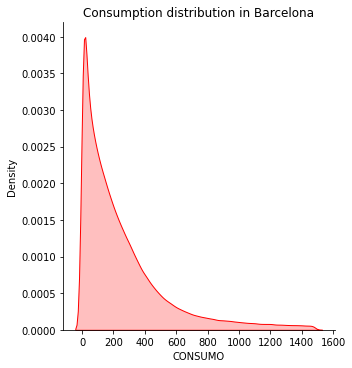

In [12]:
#Plot consumption distribution of the total data
sns.displot(data_barcelona['CONSUMO'], kind="kde", fill=True, color = 'red').set(title='Consumption distribution in Barcelona')

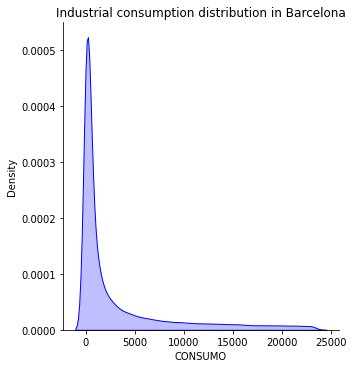

In [13]:
# Plot industrial consumption distribution
sns.displot(data_industrial_barcelona['CONSUMO'],kind="kde", fill=True, color= 'blue').set(title='Industrial consumption distribution in Barcelona')

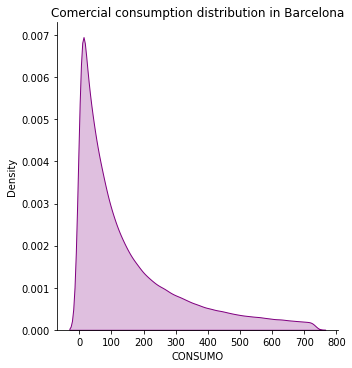

In [14]:
# Plot comercial consumption distribution
sns.displot(data_comercial_barcelona['CONSUMO'],kind="kde", fill=True, color= 'purple').set(title='Comercial consumption distribution in Barcelona')

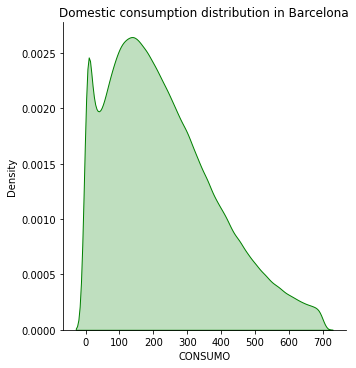

In [15]:
# Plot domestic consumption distribution
sns.displot(data_domestic_barcelona['CONSUMO'],kind="kde", fill=True, color= 'green').set(title='Domestic consumption distribution in Barcelona')

The distribution that follows the industrial and comercial sectors seems to be a normal distribution skewed to the left.

<AxesSubplot: title={'center': 'Consumption distribution plot'}, xlabel='CONSUMO', ylabel='Density'>

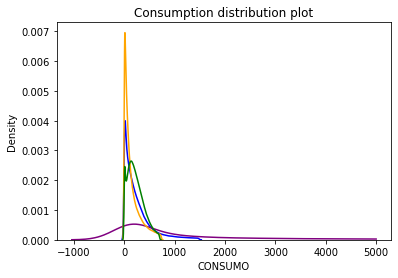

In [17]:
sns.kdeplot(data_barcelona['CONSUMO'], fill = False, color = 'blue', clip=(-5000, 5000)).set(title = 'Consumption distribution plot')
sns.kdeplot(data_industrial_barcelona['CONSUMO'], fill = False, color = 'purple', clip=(-5000, 5000))
sns.kdeplot(data_comercial_barcelona['CONSUMO'], fill = False, color = 'orange', clip=(-5000, 5000))
sns.kdeplot(data_domestic_barcelona['CONSUMO'], fill = False, color = 'green', clip=(-5000, 5000))

[Text(0.5, 1.0, 'Domestic boxplot')]

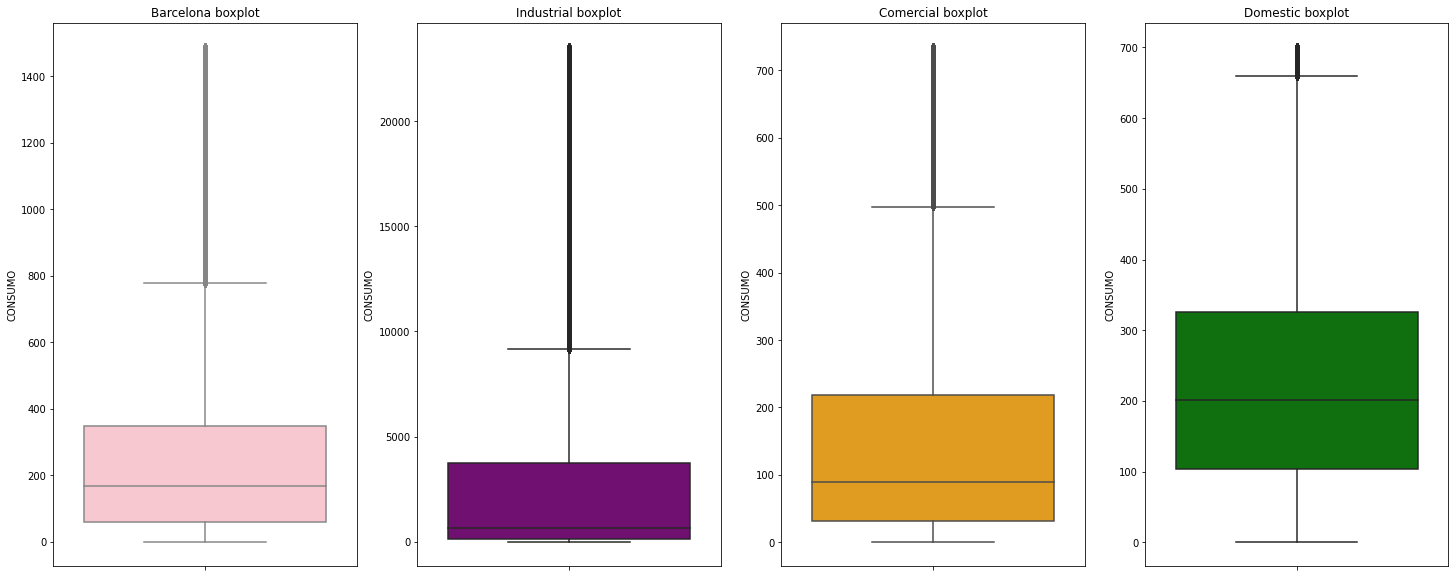

In [18]:
# Box plot after removing outliers
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(25,10))
sns.boxplot(y=data_barcelona['CONSUMO'], ax=axes[0], color = 'pink').set(title="Barcelona boxplot")
sns.boxplot(y=data_industrial_barcelona['CONSUMO'], ax=axes[1], color = 'purple').set(title="Industrial boxplot")
sns.boxplot(y=data_comercial_barcelona['CONSUMO'], ax=axes[2], color = 'orange').set(title="Comercial boxplot")
sns.boxplot(y=data_domestic_barcelona['CONSUMO'], ax=axes[3], color = 'green').set(title="Domestic boxplot")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

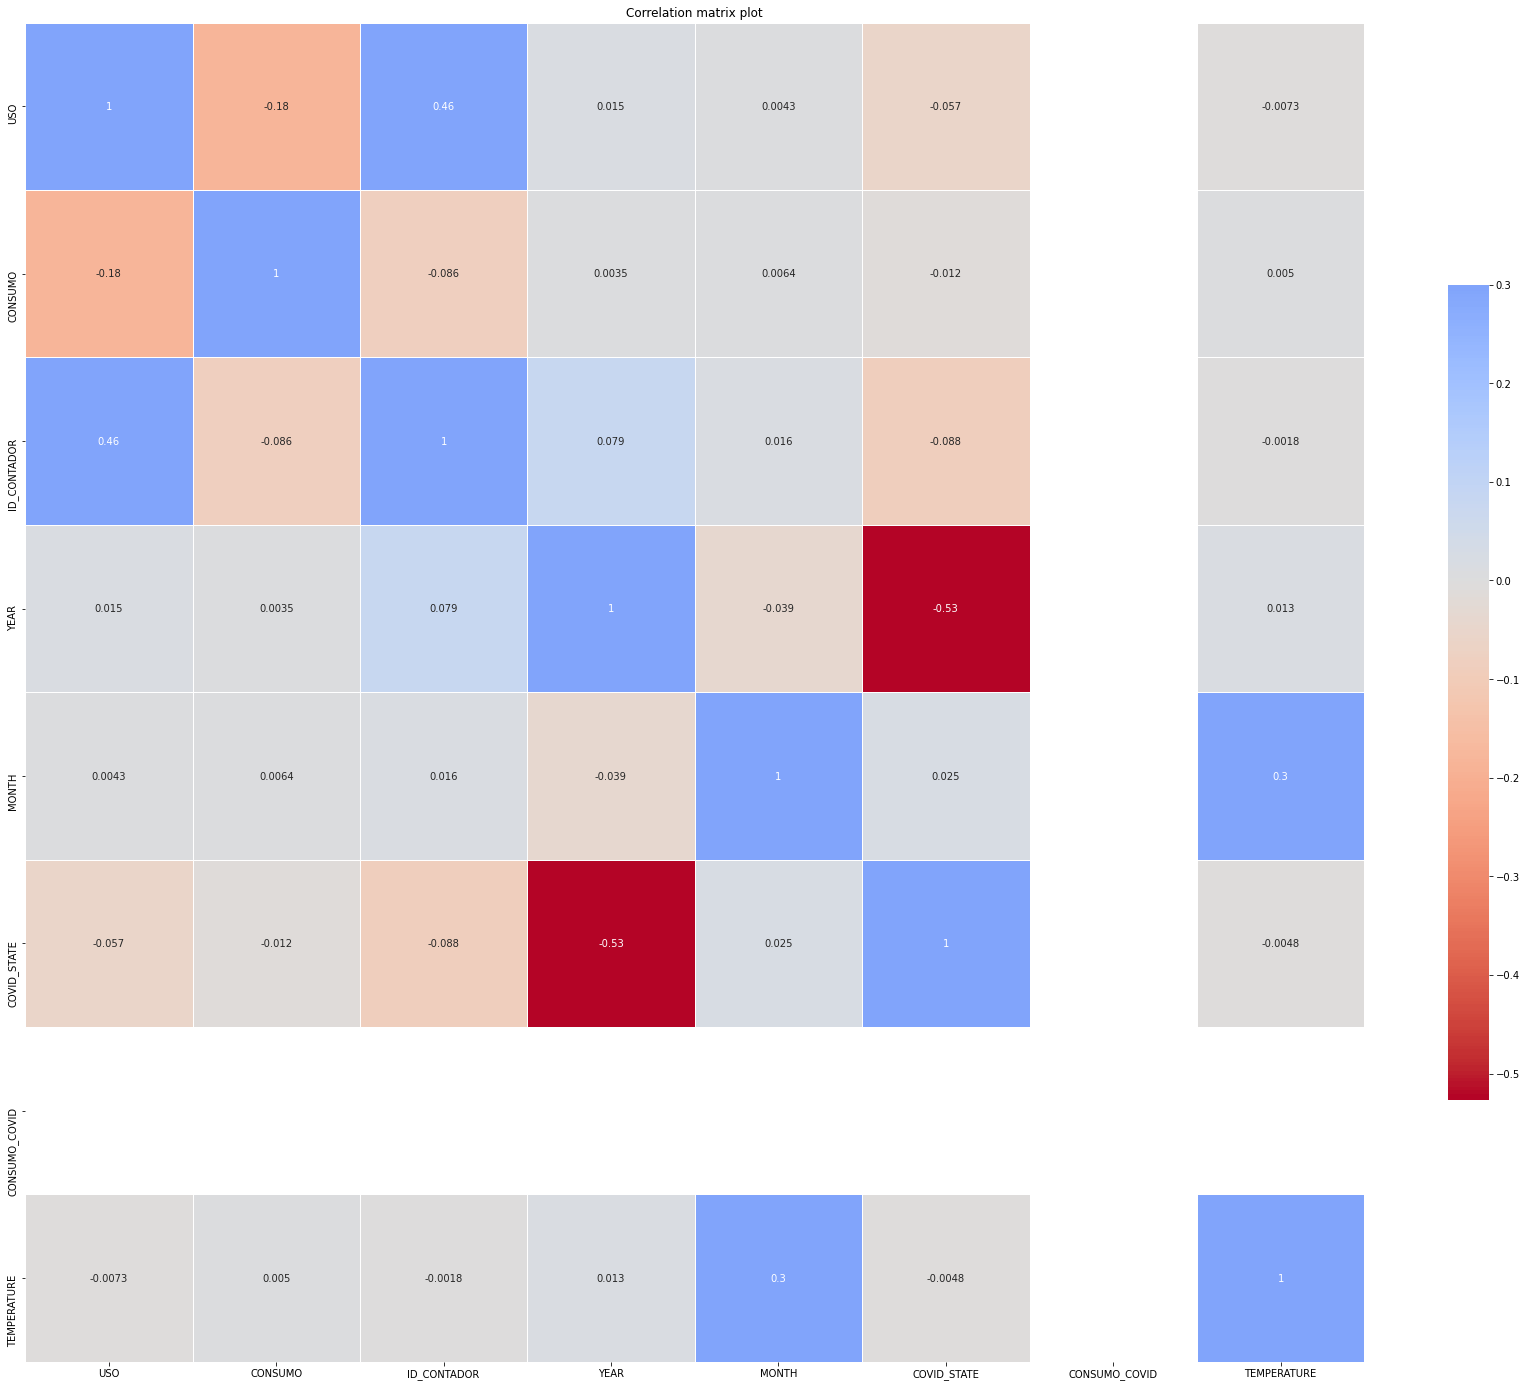

In [19]:
#Compute the correlation matrix
corr = data_barcelona.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

### HOW COVID HAVE AFECTED TO THE WATER CONSUMPTION

In [173]:
consumption_covid = data_barcelona[data_barcelona['YEAR'] == 2020]
consumption_before = data_barcelona[data_barcelona['YEAR'] == 2019]
consumption_after = data_barcelona[data_barcelona['YEAR'] == 2021]

In [177]:
# during covid
print('During covid: ')
print('Number of data entries: ', len(consumption_covid))
print('The mean consumption was: ', round(mean(consumption_covid['CONSUMO']),2))
print('The median consumption was: ', median(consumption_covid['CONSUMO']))

During covid: 
Number of data entries:  865460
The mean consumption was:  253.2
The median consumption was:  163.0


In [178]:
# before covid
print('Before covid: ')
print('Number of data entries: ', len(consumption_before))
print('The mean consumption was: ', round(mean(consumption_before['CONSUMO']),2))
print('The median consumption was: ', median(consumption_before['CONSUMO']))

Before covid: 
Number of data entries:  803687
The mean consumption was:  259.1
The median consumption was:  158


In [179]:
# after covid
print('After covid: ')
print('Number of data entries: ', len(consumption_after))
print('The mean consumption was: ', round(mean(consumption_after['CONSUMO']),2))
print('The median consumption was: ', median(consumption_after['CONSUMO']))

After covid: 
Number of data entries:  931016
The mean consumption was:  261.19
The median consumption was:  179.0


In [171]:
# how affect covid depending on the sector (domestic, industrial or comercial)

# domestic sector
before_domestic = data_domestic_barcelona[data_domestic_barcelona['YEAR'] ==2019]
after_domestic = data_domestic_barcelona[data_domestic_barcelona['YEAR'] ==2021]
during_domestic = data_domestic_barcelona[data_domestic_barcelona['YEAR'] ==2020]

In [186]:
print('Before covid DOMESTIC: ')
print('Number of data entries: ', len(before_domestic))
print('The mean consumption was: ', round(mean(before_domestic['CONSUMO'])))
print('The median consumption was: ', median(before_domestic['CONSUMO']))

print('During covid DOMESTIC: ')
print('Number of data entries: ', len(during_domestic))
print('The mean consumption was: ', round(mean(during_domestic['CONSUMO'])))
print('The median consumption was: ', median(during_domestic['CONSUMO']))

print('After covid DOMESTIC: ')
print('Number of data entries: ', len(after_comercial))
print('The mean consumption was: ', round(mean(after_domestic['CONSUMO'])))
print('The median consumption was: ', median(after_domestic['CONSUMO']))

Before covid DOMESTIC: 
Number of data entries:  247918
The mean consumption was:  216
The median consumption was:  188.0
During covid DOMESTIC: 
Number of data entries:  336635
The mean consumption was:  227
The median consumption was:  202
After covid DOMESTIC: 
Number of data entries:  322176
The mean consumption was:  234
The median consumption was:  209.0


In [181]:
# industrial sector
before_industrial = data_industrial_barcelona[data_industrial_barcelona['YEAR'] ==2019]
after_industrial = data_industrial_barcelona[data_industrial_barcelona['YEAR'] ==2021]
during_industrial = data_industrial_barcelona[data_industrial_barcelona['YEAR'] ==2020]

In [187]:
print('Before covid INDUSTRIAL: ')
print('Number of data entries: ', len(before_industrial))
print('The mean consumption was: ', round(mean(before_industrial['CONSUMO'])))
print('The median consumption was: ', median(before_industrial['CONSUMO']))

print('During covid INDUSTRIAL: ')
print('Number of data entries: ', len(during_industrial))
print('The mean consumption was: ', round(mean(during_industrial['CONSUMO'])))
print('The median consumption was: ', median(during_industrial['CONSUMO']))

print('After covid INDUSTRIAL: ')
print('Number of data entries: ', len(after_industrial))
print('The mean consumption was: ', round(mean(after_industrial['CONSUMO'])))
print('The median consumption was: ', median(after_industrial['CONSUMO']))

Before covid INDUSTRIAL: 
Number of data entries:  332639
The mean consumption was:  3759
The median consumption was:  724
During covid INDUSTRIAL: 
Number of data entries:  320166
The mean consumption was:  2762
The median consumption was:  509.0
After covid INDUSTRIAL: 
Number of data entries:  249878
The mean consumption was:  3428
The median consumption was:  819.0


In [183]:
# commercial sector
before_comercial = data_comercial_barcelona[data_comercial_barcelona['YEAR'] ==2019]
after_comercial = data_comercial_barcelona[data_comercial_barcelona['YEAR'] ==2021]
during_comercial = data_comercial_barcelona[data_comercial_barcelona['YEAR'] ==2020]

In [188]:
print('Before covid COMMERCIAL: ')
print('Number of data entries: ', len(before_comercial))
print('The mean consumption was: ', round(mean(before_comercial['CONSUMO'])))
print('The median consumption was: ', median(before_comercial['CONSUMO']))

print('During covid COMMERCIAL: ')
print('Number of data entries: ', len(during_comercial))
print('The mean consumption was: ', round(mean(during_comercial['CONSUMO'])))
print('The median consumption was: ', median(during_comercial['CONSUMO']))

print('After covid COMMERCIAL: ')
print('Number of data entries: ', len(after_comercial))
print('The mean consumption was: ', round(mean(after_comercial['CONSUMO'])))
print('The median consumption was: ', median(after_comercial['CONSUMO']))

Before covid COMMERCIAL: 
Number of data entries:  321350
The mean consumption was:  158
The median consumption was:  92.0
During covid COMMERCIAL: 
Number of data entries:  285888
The mean consumption was:  146
The median consumption was:  84.0
After covid COMMERCIAL: 
Number of data entries:  322176
The mean consumption was:  153
The median consumption was:  94.0


Text(0.5, 1.0, 'Domestic water consumption before, after and during covid')

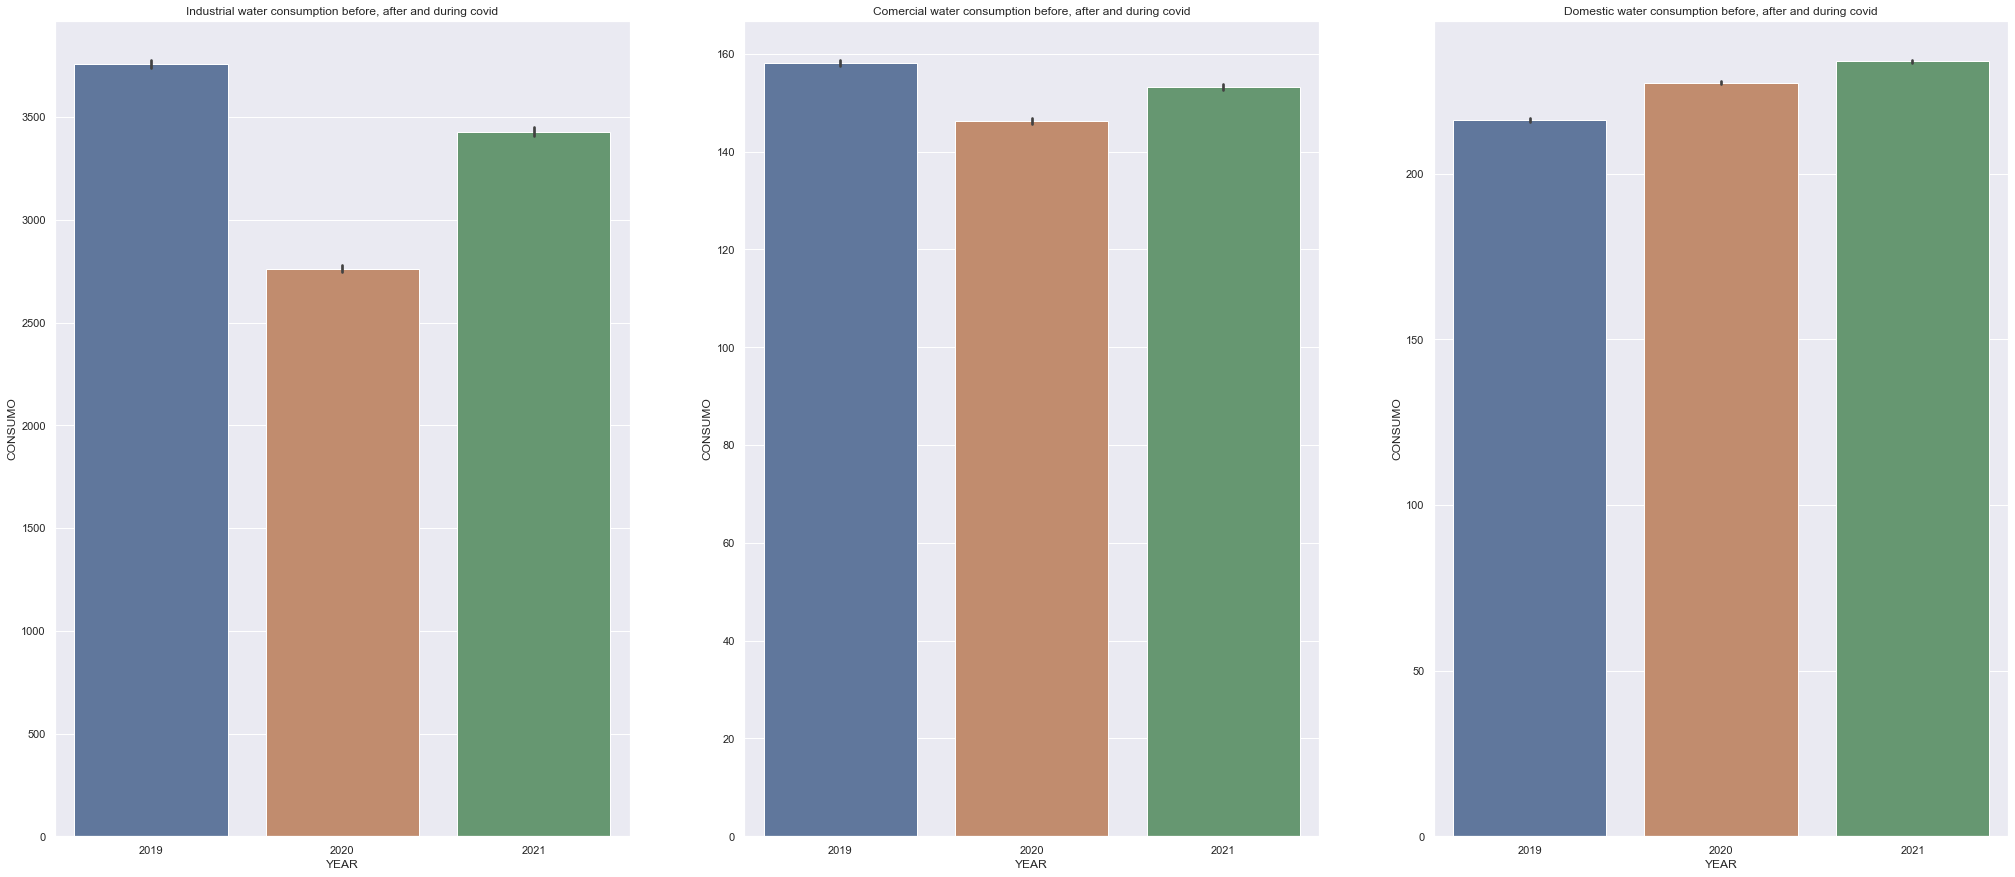

In [162]:
# Evolution water consumption by sectors
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(35,15))
sns.barplot(data= data_industrial_barcelona, x= "YEAR", y= "CONSUMO", ax=axes[0], saturation=0.6).set_title('Industrial water consumption before, after and during covid')
sns.barplot(data= data_comercial_barcelona, x= "YEAR", y= "CONSUMO", ax=axes[1], saturation=0.6).set_title('Comercial water consumption before, after and during covid')
sns.barplot(data= data_domestic_barcelona, x= "YEAR", y= "CONSUMO", ax=axes[2], saturation=0.6).set_title('Domestic water consumption before, after and during covid')

Here we can see that the water consumption in the industrial sector descreases a lot during the covid. In the comercial sector, we can see that the consumption decreases during the covid but not so much as the industrial sector. Finally, the domestic sector has been increasing duing the covid and after.

Text(0.5, 1.0, 'Water consumption by month')

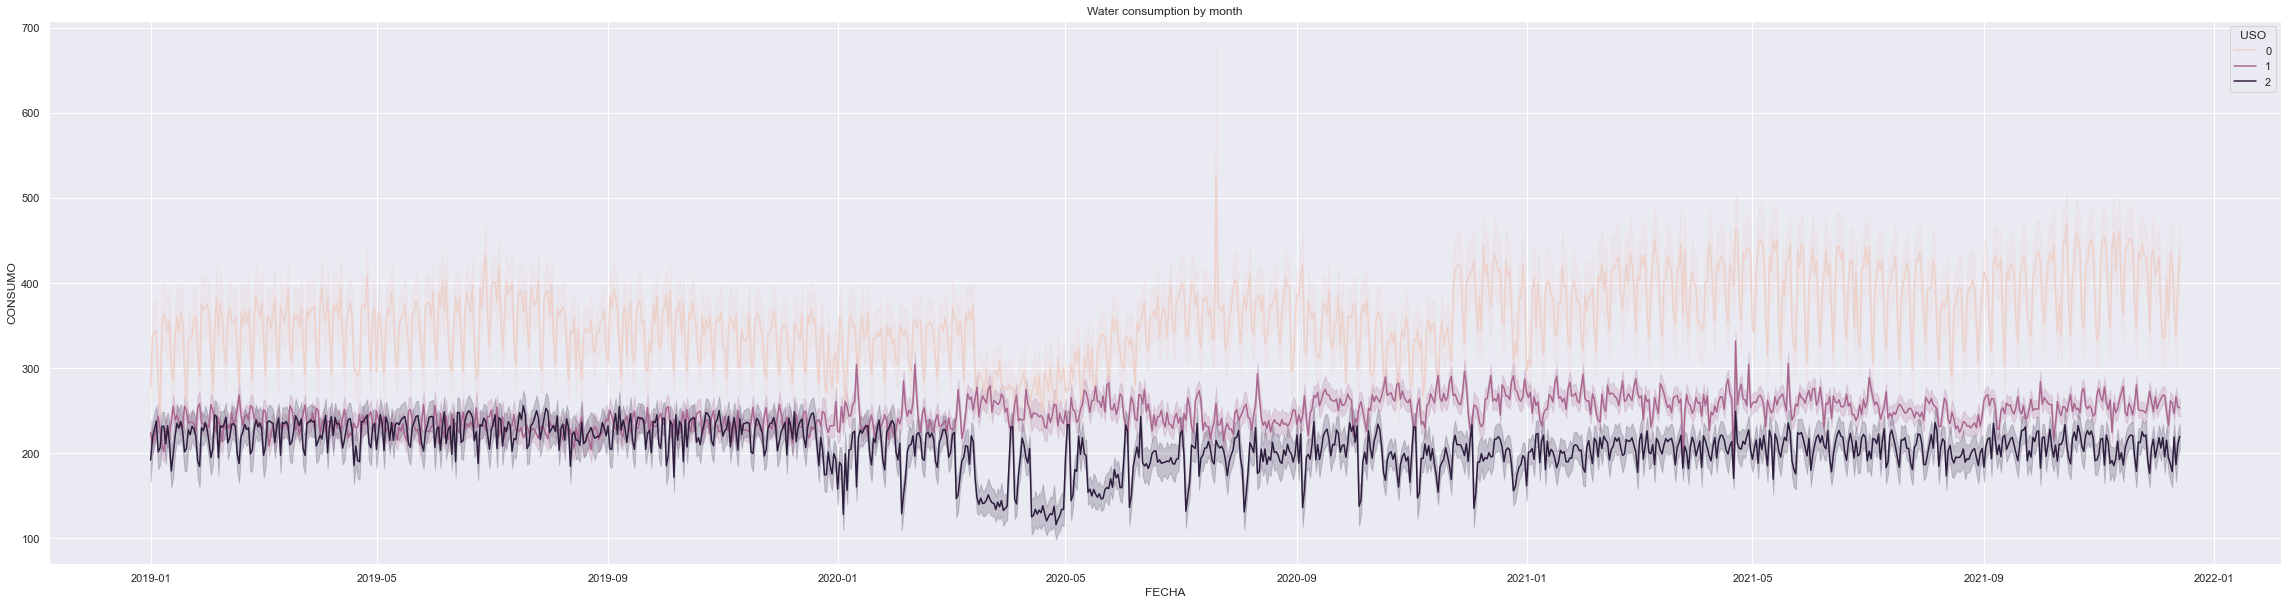

In [189]:
sns.set(rc = {'figure.figsize':(40,10)})
sns.lineplot(data= data_barcelona, x= "FECHA", y= "CONSUMO", hue= 'USO').set_title('Water consumption by month')

### HOW TEMPERATURE AFFECT ON THE CONSUMPTION BY SECTORS

Text(0.5, 1.0, 'Water consumption by temperature')

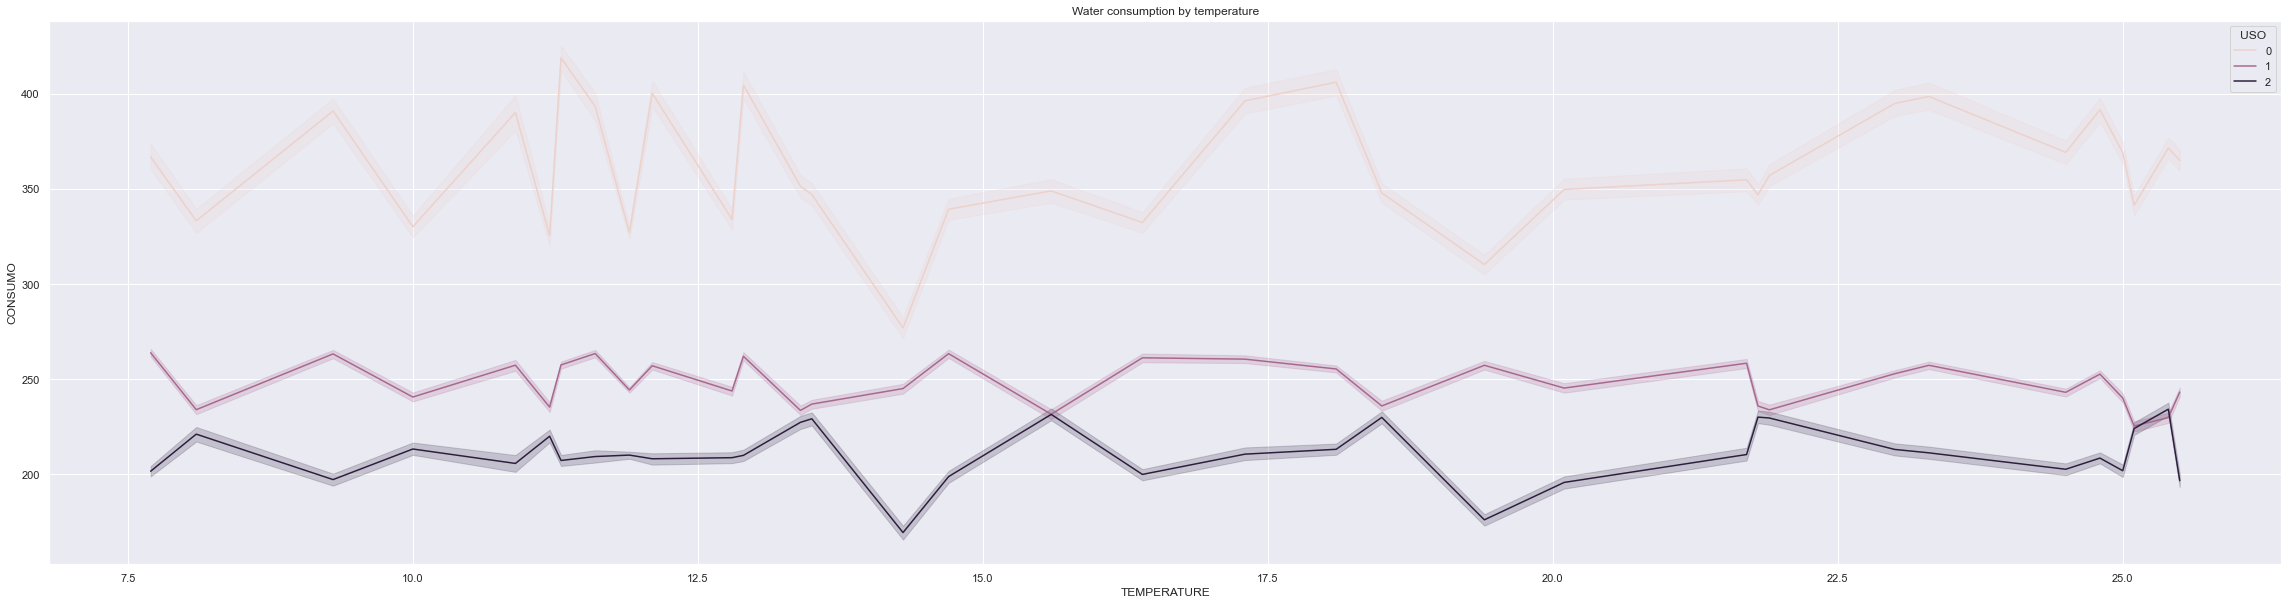

In [190]:
# temperature
sns.lineplot(data= data_barcelona, x= "TEMPERATURE", y= "CONSUMO", hue= 'USO').set_title('Water consumption by temperature')

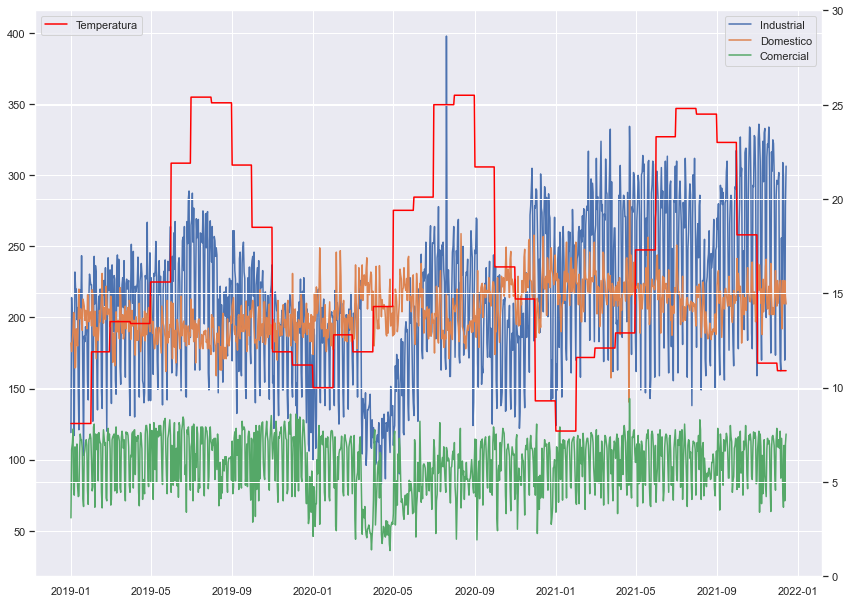

In [158]:
#convertimos la fecha en formato datetime
data_barcelona['FECHA'] = pd.to_datetime(data_barcelona['FECHA'].str.strip(), format='%Y/%m/%d')

#agregamos por fecha y uso
df_xdate = data_barcelona[['FECHA','USO','CONSUMO', 'TEMPERATURE', 'COVID_STATE', 'CONSUMO_COVID']]
df_xdate = df_xdate.groupby(['FECHA', 'USO'], as_index=False).agg(TEMPERATURE=('TEMPERATURE','mean'), 
                                            COVID_STATE= ('CONSUMO_COVID','mean'),
                                            CONSUMO_COVID=('CONSUMO_COVID','mean'),
                                            CONSUMO=('CONSUMO','sum'), CONSUMO_MEDIA=('CONSUMO','median'))

df_uso0 = df_xdate.loc[df_xdate['USO'] == 0]
df_uso1 = df_xdate.loc[df_xdate['USO'] == 1]
df_uso2 = df_xdate.loc[df_xdate['USO'] == 2]
#ploteamos solo por un tipo de USO
fig, ax = plt.subplots(layout='constrained')
ax2 = ax.twinx() 
ax.plot(df_uso0['FECHA'], df_uso0['CONSUMO_MEDIA'], label='Industrial')
ax.plot(df_uso1['FECHA'], df_uso1['CONSUMO_MEDIA'], label='Domestico')
ax.plot(df_uso2['FECHA'], df_uso2['CONSUMO_MEDIA'], label='Comercial')
ax.legend()
ax2.plot(df_uso2['FECHA'], df_uso2['TEMPERATURE'], label='Temperatura', color='red')  
#ax2 = df_uso2[['TEMPERATURE','FECHA']].plot(secondary_y=True, label='Temperatura')
ax2.set_ylim(0, 30)
ax2.legend(loc=2)
plt.show()

## BLOCK 2: CONSUMPTION BY ACTIVITY DATASET

In [38]:
# OPEN DATA
data_actividad_barcelona = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block2/data_activity_water.csv", sep=",")

In [39]:
# remove outliers
data_actividad_barcelona = remove_outlier(data_actividad_barcelona, 'CONSUMO')

### CONSUMPTION ACTIVITIES IN BARCELONA

In [41]:
data_actividad_barcelona

FECHA  CONSUMO EPIGRAF  \
0        2019-01-01       45   I6442   
1        2019-01-02      244   I6442   
2        2019-01-03      261   I6442   
3        2019-01-04      273   I6442   
4        2019-01-05      212   I6442   
...             ...      ...     ...   
1868867  2021-12-12       24   I8612   
1868868  2021-12-13      135   I8332   
1868869  2021-12-13      135   I8612   
1868870  2021-12-14       43   I8332   
1868871  2021-12-14       43   I8612   

                                       DESCP EPIGRAF  ID_CLIENTE   LOCATION  \
0        * Venda de pa, pans especials y pastisseria          29  BARCELONA   
1        * Venda de pa, pans especials y pastisseria          29  BARCELONA   
2        * Venda de pa, pans especials y pastisseria          29  BARCELONA   
3        * Venda de pa, pans especials y pastisseria          29  BARCELONA   
4        * Venda de pa, pans especials y pastisseria          29  BARCELONA   
...                                              ...         ...        ...   
1868867    * de locals industrials i altres lloguers         132  BARCELONA   
1868868                             * d'edificacions         132  BARCELONA   
1868869    * de locals industrials i altres lloguers         132  BARCELONA   
1868870                             * d'edificacions         132  BARCELONA   
1868871    * de locals industrials i altres lloguers         132  BARCELONA   

         YEAR  MONTH MONTH_LONG  TEMPERATURE  
0        2019      1      Gener          8.1  
1        2019      1      Gener          8.1  
2        2019      1      Gener          8.1  
3        2019      1      Gener          8.1  
4        2019      1      Gener          8.1  
...       ...    ...        ...          ...  
1868867  2021     12   Desembre         10.9  
1868868  2021     12   Desembre         10.9  
1868869  2021     12   Desembre         10.9  
1868870  2021     12   Desembre         10.9  
1868871  2021     12   Desembre         10.9  

[1583553 rows x 10 columns]

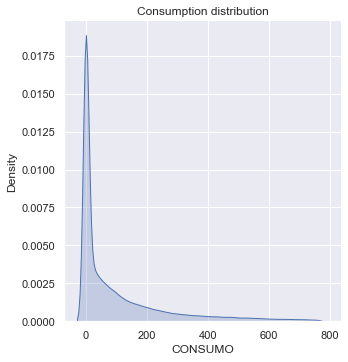

In [42]:
# Plot consumption distribution
sns.displot(data_actividad_barcelona['CONSUMO'],kind="kde", fill=True).set(title='Consumption distribution')

[Text(0.5, 1.0, 'Consumption boxplot')]

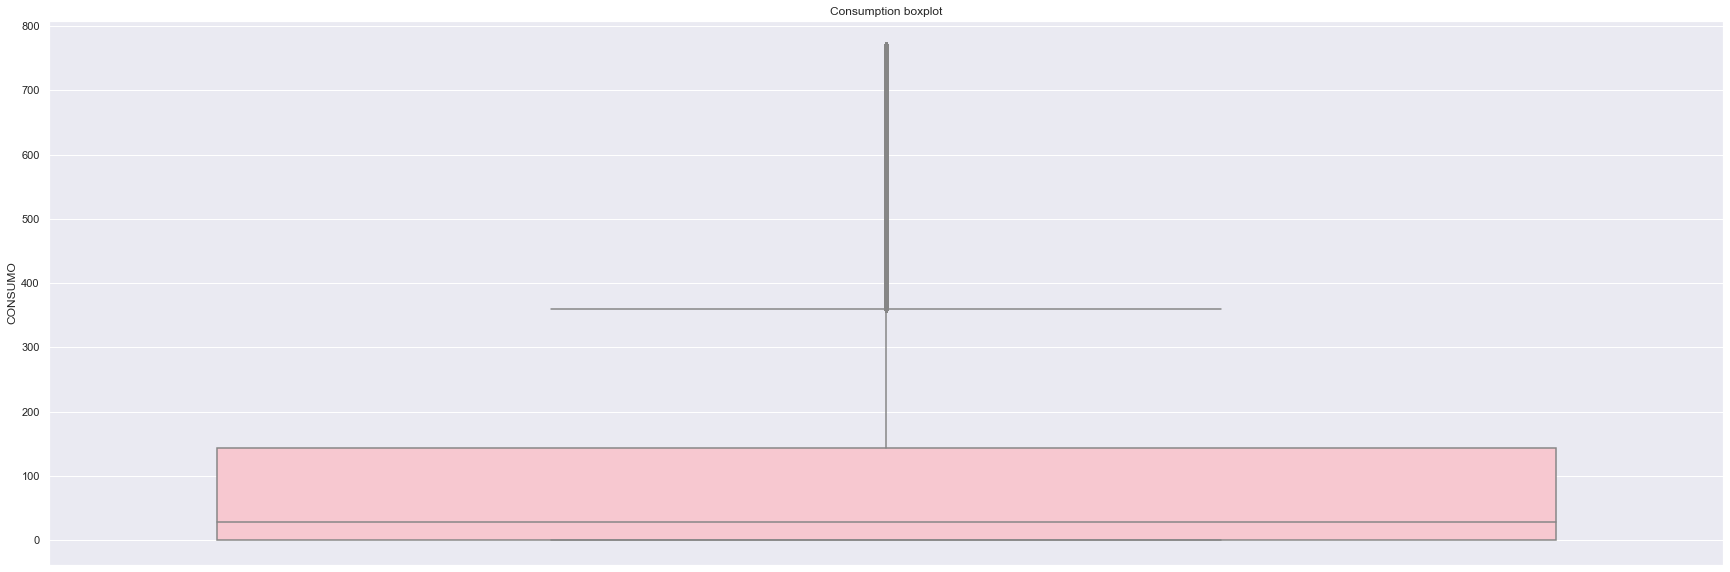

In [43]:
# Boxplot consumption
sns.boxplot(y=data_actividad_barcelona['CONSUMO'], color = 'pink').set(title="Consumption boxplot")

In [44]:
# most common activities
data_actividad_barcelona['DESCP EPIGRAF'].value_counts().sort_values()

* al detall de peixos i altres productes deriv           236
Màquines automàtiques sense operador per fotografi       297
* de formació i perfec profess superior                  407
En hotels-apartaments                                    409
Intendents i professors mercantils                       487
                                                       ...  
Altres activitats d'ensenyament (idiomes, etc)         47971
* de locals industrials i altres lloguers              53310
SUBMINISTRAMENTS D'AJUNTAMENT                          56389
ORGANISMES OFICIALS O ENTITATS NO LUCRATIVES           62000
ACTIVITAT DESCONEGUDA                                 118019
Name: DESCP EPIGRAF, Length: 196, dtype: int64

In [45]:
# what activities consum more
grouped = data_actividad_barcelona.groupby('DESCP EPIGRAF').sum()
grouped.sort_values('CONSUMO')

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


CONSUMO  ID_CLIENTE  \
DESCP EPIGRAF                                                          
Professionals serveis de neteja                        0      160270   
* i magatzems generals                              7063        9786   
* Mobles                                            7388       82348   
* D'altres productes n.c.a.a.                       8679      147108   
* al detall de productes de drogueria, perfume      9806      227136   
...                                                  ...         ...   
* de formació i perfec. Profess. no superior     6284461     9855872   
ORGANISMES OFICIALS O ENTITATS NO LUCRATIVES     6697551    14325575   
Altres activitats d'ensenyament (idiomes, etc)   7128605    13599498   
SUBMINISTRAMENTS D'AJUNTAMENT                    9484271    16576458   
ACTIVITAT DESCONEGUDA                           14854386    22253876   

                                                     YEAR   MONTH  TEMPERATURE  
DESCP EPIGRAF                                                                   
Professionals serveis de neteja                   1377988    4524      11634.6  
* i magatzems generals                            1412328    4541      11804.6  
* Mobles                                          1398186    4540      11737.1  
* D'altres productes n.c.a.a.                     2153316    6845      17684.4  
* al detall de productes de drogueria, perfume    1470889    4774      12133.1  
...                                                   ...     ...          ...  
* de formació i perfec. Profess. no superior     76099388  244348     628826.7  
ORGANISMES OFICIALS O ENTITATS NO LUCRATIVES    125246108  402089    1030473.6  
Altres activitats d'ensenyament (idiomes, etc)   96903663  313419     805747.6  
SUBMINISTRAMENTS D'AJUNTAMENT                   113904605  360863     931333.0  
ACTIVITAT DESCONEGUDA                           238411375  775794    1980541.7  

[196 rows x 5 columns]

In [46]:
# how many clients de we have
print('There are ', len(data_actividad_barcelona['ID_CLIENTE'].unique()), ' clients')

# which client are more usual
print('Clients:\n', data_actividad_barcelona['ID_CLIENTE'].value_counts())

There are  333  clients
Clients:
 131    367530
299    263277
294    156260
106    155814
295     63618
        ...  
316       297
238       278
158       236
262       198
120       176
Name: ID_CLIENTE, Length: 333, dtype: int64


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

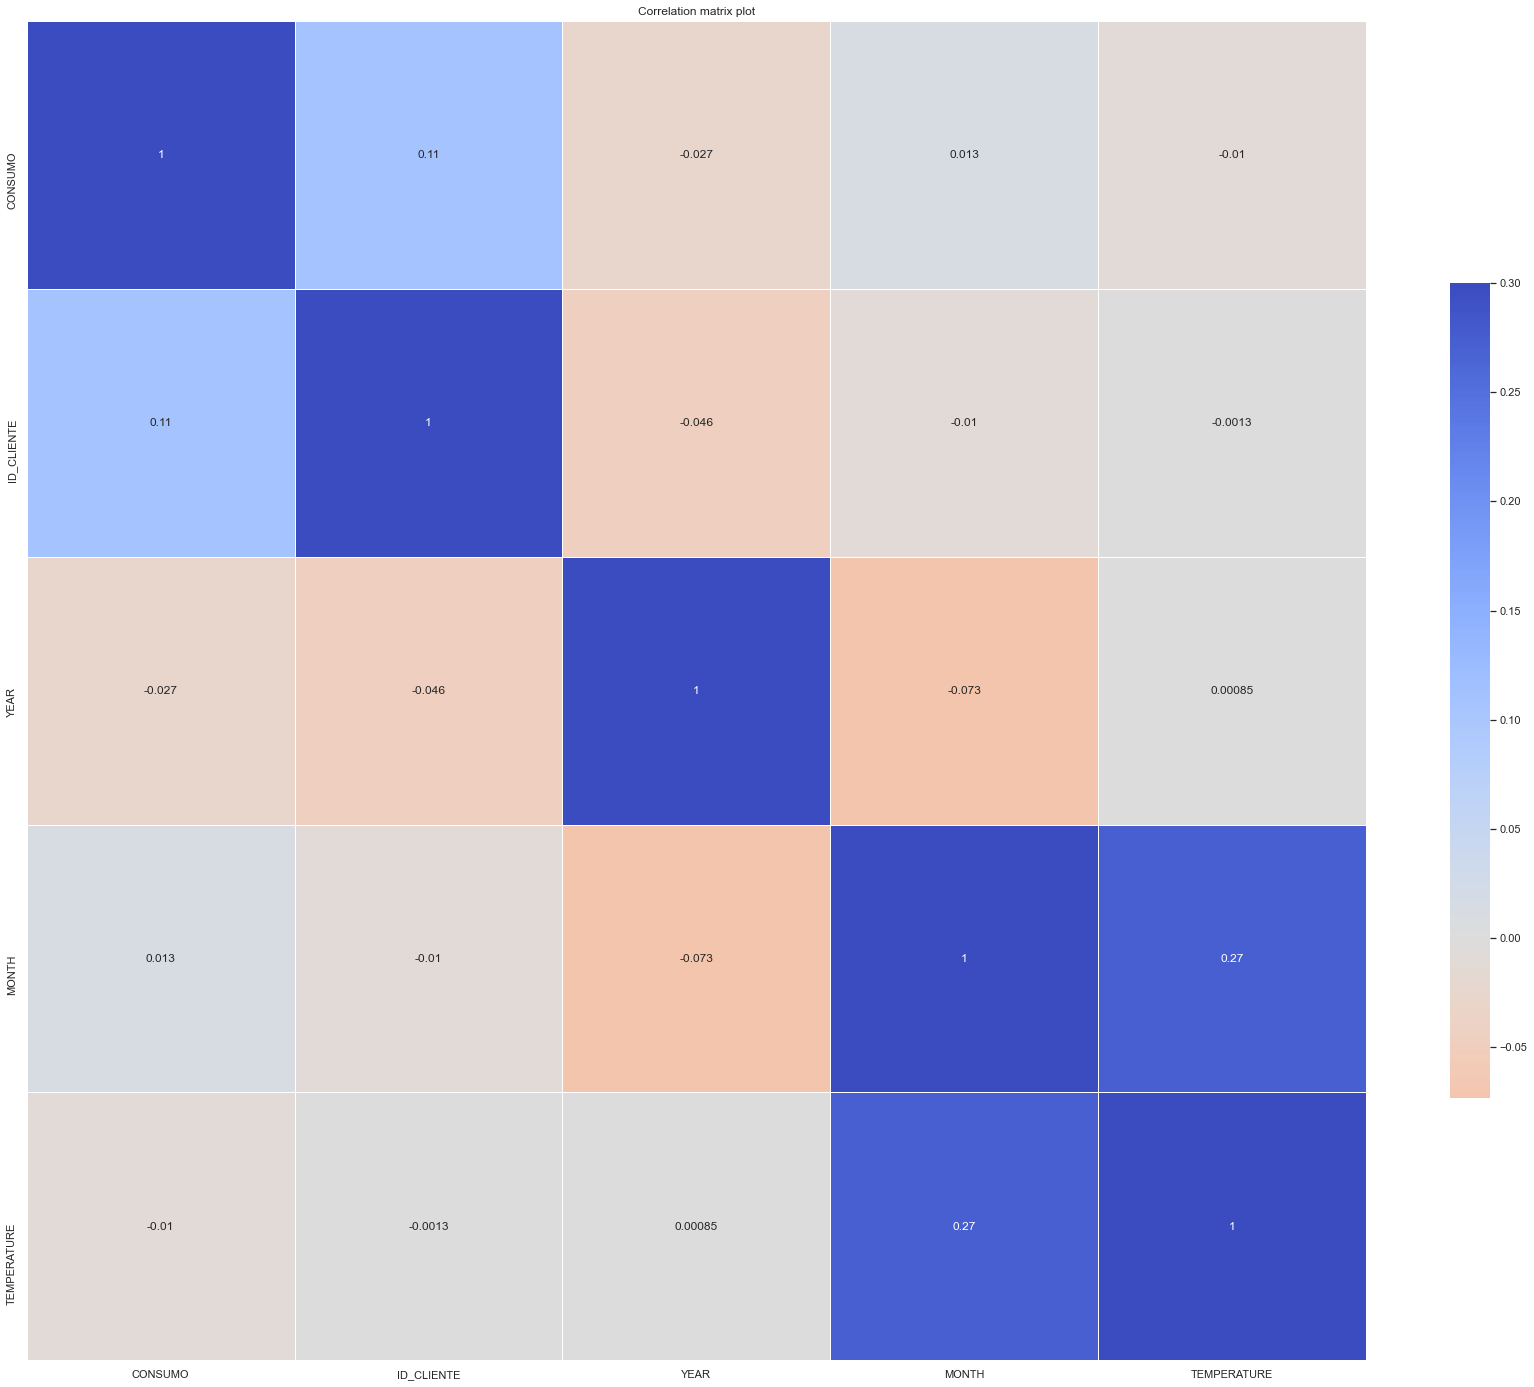

In [47]:
#Compute the correlation matrix
corr = data_actividad_barcelona.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

### HOW COVID AFFECT TO CONSUMPTION AND ACTIVITIES

Text(0.5, 1.0, 'Consumption before, after and during covid')

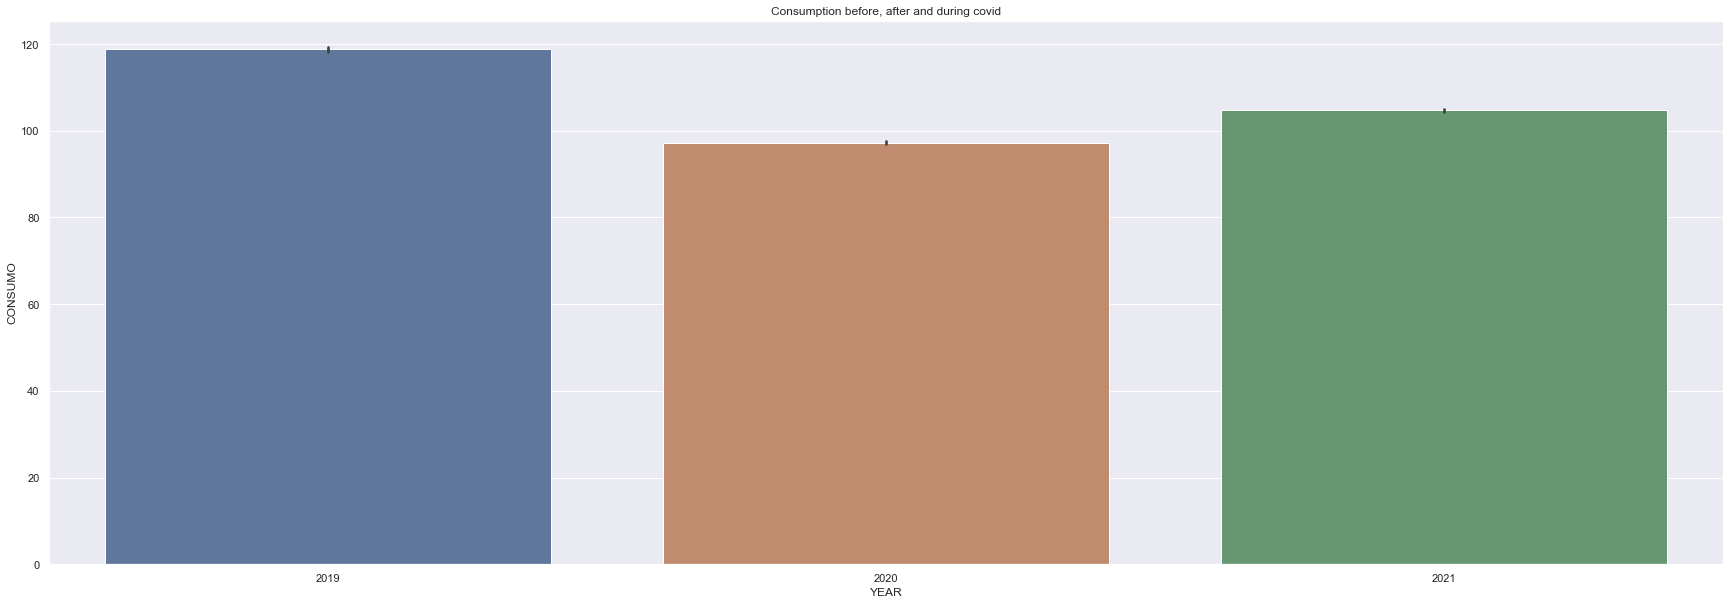

In [48]:
# Evolution water consumption
sns.barplot(data= data_actividad_barcelona, x= "YEAR", y= "CONSUMO", saturation=0.6).set_title('Consumption before, after and during covid')

Text(0.5, 1.0, 'Activities before, after and during covid')

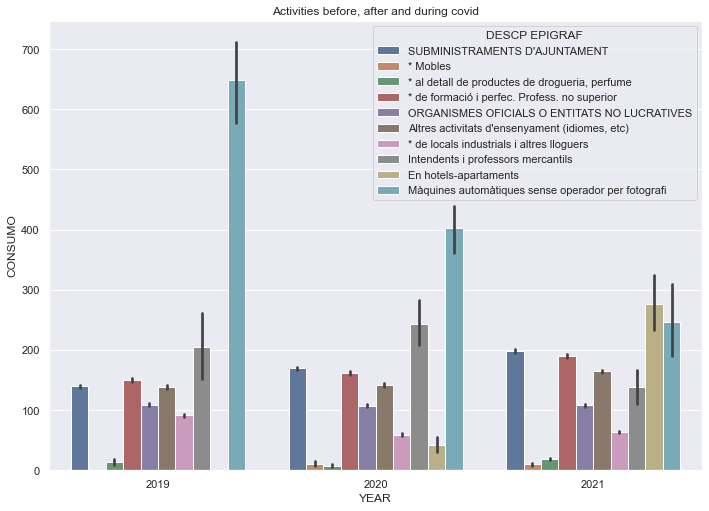

In [49]:
# Evolution activities

# we select 10 activities randomly and we will analyse the evolution during time taking into account covid pandemia
d1 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "SUBMINISTRAMENTS D'AJUNTAMENT"]
d2 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "* Mobles"]
d3 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "* al detall de productes de drogueria, perfume"]
d4 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "* de formació i perfec. Profess. no superior"]
d5 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "ORGANISMES OFICIALS O ENTITATS NO LUCRATIVES"]
d6 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "Altres activitats d'ensenyament (idiomes, etc)"]
d7 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "* de locals industrials i altres lloguers"]
d8 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "Intendents i professors mercantils"]
d9 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "En hotels-apartaments"]
d10 = data_actividad_barcelona[data_actividad_barcelona['DESCP EPIGRAF'] == "Màquines automàtiques sense operador per fotografi"]

d_total=pd.concat([d1,d2,d3,d4,d5,d6,d7,d8,d9,d10], axis=0)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data= d_total, x= "YEAR", y= "CONSUMO", hue = "DESCP EPIGRAF", saturation=0.6).set_title('Activities before, after and during covid')

## BLOCK 3: CENSUS SECTION DATASET

In [50]:
# OPEN DATA
data_seccio_censal = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block3/data_water_census_section.csv", sep=",")
data_sc = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block3/data_water_population_census_section.csv", sep=",")

In [51]:
# remove outliers
data_seccio_censal = remove_outlier(data_seccio_censal, 'CONSUM')
data_sc = remove_outlier(data_sc, 'CONSUM')

### WATER CONSUMPTION BY CENSUS SECTION

First we are going to analyse the data from que water consumption by seccio censal dataset

In [52]:
# mean
print('Mean consumption: ', mean(data_seccio_censal['CONSUM']))
# variance
print('Variance consumption: ', variance(data_seccio_censal['CONSUM']))
# median
print('Median consumption: ', median(data_seccio_censal['CONSUM']))
# quartiles
print('Quantiles consumption: ', quantiles(data_seccio_censal['CONSUM']))

Mean consumption:  223.20459643474038
Variance consumption:  21301.255105692097
Median consumption:  201
Quantiles consumption:  [116.0, 201.0, 302.0]


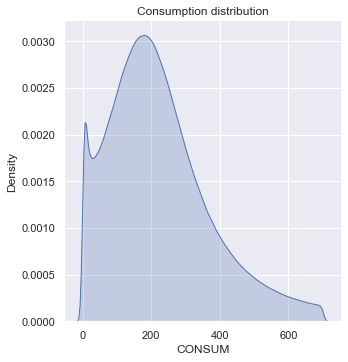

In [53]:
# Plot consumption distribution
sns.displot(data_seccio_censal['CONSUM'],kind="kde", fill=True).set(title='Consumption distribution')

[Text(0.5, 1.0, 'Water consumption boxplot')]

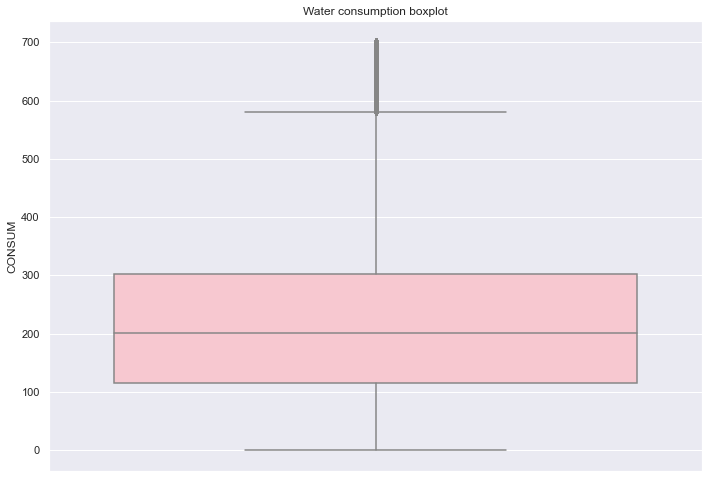

In [54]:
# Box plot
sns.boxplot(y=data_seccio_censal['CONSUM'], color = 'pink').set(title="Water consumption boxplot")

<AxesSubplot: xlabel='YEAR', ylabel='CONSUM'>

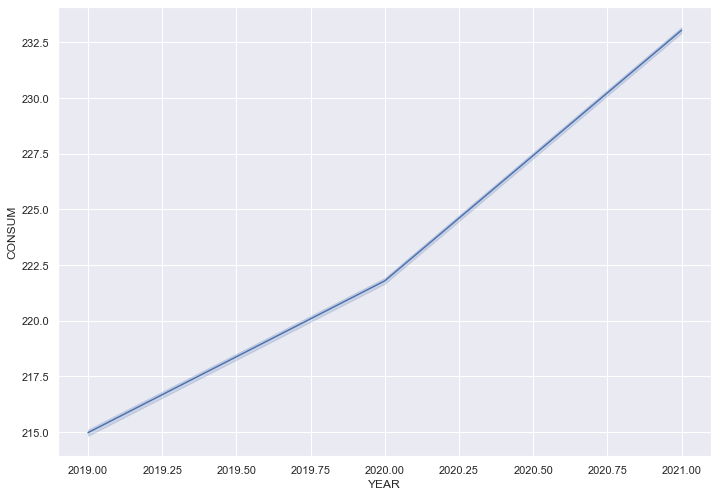

In [55]:
# Evolution of consumption by census section
sns.lineplot(data= data_seccio_censal, x= "YEAR", y= "CONSUM")

In [194]:
# which census section consum more and less
grouped = data_seccio_censal.groupby('SECCIO_CENSAL').sum()
grouped.sort_values('CONSUM')

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


CONSUM       YEAR   MONTH      DAY
SECCIO_CENSAL                                      
5029                 47       2020      10       31
6087                240       2021      11        9
7098                275       2020       8       29
67                  318       2020       9        6
6057                452       2020      11        7
...                 ...        ...     ...      ...
3024           16026728  145446307  461961  1123472
3012           16865666  134478341  426643  1037637
2077           17332396  135215868  431624  1048340
2081           17363726  161859602  521281  1252769
3025           18848922  165249079  523909  1275552

[649 rows x 4 columns]

In [197]:
# we get the top 3 census section (consum more)
top1 = data_seccio_censal[data_seccio_censal['SECCIO_CENSAL'] == 3025]
top2 = data_seccio_censal[data_seccio_censal['SECCIO_CENSAL'] == 2081]
top3 = data_seccio_censal[data_seccio_censal['SECCIO_CENSAL'] == 2077]

<AxesSubplot: xlabel='YEAR', ylabel='CONSUM'>

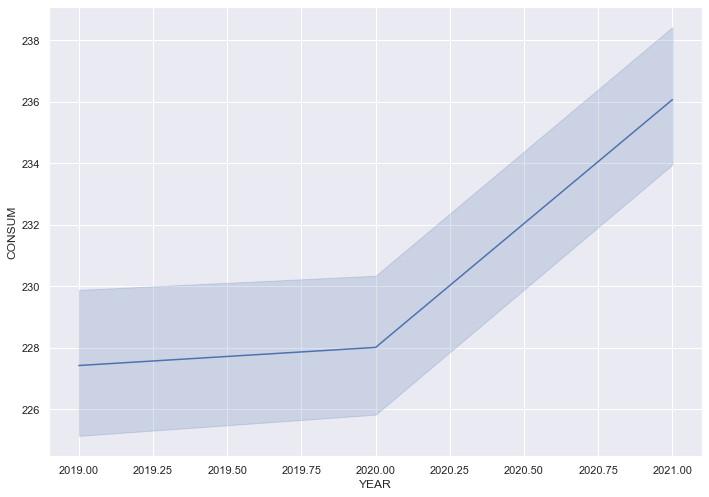

In [203]:
# line plot top1 census section consumption by years
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=top1, x="YEAR", y="CONSUM")

<AxesSubplot: xlabel='YEAR', ylabel='CONSUM'>

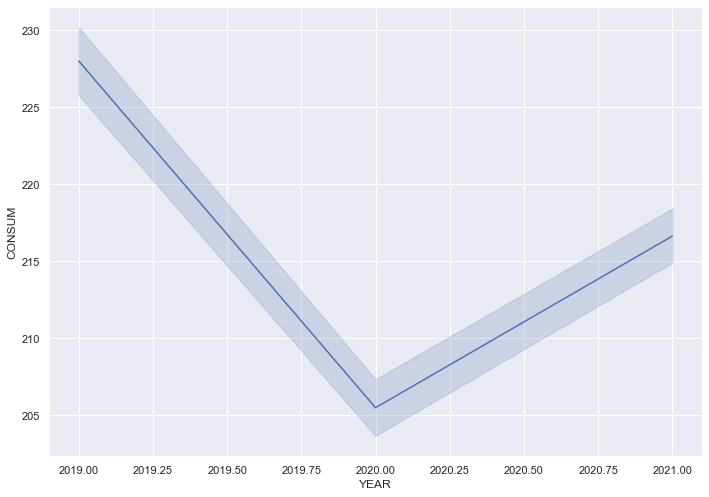

In [60]:
# line plot top2 census section consumption by years
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=top2, x="YEAR", y="CONSUM")

<AxesSubplot: xlabel='YEAR', ylabel='CONSUM'>

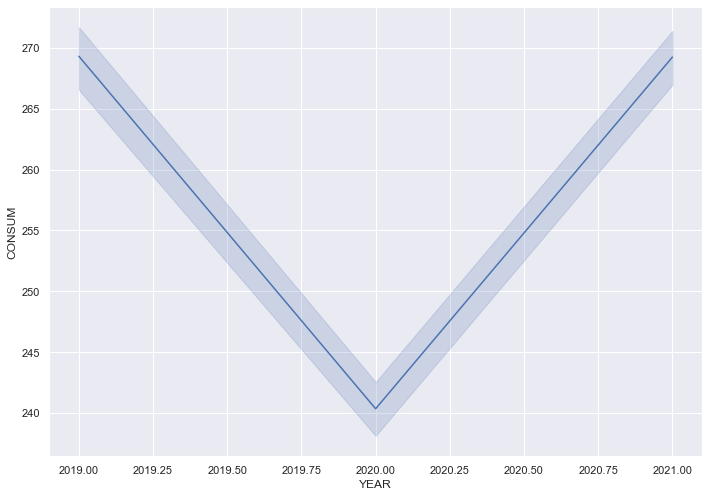

In [62]:
# line plot top3 census section consumption by years
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=top3, x="YEAR", y="CONSUM")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

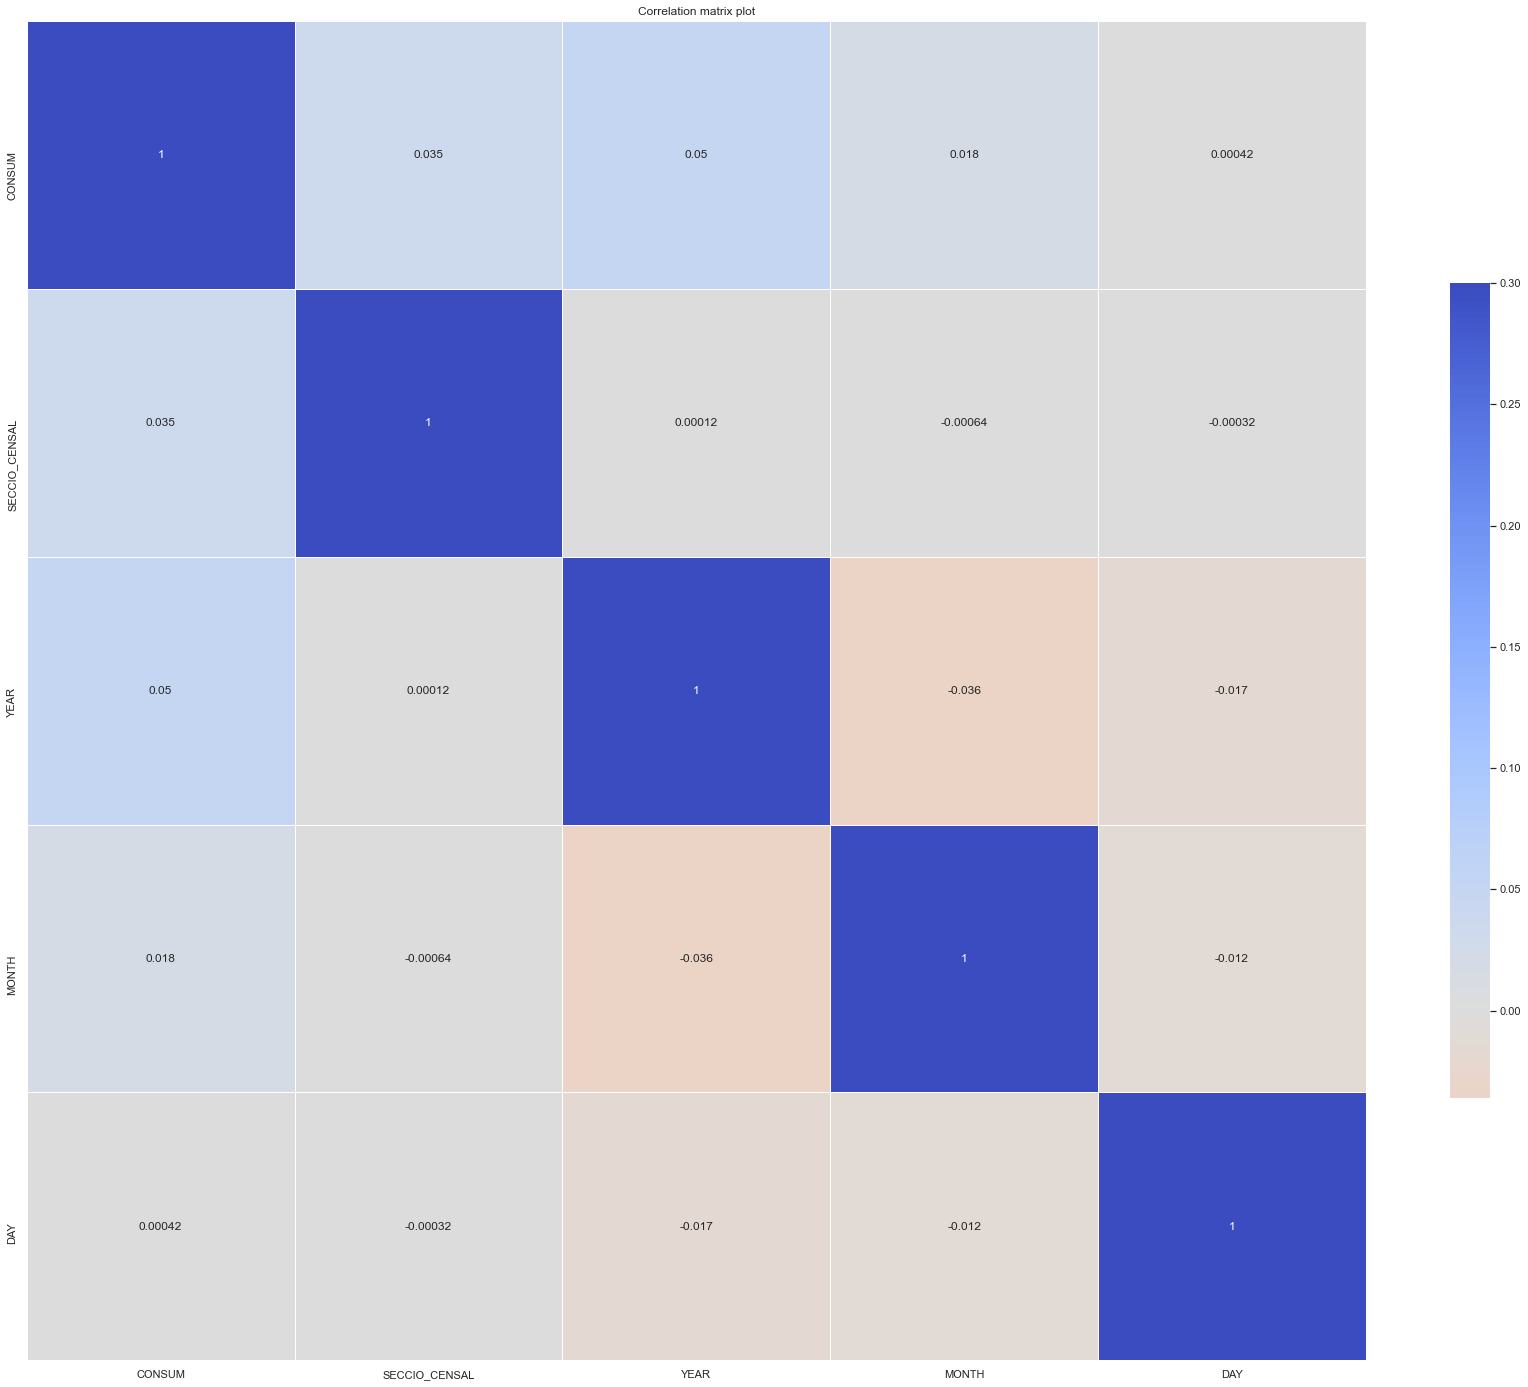

In [64]:
#Compute the correlation matrix
corr = data_seccio_censal.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

### HOW COVID AFFECT ON WATER CONSUMPTION

In [65]:
# separete the dataset into before, after and during covid
df_before = data_seccio_censal[data_seccio_censal['YEAR'] == 2019]
df_after = data_seccio_censal[data_seccio_censal['YEAR'] == 2021]
df_during = data_seccio_censal[data_seccio_censal['YEAR'] == 2020]

In [208]:
# mean, median, quantiles and variance before covid
print('Mean before covid: ', mean(df_before['CONSUM']))
print('Median before covid: ', median(df_before['CONSUM']))
print('Variance before covid: ', variance(df_before['CONSUM']))
print('Quantiles before covid: ', quantiles(df_before['CONSUM']))

# mean, median, quantiles and variance after covid
print('Mean after covid: ', mean(df_after['CONSUM']))
print('Median after covid: ', median(df_after['CONSUM']))
print('Variance after covid: ', variance(df_after['CONSUM']))
print('Quantiles after covid: ', quantiles(df_after['CONSUM']))

# mean, median, quantiles and variance during covid
print('Mean during covid: ', mean(df_during['CONSUM']))
print('Median during covid: ', median(df_during['CONSUM']))
print('Variance during covid: ', variance(df_during['CONSUM']))
print('Quantiles during covid: ', quantiles(df_during['CONSUM']))

Mean before covid:  214.9777372410906
Median before covid:  189
Variance before covid:  22444.87670245443
Quantiles before covid:  [103.0, 189.0, 296.0]
Mean after covid:  233.0483138177405
Median after covid:  212.0
Variance after covid:  20387.339123385747
Quantiles after covid:  [132.0, 212.0, 310.0]
Mean during covid:  221.79278158374981
Median during covid:  201.0
Variance during covid:  20889.685864720497
Quantiles during covid:  [116.0, 201.0, 301.0]


<AxesSubplot: title={'center': 'Consumption distribution plot'}, xlabel='CONSUM', ylabel='Density'>

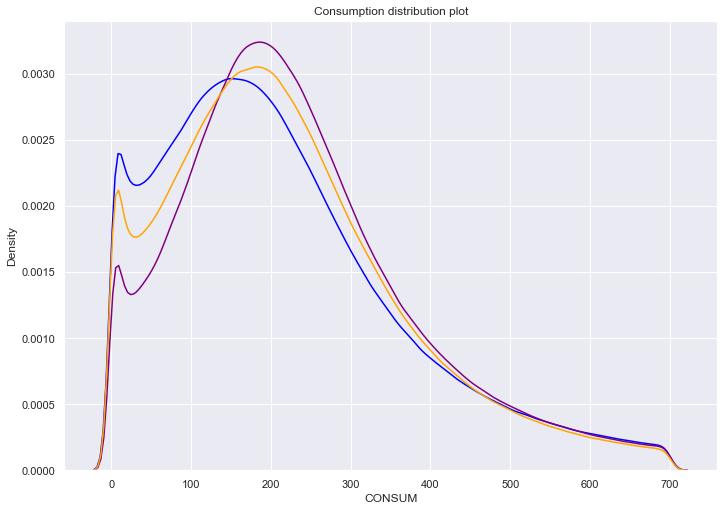

In [67]:
# kdeplot
sns.kdeplot(df_before['CONSUM'], fill = False, color = 'blue').set(title = 'Consumption distribution plot')
sns.kdeplot(df_after['CONSUM'], fill = False, color = 'purple')
sns.kdeplot(df_during['CONSUM'], fill = False, color = 'orange')

[Text(0.5, 1.0, 'During boxplot')]

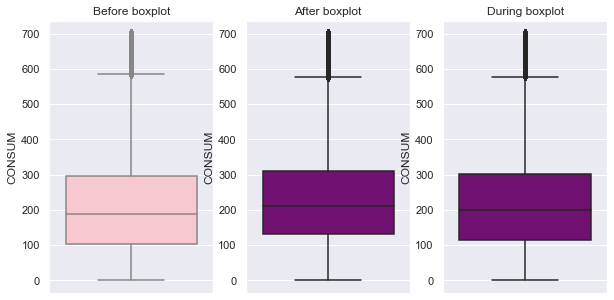

In [68]:
# Box plot
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(10,5))
sns.boxplot(y=df_before['CONSUM'], ax=axes[0], color = 'pink').set(title="Before boxplot")
sns.boxplot(y=df_after['CONSUM'], ax=axes[1], color = 'purple').set(title="After boxplot")
sns.boxplot(y=df_during['CONSUM'], ax=axes[2], color = 'purple').set(title="During boxplot")

### POPULATION AND CONSUMPTION BY CENSUS SECTION DURING 2020 AND 2021

In [69]:
data_sc

DIA  CONSUM  SECCIO_CENSAL  YEAR  MONTH  DAY  HOMES  DONES  \
0        2020-01-01     233           2166  2020      1    1   1016   1106   
1        2020-01-01     178           2166  2020      1    1   1016   1106   
2        2020-01-01     138           2166  2020      1    1   1016   1106   
3        2020-01-01     438           2166  2020      1    1   1016   1106   
4        2020-01-01       1           2166  2020      1    1   1016   1106   
...             ...     ...            ...   ...    ...  ...    ...    ...   
7998986  2021-12-13     355           8098  2021     12   13    597    680   
7998987  2021-12-14     479           8098  2021     12   14    597    680   
7999004  2021-12-04      10           7099  2021     12    4    505    539   
7999005  2021-12-05      10           7099  2021     12    5    505    539   
7999012  2021-12-12     600           7099  2021     12   12    505    539   

         EDAT_0_A_14  EDAT_15_A_24  EDAT_25_A_64  EDAT_65_A_MES  NACIONALS  \
0                246           174          1300            402       1491   
1                246           174          1300            402       1491   
2                246           174          1300            402       1491   
3                246           174          1300            402       1491   
4                246           174          1300            402       1491   
...              ...           ...           ...            ...        ...   
7998986          157           156           694            270       1035   
7998987          157           156           694            270       1035   
7999004           75            95           638            236        975   
7999005           75            95           638            236        975   
7999012           75            95           638            236        975   

         COMUNITARIS  ESTRANGERS  Desc_Mes  Temperatura  \
0                223         408     Gener         10.0   
1                223         408     Gener         10.0   
2                223         408     Gener         10.0   
3                223         408     Gener         10.0   
4                223         408     Gener         10.0   
...              ...         ...       ...          ...   
7998986           25         217  Desembre         10.9   
7998987           25         217  Desembre         10.9   
7999004           21          48  Desembre         10.9   
7999005           21          48  Desembre         10.9   
7999012           21          48  Desembre         10.9   

         CONSUMPTION_PER_POPULATION  
0                          0.109802  
1                          0.083883  
2                          0.065033  
3                          0.206409  
4                          0.000471  
...                             ...  
7998986                    0.277995  
7998987                    0.375098  
7999004                    0.009579  
7999005                    0.009579  
7999012                    0.574713  

[7246876 rows x 18 columns]

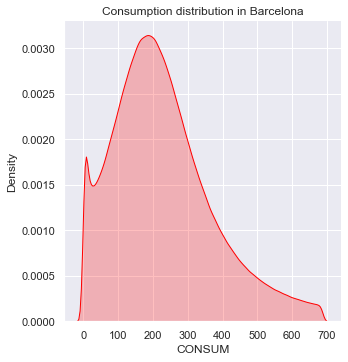

In [70]:
#Plot consumption distribution
sns.displot(data_sc['CONSUM'], kind="kde", fill=True, color = 'red').set(title='Consumption distribution in Barcelona')

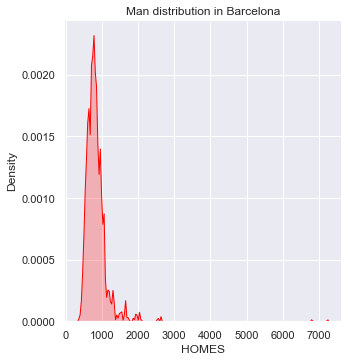

In [71]:
#Plot man distribution
sns.displot(data_sc['HOMES'], kind="kde", fill=True, color = 'red').set(title='Man distribution in Barcelona')

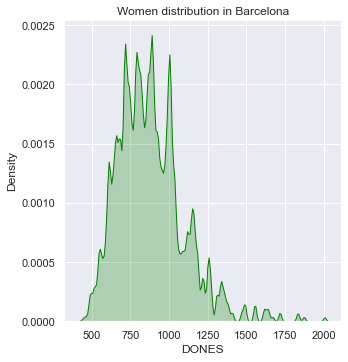

In [72]:
#Plot women distribution
sns.displot(data_sc['DONES'], kind="kde", fill=True, color = 'green').set(title='Women distribution in Barcelona')

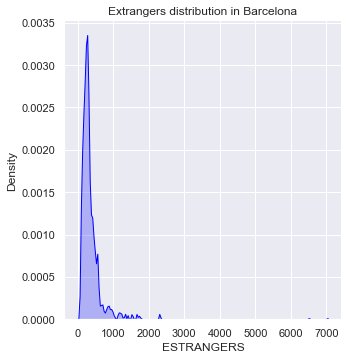

In [73]:
#Plot estrangers distribution
sns.displot(data_sc['ESTRANGERS'], kind="kde", fill=True, color = 'blue').set(title='Extrangers distribution in Barcelona')

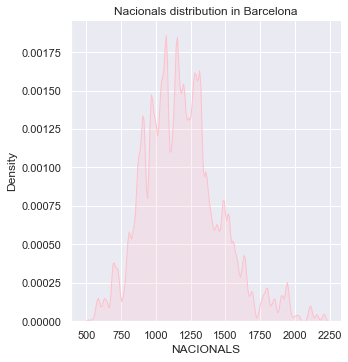

In [74]:
#Plot nacionals distribution
sns.displot(data_sc['NACIONALS'], kind="kde", fill=True, color = 'pink').set(title='Nacionals distribution in Barcelona')

[Text(0.5, 1.0, 'Nacionals boxplot')]

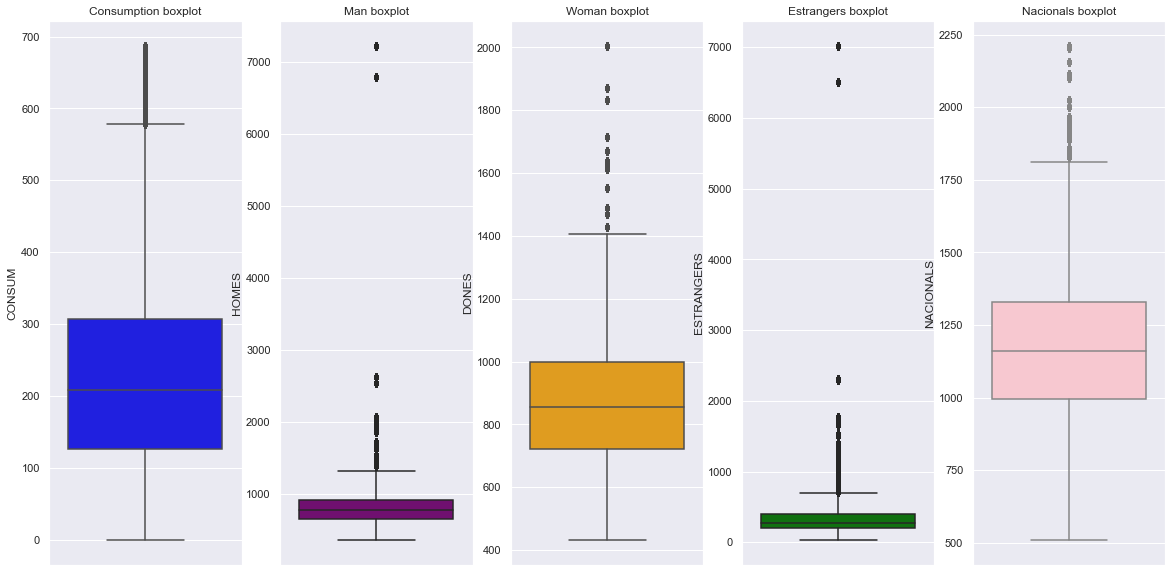

In [75]:
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(20,10))
sns.boxplot(y=data_sc['CONSUM'], ax=axes[0], color = 'blue').set(title="Consumption boxplot")
sns.boxplot(y=data_sc['HOMES'], ax=axes[1], color = 'purple').set(title="Man boxplot")
sns.boxplot(y=data_sc['DONES'], ax=axes[2], color = 'orange').set(title="Woman boxplot")
sns.boxplot(y=data_sc['ESTRANGERS'], ax=axes[3], color = 'green').set(title="Estrangers boxplot")
sns.boxplot(y=data_sc['NACIONALS'], ax=axes[4], color = 'pink').set(title="Nacionals boxplot")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

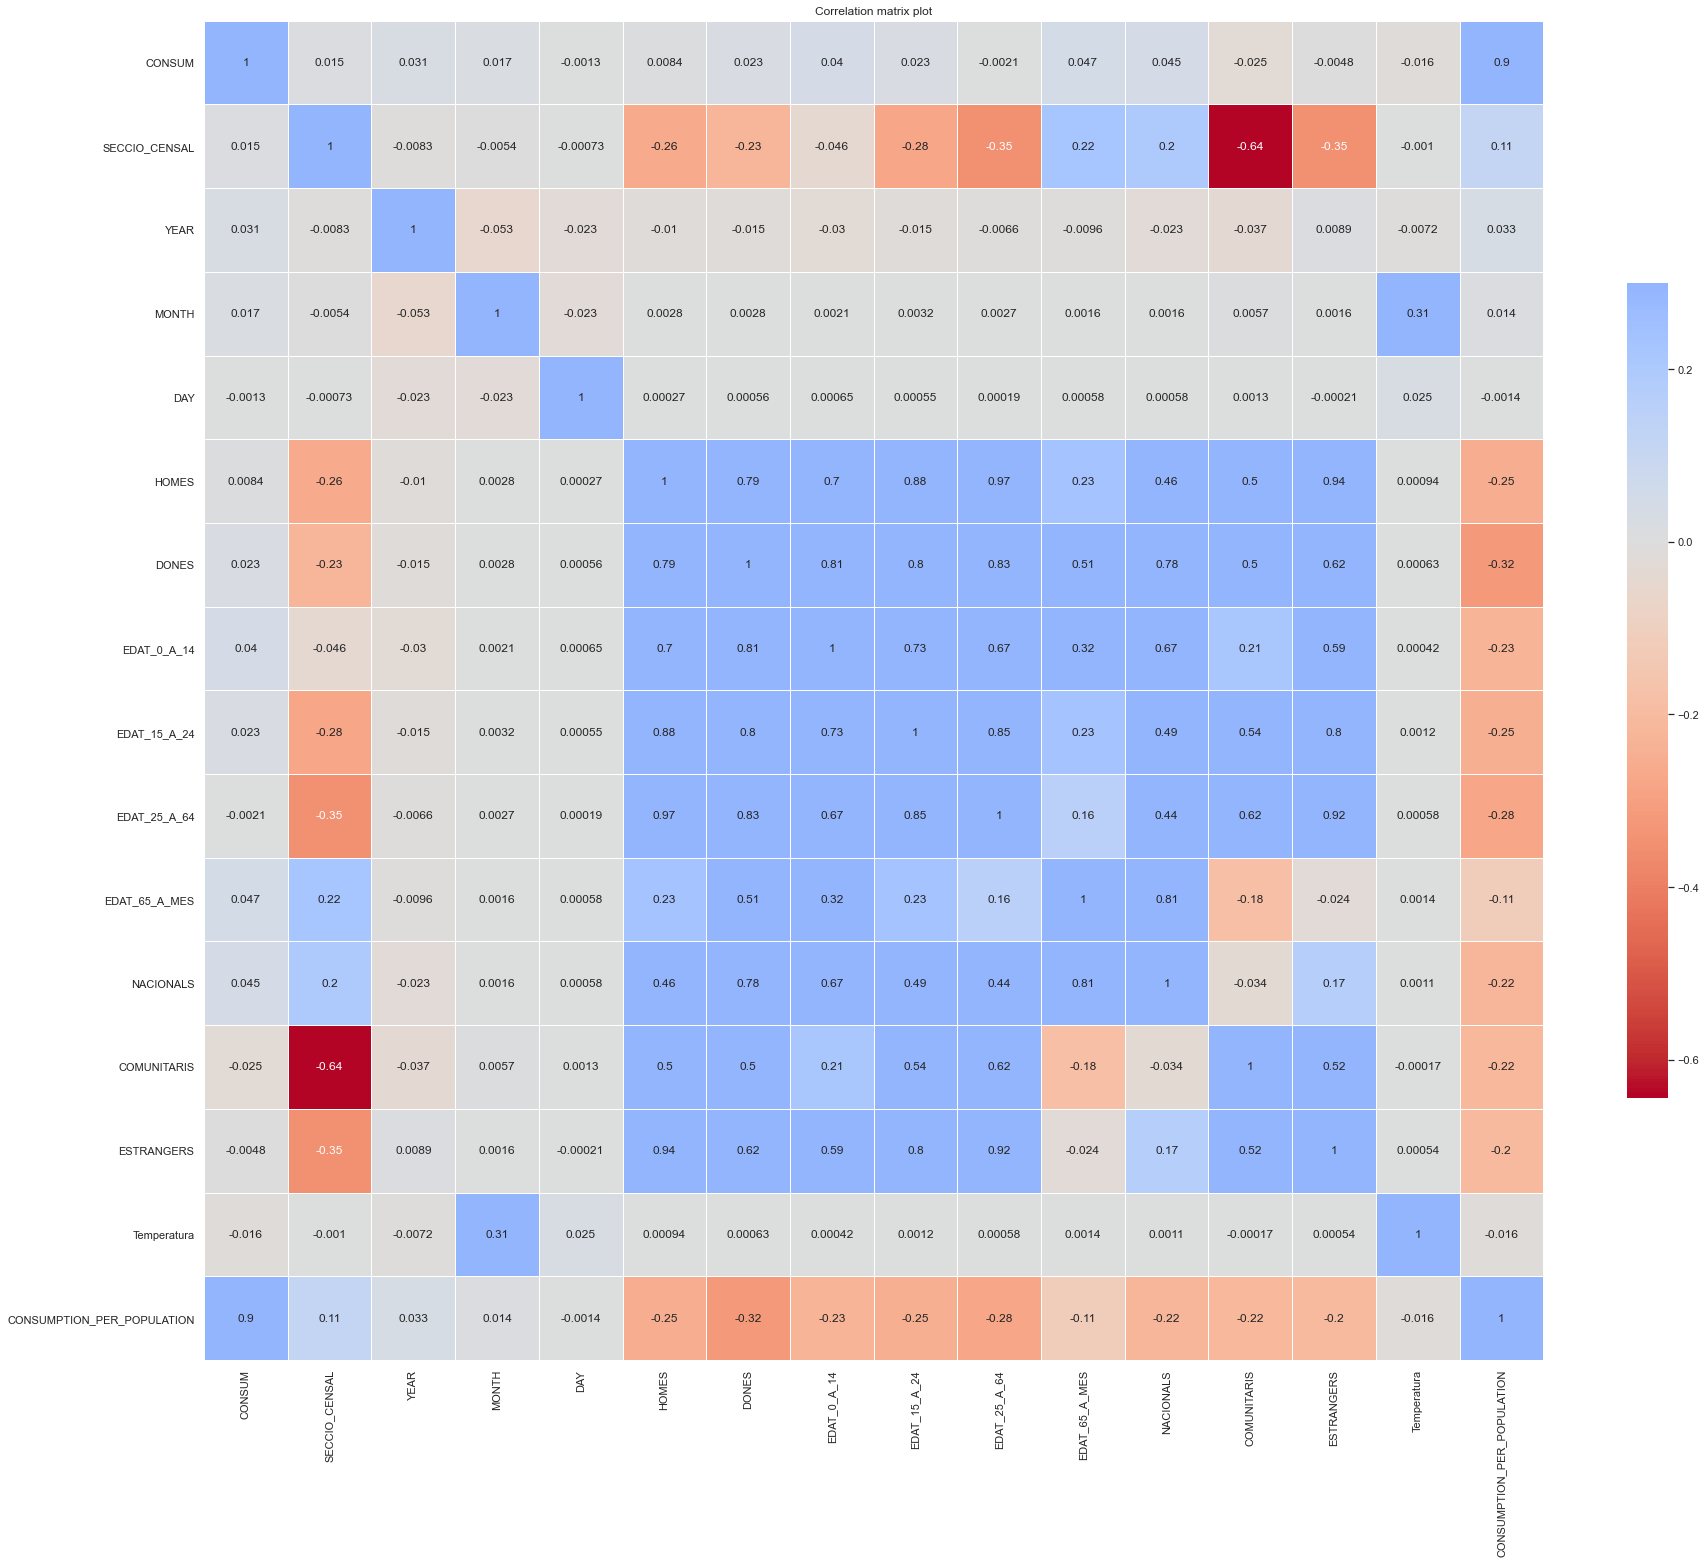

In [76]:
#Compute the correlation matrix
corr = data_sc.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

In [211]:
# information about the population of the census sections

# now we are going to select the 5 census sections that appear more and analyse the population of each
# consum more no because maybe they have one or two registers with high values and the mean is high but if they do not have 
# registers in the two years we can not analyse the evolution

group_sections = data_sc.groupby('SECCIO_CENSAL').count()
group_sections = group_sections.drop(['YEAR','MONTH','DAY'], axis=1)
group_sections.reset_index().sort_values('CONSUM')

SECCIO_CENSAL    DIA  CONSUM  HOMES  DONES  EDAT_0_A_14  EDAT_15_A_24  \
407           5012      1       1      1      1            1             1   
411           5029      1       1      1      1            1             1   
451           6087      1       1      1      1            1             1   
463           7098      1       1      1      1            1             1   
444           6057      1       1      1      1            1             1   
..             ...    ...     ...    ...    ...          ...           ...   
241           3015  47146   47146  47146  47146        47146         47146   
22            1023  50661   50661  50661  50661        50661         50661   
26            1028  51202   51202  51202  51202        51202         51202   
134           2081  53658   53658  53658  53658        53658         53658   
251           3025  54026   54026  54026  54026        54026         54026   

     EDAT_25_A_64  EDAT_65_A_MES  NACIONALS  COMUNITARIS  ESTRANGERS  \
407             1              1          1            1           1   
411             1              1          1            1           1   
451             1              1          1            1           1   
463             1              1          1            1           1   
444             1              1          1            1           1   
..            ...            ...        ...          ...         ...   
241         47146          47146      47146        47146       47146   
22          50661          50661      50661        50661       50661   
26          51202          51202      51202        51202       51202   
134         53658          53658      53658        53658       53658   
251         54026          54026      54026        54026       54026   

     Desc_Mes  Temperatura  CONSUMPTION_PER_POPULATION  
407         1            1                           1  
411         1            1                           1  
451         1            1                           1  
463         1            1                           1  
444         1            1                           1  
..        ...          ...                         ...  
241     47146        47146                       47146  
22      50661        50661                       50661  
26      51202        51202                       51202  
134     53658        53658                       53658  
251     54026        54026                       54026  

[499 rows x 15 columns]

Text(0.5, 1.0, 'Consumption before, after and during covid by census section')

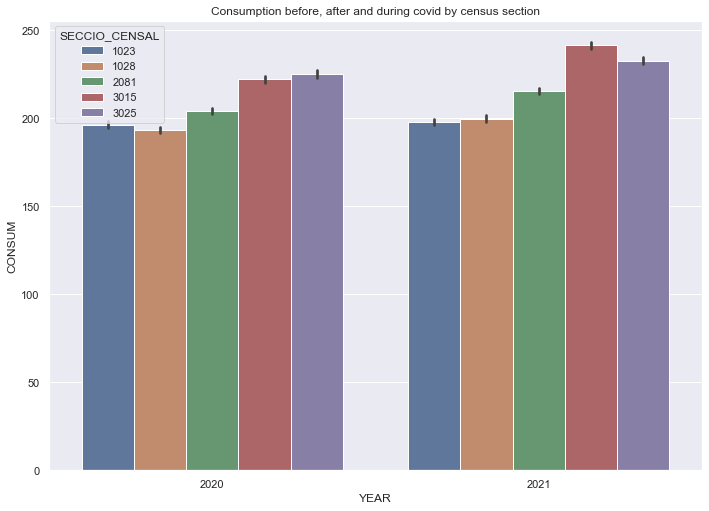

In [212]:
# top 2 census sections consumption 
top1 = data_sc[data_sc['SECCIO_CENSAL'] ==3025]
top2 = data_sc[data_sc['SECCIO_CENSAL'] ==2081]
top3 = data_sc[data_sc['SECCIO_CENSAL'] ==1028]
top4 = data_sc[data_sc['SECCIO_CENSAL'] ==1023]
top5 = data_sc[data_sc['SECCIO_CENSAL'] ==3015]

top = pd.concat([top1,top2,top3,top4,top5], axis=0)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data= top, x= "YEAR", y= "CONSUM", hue = "SECCIO_CENSAL", saturation=0.6).set_title('Consumption before, after and during covid by census section')

In [213]:
top1

DIA  CONSUM  SECCIO_CENSAL  YEAR  MONTH  DAY  HOMES  DONES  \
36066    2020-01-01      33           3025  2020      1    1    693    657   
36067    2020-01-01     648           3025  2020      1    1    693    657   
36069    2020-01-01       1           3025  2020      1    1    693    657   
36070    2020-01-01       8           3025  2020      1    1    693    657   
36072    2020-01-01     107           3025  2020      1    1    693    657   
...             ...     ...            ...   ...    ...  ...    ...    ...   
7953849  2021-12-14     176           3025  2021     12   14    771    740   
7953850  2021-12-14     294           3025  2021     12   14    771    740   
7953851  2021-12-14      87           3025  2021     12   14    771    740   
7953852  2021-12-14       3           3025  2021     12   14    771    740   
7953853  2021-12-14     516           3025  2021     12   14    771    740   

         EDAT_0_A_14  EDAT_15_A_24  EDAT_25_A_64  EDAT_65_A_MES  NACIONALS  \
36066            174            99           847            230       1153   
36067            174            99           847            230       1153   
36069            174            99           847            230       1153   
36070            174            99           847            230       1153   
36072            174            99           847            230       1153   
...              ...           ...           ...            ...        ...   
7953849          224           122           934            231       1294   
7953850          224           122           934            231       1294   
7953851          224           122           934            231       1294   
7953852          224           122           934            231       1294   
7953853          224           122           934            231       1294   

         COMUNITARIS  ESTRANGERS  Desc_Mes  Temperatura  \
36066             30         167     Gener         10.0   
36067             30         167     Gener         10.0   
36069             30         167     Gener         10.0   
36070             30         167     Gener         10.0   
36072             30         167     Gener         10.0   
...              ...         ...       ...          ...   
7953849           42         175  Desembre         10.9   
7953850           42         175  Desembre         10.9   
7953851           42         175  Desembre         10.9   
7953852           42         175  Desembre         10.9   
7953853           42         175  Desembre         10.9   

         CONSUMPTION_PER_POPULATION  
36066                      0.024444  
36067                      0.480000  
36069                      0.000741  
36070                      0.005926  
36072                      0.079259  
...                             ...  
7953849                    0.116479  
7953850                    0.194573  
7953851                    0.057578  
7953852                    0.001985  
7953853                    0.341496  

[54026 rows x 18 columns]

In [214]:
top2

DIA  CONSUM  SECCIO_CENSAL  YEAR  MONTH  DAY  HOMES  DONES  \
70295    2020-01-01     336           2081  2020      1    1    968   1166   
70296    2020-01-01     136           2081  2020      1    1    968   1166   
70297    2020-01-01      89           2081  2020      1    1    968   1166   
70298    2020-01-01     593           2081  2020      1    1    968   1166   
70299    2020-01-01     327           2081  2020      1    1    968   1166   
...             ...     ...            ...   ...    ...  ...    ...    ...   
7983422  2021-12-14     175           2081  2021     12   14   1024   1183   
7983423  2021-12-14      96           2081  2021     12   14   1024   1183   
7983425  2021-12-14     176           2081  2021     12   14   1024   1183   
7983426  2021-12-14     243           2081  2021     12   14   1024   1183   
7983428  2021-12-14      96           2081  2021     12   14   1024   1183   

         EDAT_0_A_14  EDAT_15_A_24  EDAT_25_A_64  EDAT_65_A_MES  NACIONALS  \
70295            210           210          1223            491       1551   
70296            210           210          1223            491       1551   
70297            210           210          1223            491       1551   
70298            210           210          1223            491       1551   
70299            210           210          1223            491       1551   
...              ...           ...           ...            ...        ...   
7983422          191           238          1287            491       1526   
7983423          191           238          1287            491       1526   
7983425          191           238          1287            491       1526   
7983426          191           238          1287            491       1526   
7983428          191           238          1287            491       1526   

         COMUNITARIS  ESTRANGERS  Desc_Mes  Temperatura  \
70295            248         335     Gener         10.0   
70296            248         335     Gener         10.0   
70297            248         335     Gener         10.0   
70298            248         335     Gener         10.0   
70299            248         335     Gener         10.0   
...              ...         ...       ...          ...   
7983422          289         392  Desembre         10.9   
7983423          289         392  Desembre         10.9   
7983425          289         392  Desembre         10.9   
7983426          289         392  Desembre         10.9   
7983428          289         392  Desembre         10.9   

         CONSUMPTION_PER_POPULATION  
70295                      0.157451  
70296                      0.063730  
70297                      0.041706  
70298                      0.277882  
70299                      0.153233  
...                             ...  
7983422                    0.079293  
7983423                    0.043498  
7983425                    0.079746  
7983426                    0.110104  
7983428                    0.043498  

[53658 rows x 18 columns]

In [215]:
top4

DIA  CONSUM  SECCIO_CENSAL  YEAR  MONTH  DAY  HOMES  DONES  \
52858    2020-01-01     186           1023  2020      1    1   1049   1068   
52859    2020-01-01      10           1023  2020      1    1   1049   1068   
52860    2020-01-01      50           1023  2020      1    1   1049   1068   
52862    2020-01-01     209           1023  2020      1    1   1049   1068   
52865    2020-01-01     579           1023  2020      1    1   1049   1068   
...             ...     ...            ...   ...    ...  ...    ...    ...   
7843435  2021-12-14     138           1023  2021     12   14    997   1013   
7843436  2021-12-14     140           1023  2021     12   14    997   1013   
7843437  2021-12-14     415           1023  2021     12   14    997   1013   
7843438  2021-12-14     131           1023  2021     12   14    997   1013   
7843439  2021-12-14     483           1023  2021     12   14    997   1013   

         EDAT_0_A_14  EDAT_15_A_24  EDAT_25_A_64  EDAT_65_A_MES  NACIONALS  \
52858            155           176          1495            291       1138   
52859            155           176          1495            291       1138   
52860            155           176          1495            291       1138   
52862            155           176          1495            291       1138   
52865            155           176          1495            291       1138   
...              ...           ...           ...            ...        ...   
7843435          138           188          1390            294       1080   
7843436          138           188          1390            294       1080   
7843437          138           188          1390            294       1080   
7843438          138           188          1390            294       1080   
7843439          138           188          1390            294       1080   

         COMUNITARIS  ESTRANGERS  Desc_Mes  Temperatura  \
52858            427         552     Gener         10.0   
52859            427         552     Gener         10.0   
52860            427         552     Gener         10.0   
52862            427         552     Gener         10.0   
52865            427         552     Gener         10.0   
...              ...         ...       ...          ...   
7843435          387         543  Desembre         10.9   
7843436          387         543  Desembre         10.9   
7843437          387         543  Desembre         10.9   
7843438          387         543  Desembre         10.9   
7843439          387         543  Desembre         10.9   

         CONSUMPTION_PER_POPULATION  
52858                      0.087860  
52859                      0.004724  
52860                      0.023618  
52862                      0.098725  
52865                      0.273500  
...                             ...  
7843435                    0.068657  
7843436                    0.069652  
7843437                    0.206468  
7843438                    0.065174  
7843439                    0.240299  

[50661 rows x 18 columns]

In [216]:
top5

DIA  CONSUM  SECCIO_CENSAL  YEAR  MONTH  DAY  HOMES  DONES  \
30421    2020-01-01     269           3015  2020      1    1   1515   1554   
30422    2020-01-01       4           3015  2020      1    1   1515   1554   
30423    2020-01-01     115           3015  2020      1    1   1515   1554   
30425    2020-01-01     167           3015  2020      1    1   1515   1554   
30426    2020-01-01     241           3015  2020      1    1   1515   1554   
...             ...     ...            ...   ...    ...  ...    ...    ...   
7933911  2021-12-14     178           3015  2021     12   14   1460   1489   
7933912  2021-12-14     349           3015  2021     12   14   1460   1489   
7933913  2021-12-14     205           3015  2021     12   14   1460   1489   
7933914  2021-12-14     320           3015  2021     12   14   1460   1489   
7933915  2021-12-14     402           3015  2021     12   14   1460   1489   

         EDAT_0_A_14  EDAT_15_A_24  EDAT_25_A_64  EDAT_65_A_MES  NACIONALS  \
30421            324           301          2010            434       1800   
30422            324           301          2010            434       1800   
30423            324           301          2010            434       1800   
30425            324           301          2010            434       1800   
30426            324           301          2010            434       1800   
...              ...           ...           ...            ...        ...   
7933911          320           268          1955            406       1773   
7933912          320           268          1955            406       1773   
7933913          320           268          1955            406       1773   
7933914          320           268          1955            406       1773   
7933915          320           268          1955            406       1773   

         COMUNITARIS  ESTRANGERS  Desc_Mes  Temperatura  \
30421            432         837     Gener         10.0   
30422            432         837     Gener         10.0   
30423            432         837     Gener         10.0   
30425            432         837     Gener         10.0   
30426            432         837     Gener         10.0   
...              ...         ...       ...          ...   
7933911          381         795  Desembre         10.9   
7933912          381         795  Desembre         10.9   
7933913          381         795  Desembre         10.9   
7933914          381         795  Desembre         10.9   
7933915          381         795  Desembre         10.9   

         CONSUMPTION_PER_POPULATION  
30421                      0.087651  
30422                      0.001303  
30423                      0.037471  
30425                      0.054415  
30426                      0.078527  
...                             ...  
7933911                    0.060359  
7933912                    0.118345  
7933913                    0.069515  
7933914                    0.108511  
7933915                    0.136317  

[47146 rows x 18 columns]

[Text(0.5, 1.0, 'Consumption boxplot top5')]

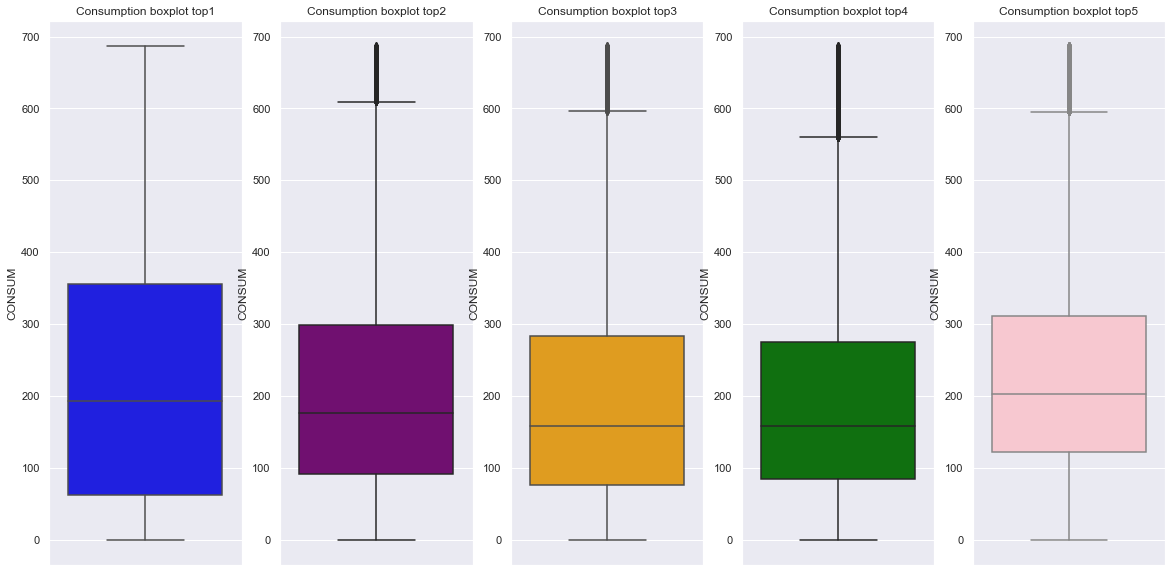

In [217]:
# Boxplots
fig, axes = plt.subplots(1, 5, sharex=True, figsize=(20,10))
sns.boxplot(y=top1['CONSUM'], ax=axes[0], color = 'blue').set(title="Consumption boxplot top1")
sns.boxplot(y=top2['CONSUM'], ax=axes[1], color = 'purple').set(title="Consumption boxplot top2")
sns.boxplot(y=top3['CONSUM'], ax=axes[2], color = 'orange').set(title="Consumption boxplot top3")
sns.boxplot(y=top4['CONSUM'], ax=axes[3], color = 'green').set(title="Consumption boxplot top4")
sns.boxplot(y=top5['CONSUM'], ax=axes[4], color = 'pink').set(title="Consumption boxplot top5")

## BLOCK 4: ELECTRICITY AND CONSUMPTION POSTAL CODE DATASETS

In [85]:
# OPEN DATA
data_postal_code_industrial = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block4/data_industrial_postal_code.csv", sep=",")
data_postal_code_residencial = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block4/data_residencial_postal_code.csv", sep=",")
data_postal_code_serveis = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block4/data_services_postal_code.csv", sep=",")

In [86]:
# remove outliers
data_postal_code_industrial = remove_outlier(data_postal_code_industrial, 'CONSUM')
data_postal_code_industrial = remove_outlier(data_postal_code_industrial, 'Valor')
data_postal_code_residencial = remove_outlier(data_postal_code_residencial, 'CONSUM')
data_postal_code_residencial = remove_outlier(data_postal_code_residencial, 'Valor')
data_postal_code_serveis = remove_outlier(data_postal_code_serveis, 'CONSUM')
data_postal_code_serveis = remove_outlier(data_postal_code_serveis, 'Valor')

Now we will focus on water consumption and electricity value by postal code in the electricity industrial sector

In [87]:
data_postal_code_industrial

DIA  COD_POST_ADRE  CONSUM  YEAR  MONTH  DAY Desc_Mes  \
0      2021-04-14           8036     597  2021      4   14    Abril   
2      2021-04-01           8027    1831  2021      4    1    Abril   
3      2021-04-05           8031    1046  2021      4    5    Abril   
4      2021-04-15           8014     440  2021      4   15    Abril   
5      2021-04-04           8012     240  2021      4    4    Abril   
...           ...            ...     ...   ...    ...  ...      ...   
45197  2019-03-13           8028     827  2019      3   13     Març   
45198  2019-03-24           8007    1825  2019      3   24     Març   
45199  2019-03-24           8026     434  2019      3   24     Març   
45204  2019-03-13           8008     811  2019      3   13     Març   
45205  2019-03-24           8010     883  2019      3   24     Març   

       Temperatura Sector_Economic  Valor  
0             12.9       Indústria   9487  
2             12.9       Indústria   4800  
3             12.9       Indústria   1723  
4             12.9       Indústria  13766  
5             12.9       Indústria   5558  
...            ...             ...    ...  
45197         13.5       Indústria  14935  
45198         13.5       Indústria   7976  
45199         13.5       Indústria   4537  
45204         13.5       Indústria   8603  
45205         13.5       Indústria   2321  

[31614 rows x 10 columns]

In [88]:
# mean
print('Mean consumption: ', mean(data_postal_code_industrial['CONSUM']))
# variance
print('Variance consumption: ', variance(data_postal_code_industrial['CONSUM']))
# median
print('Median consumption: ', median(data_postal_code_industrial['CONSUM']))
# quartiles
print('Quantiles consumption: ', quantiles(data_postal_code_industrial['CONSUM']))

Mean consumption:  805.4004871259568
Variance consumption:  423921.7905428937
Median consumption:  578.0
Quantiles consumption:  [433.0, 578.0, 903.0]


In [89]:
# mean
print('Mean consumption: ', mean(data_postal_code_industrial['Valor']))
# variance
print('Variance consumption: ', variance(data_postal_code_industrial['Valor']))
# median
print('Median consumption: ', median(data_postal_code_industrial['Valor']))
# quartiles
print('Quantiles consumption: ', quantiles(data_postal_code_industrial['Valor']))

Mean consumption:  10640.816536977289
Variance consumption:  53529742.614175
Median consumption:  8948.5
Quantiles consumption:  [5022.0, 8948.5, 14603.0]


In [90]:
# correlation
print('Correlation between consumption and electricity ', data_postal_code_industrial['CONSUM'].corr(data_postal_code_industrial['Valor']))

Correlation between consumption and electricity  0.01264444109789719


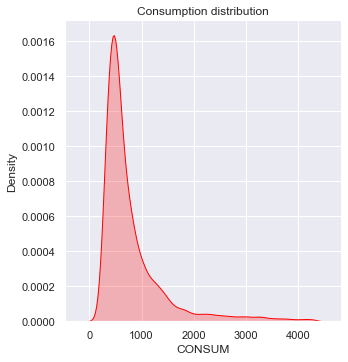

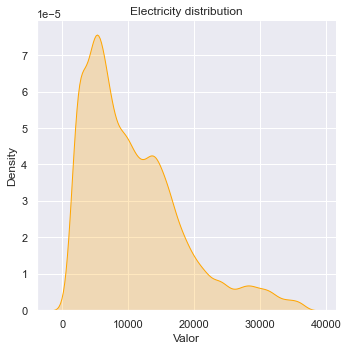

In [91]:
#Plot Consumption and Electricity distribution
sns.displot(data_postal_code_industrial['CONSUM'], kind="kde", color= 'red', fill=True).set(title='Consumption distribution')
sns.displot(data_postal_code_industrial['Valor'], kind="kde", color= 'orange', fill=True).set(title='Electricity distribution')

[Text(0.5, 1.0, 'Electricity boxplot')]

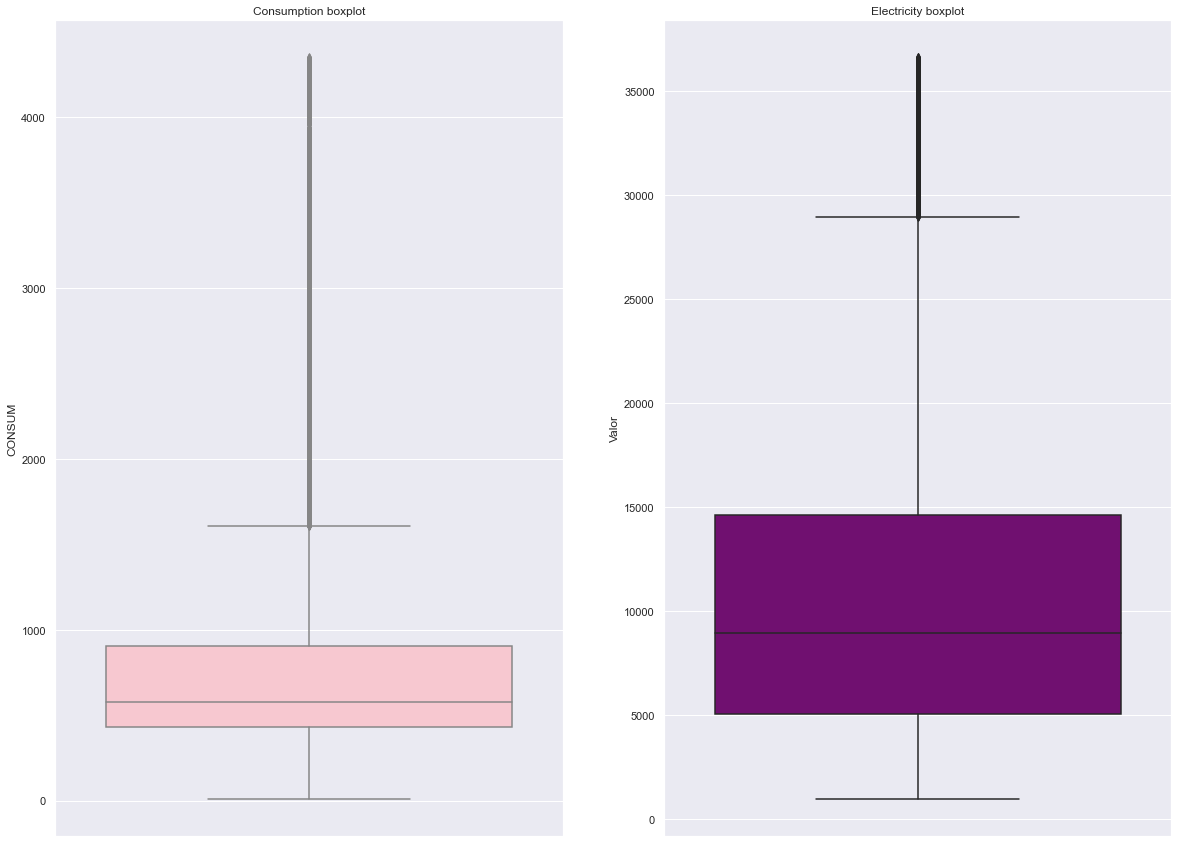

In [92]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,15))
sns.boxplot(y=data_postal_code_industrial['CONSUM'], ax=axes[0], color = 'pink').set(title="Consumption boxplot")
sns.boxplot(y=data_postal_code_industrial['Valor'], ax=axes[1], color = 'purple').set(title="Electricity boxplot")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

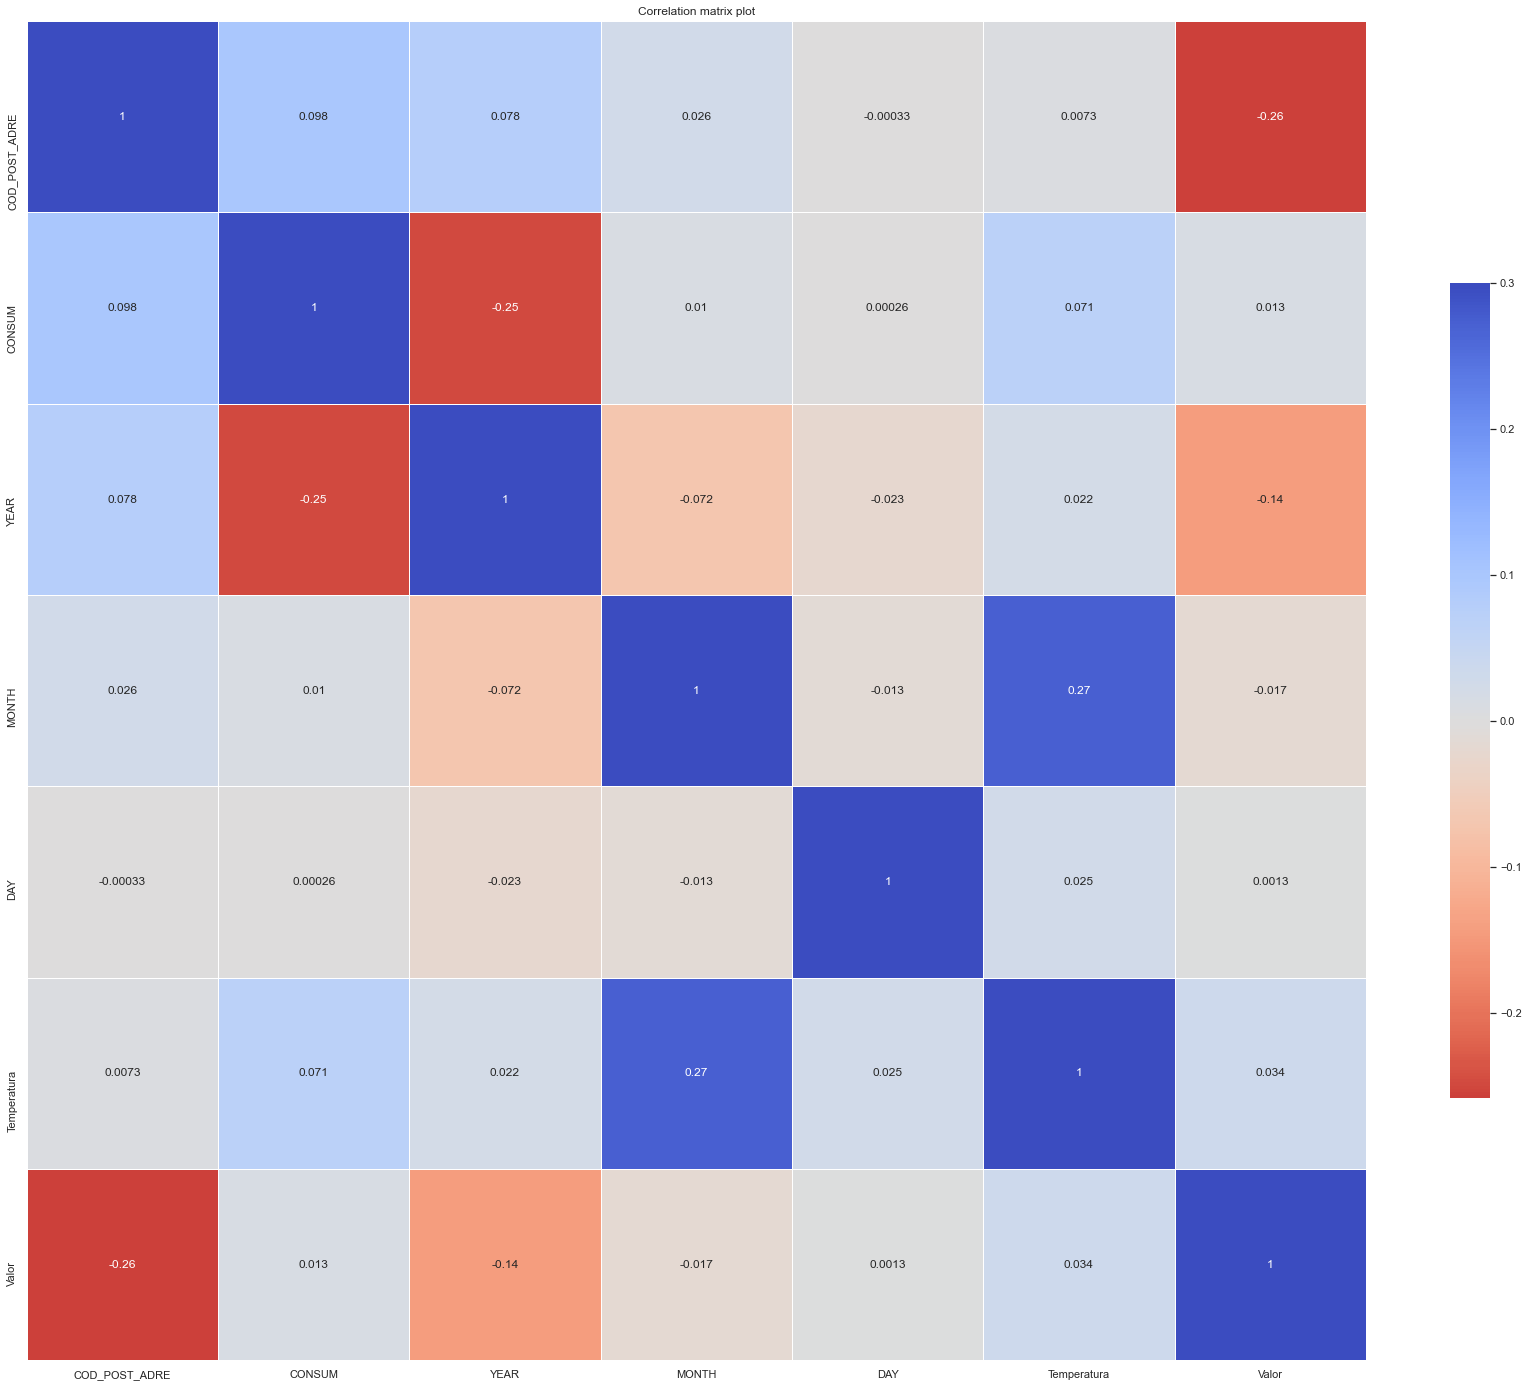

In [93]:
#Compute the correlation matrix
corr = data_postal_code_industrial.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

### HOW COVID AFFECT ON CONSUMPTION AND ELECTRICITY IN THE INDUSTRIAL ELECTRICITY SECTOR

[Text(0.5, 1.0, 'Electricity boxplot during covid')]

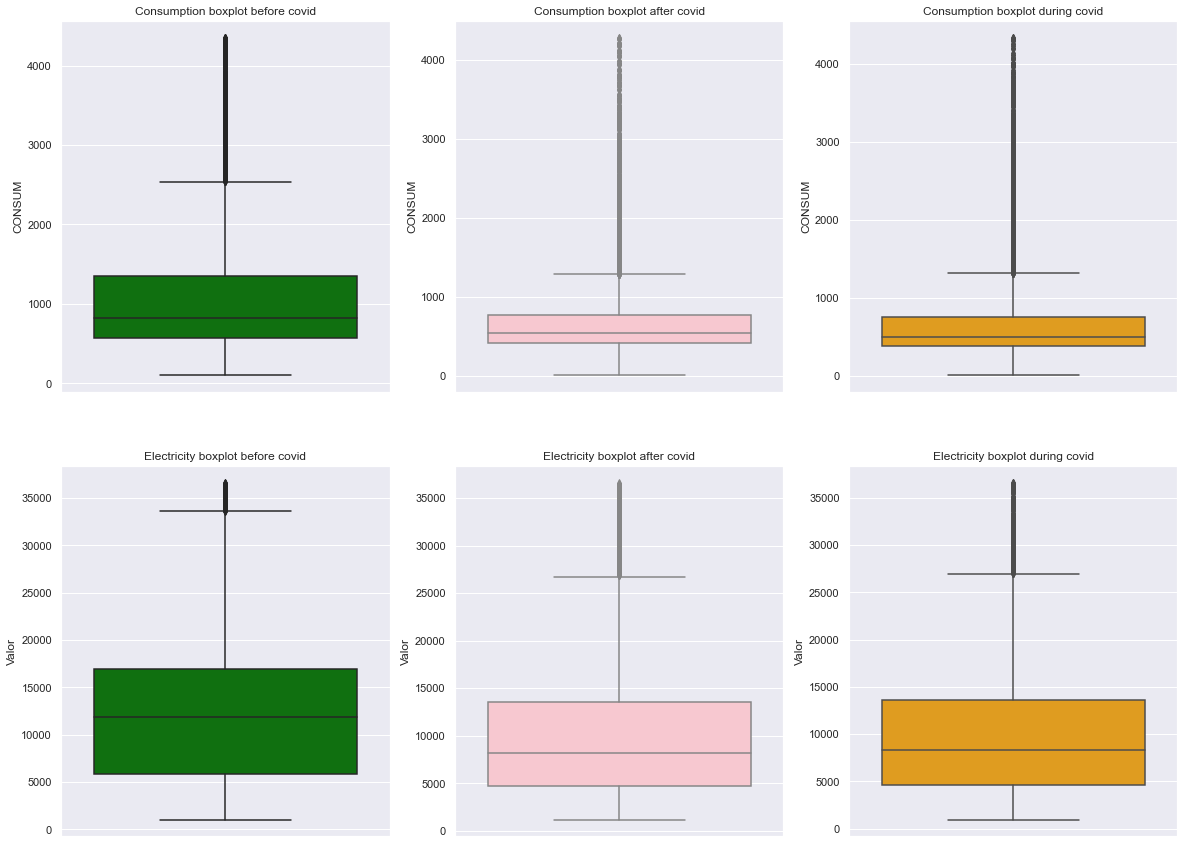

In [94]:
data_before = data_postal_code_industrial[data_postal_code_industrial['YEAR'] == 2019]
data_after =data_postal_code_industrial[data_postal_code_industrial['YEAR'] == 2021]
data_during =data_postal_code_industrial[data_postal_code_industrial['YEAR'] == 2020]

# Boxplots
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20,15))
sns.boxplot(y=data_before['CONSUM'], ax=axes[0][0], color = 'green').set(title="Consumption boxplot before covid")
sns.boxplot(y=data_after['CONSUM'], ax=axes[0][1], color = 'pink').set(title="Consumption boxplot after covid")
sns.boxplot(y=data_during['CONSUM'], ax=axes[0][2], color = 'orange').set(title="Consumption boxplot during covid")

sns.boxplot(y=data_before['Valor'], ax=axes[1][0], color = 'green').set(title="Electricity boxplot before covid")
sns.boxplot(y=data_after['Valor'], ax=axes[1][1], color = 'pink').set(title="Electricity boxplot after covid")
sns.boxplot(y=data_during['Valor'], ax=axes[1][2], color = 'orange').set(title="Electricity boxplot during covid")

Text(0.5, 1.0, 'Electricity before, after and during covid')

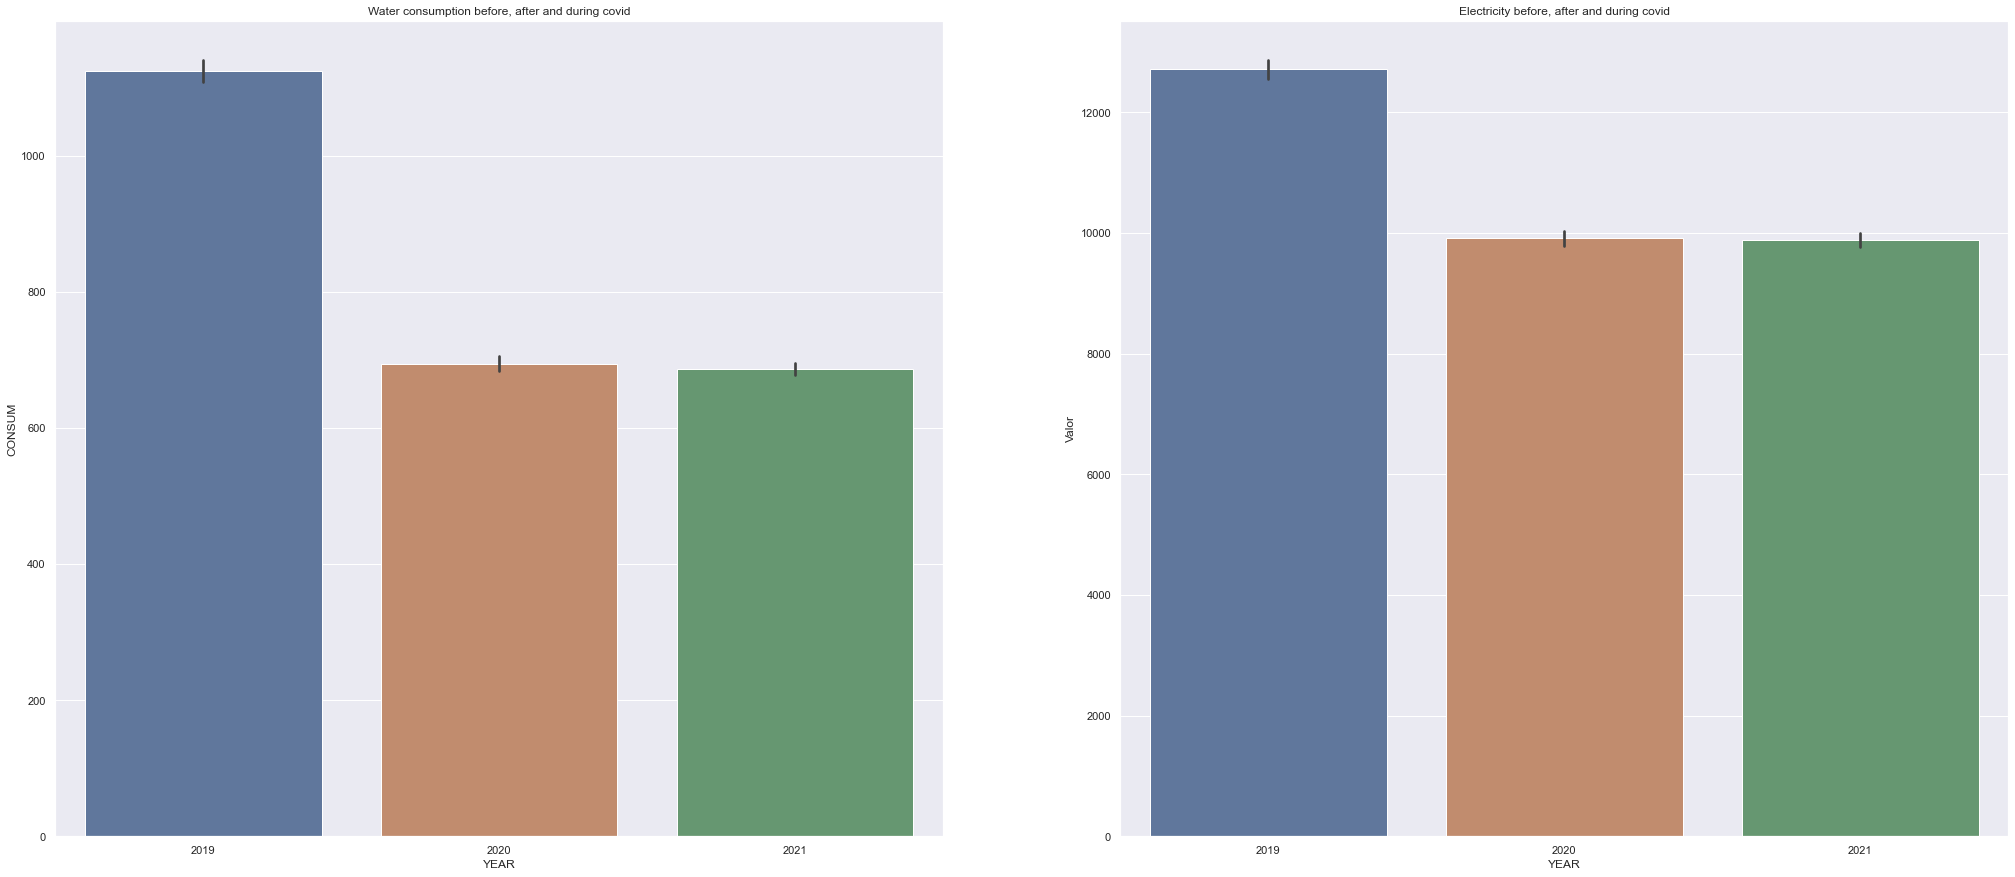

In [95]:
# Evolution water consumption and electricity
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(35,15))
sns.barplot(data= data_postal_code_industrial, x= "YEAR", y= "CONSUM", ax=axes[0], saturation=0.6).set_title('Water consumption before, after and during covid')
sns.barplot(data= data_postal_code_industrial, x= "YEAR", y= "Valor", ax=axes[1], saturation=0.6).set_title('Electricity before, after and during covid')

### HOW TEMPERATURE AFFECT ON CONSUMPTION AND ELECTRICITY IN THE INDUSTRIAL ELECTRICITY SECTOR

Text(0.5, 1.0, 'Electricity by temperature')

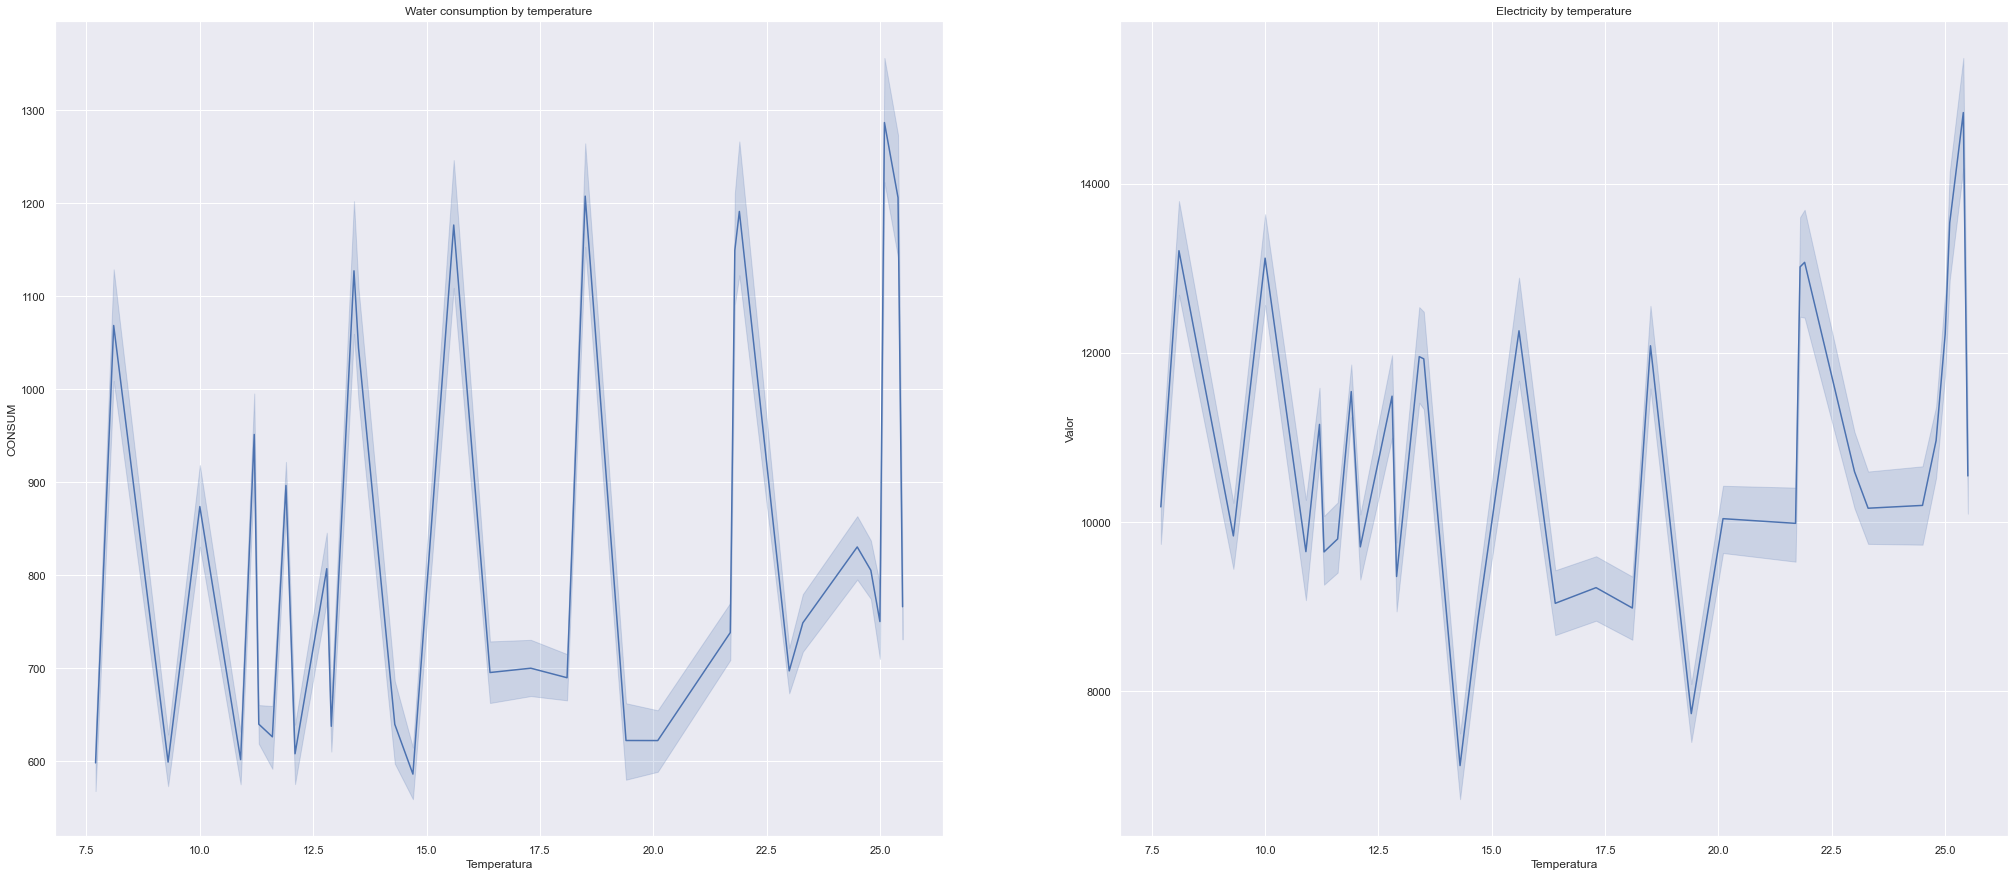

In [97]:
# temperature
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(35,15))
sns.lineplot(data= data_postal_code_industrial, x= "Temperatura", y= "CONSUM", ax=axes[0], markers=True, dashes=False).set_title('Water consumption by temperature')
sns.lineplot(data= data_postal_code_industrial, x= "Temperatura", y= "Valor", ax=axes[1], markers=True, dashes=False).set_title('Electricity by temperature')

Now we will focus on water consumption and electricity value by postal code in the electricity residencial sector

In [99]:
data_postal_code_residencial

DIA  COD_POST_ADRE  CONSUM  YEAR  MONTH  DAY Desc_Mes  \
0      2021-04-14           8036     597  2021      4   14    Abril   
1      2021-04-03           8004     408  2021      4    3    Abril   
2      2021-04-01           8027    1831  2021      4    1    Abril   
3      2021-04-05           8031    1046  2021      4    5    Abril   
4      2021-04-15           8014     440  2021      4   15    Abril   
...           ...            ...     ...   ...    ...  ...      ...   
45201  2019-03-13           8005    4257  2019      3   13     Març   
45202  2019-03-13           8018    1614  2019      3   13     Març   
45203  2019-03-24           8020     298  2019      3   24     Març   
45204  2019-03-13           8008     811  2019      3   13     Març   
45205  2019-03-24           8010     883  2019      3   24     Març   

       Temperatura Sector_Economic   Valor  
0             12.9     Residencial   93768  
1             12.9     Residencial  113620  
2             12.9     Residencial  173196  
3             12.9     Residencial  112638  
4             12.9     Residencial  198209  
...            ...             ...     ...  
45201         13.5     Residencial  213290  
45202         13.5     Residencial  199105  
45203         13.5     Residencial  138470  
45204         13.5     Residencial   52578  
45205         13.5     Residencial   41414  

[35271 rows x 10 columns]

In [100]:
# mean
print('Mean consumption: ', mean(data_postal_code_residencial['CONSUM']))
# variance
print('Variance consumption: ', variance(data_postal_code_residencial['CONSUM']))
# median
print('Median consumption: ', median(data_postal_code_residencial['CONSUM']))
# quartiles
print('Quantiles consumption: ', quantiles(data_postal_code_residencial['CONSUM']))

Mean consumption:  816.0307618156559
Variance consumption:  438671.816887537
Median consumption:  589
Quantiles consumption:  [437.0, 589.0, 916.0]


In [101]:
# mean
print('Mean consumption: ', mean(data_postal_code_residencial['Valor']))
# variance
print('Variance consumption: ', variance(data_postal_code_residencial['Valor']))
# median
print('Median consumption: ', median(data_postal_code_residencial['Valor']))
# quartiles
print('Quantiles consumption: ', quantiles(data_postal_code_residencial['Valor']))

Mean consumption:  150640.47214425448
Variance consumption:  3430668431.76973
Median consumption:  148678
Quantiles consumption:  [111614.0, 148678.0, 187407.0]


In [102]:
# correlation
print('Correlation between consumption and electricity ', data_postal_code_residencial['CONSUM'].corr(data_postal_code_residencial['Valor']))

Correlation between consumption and electricity  0.011623332871044638


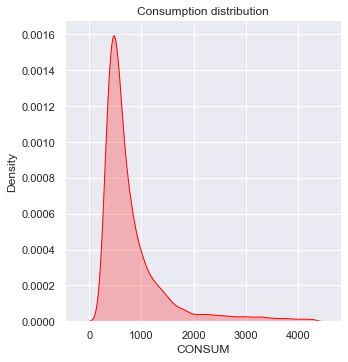

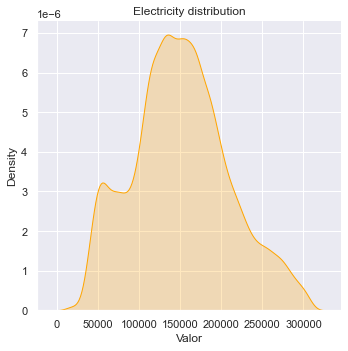

In [103]:
#Plot Consumption and Electricity distribution
sns.displot(data_postal_code_residencial['CONSUM'], kind="kde", color= 'red', fill=True).set(title='Consumption distribution')
sns.displot(data_postal_code_residencial['Valor'], kind="kde", color= 'orange', fill=True).set(title='Electricity distribution')

[Text(0.5, 1.0, 'Electricity boxplot')]

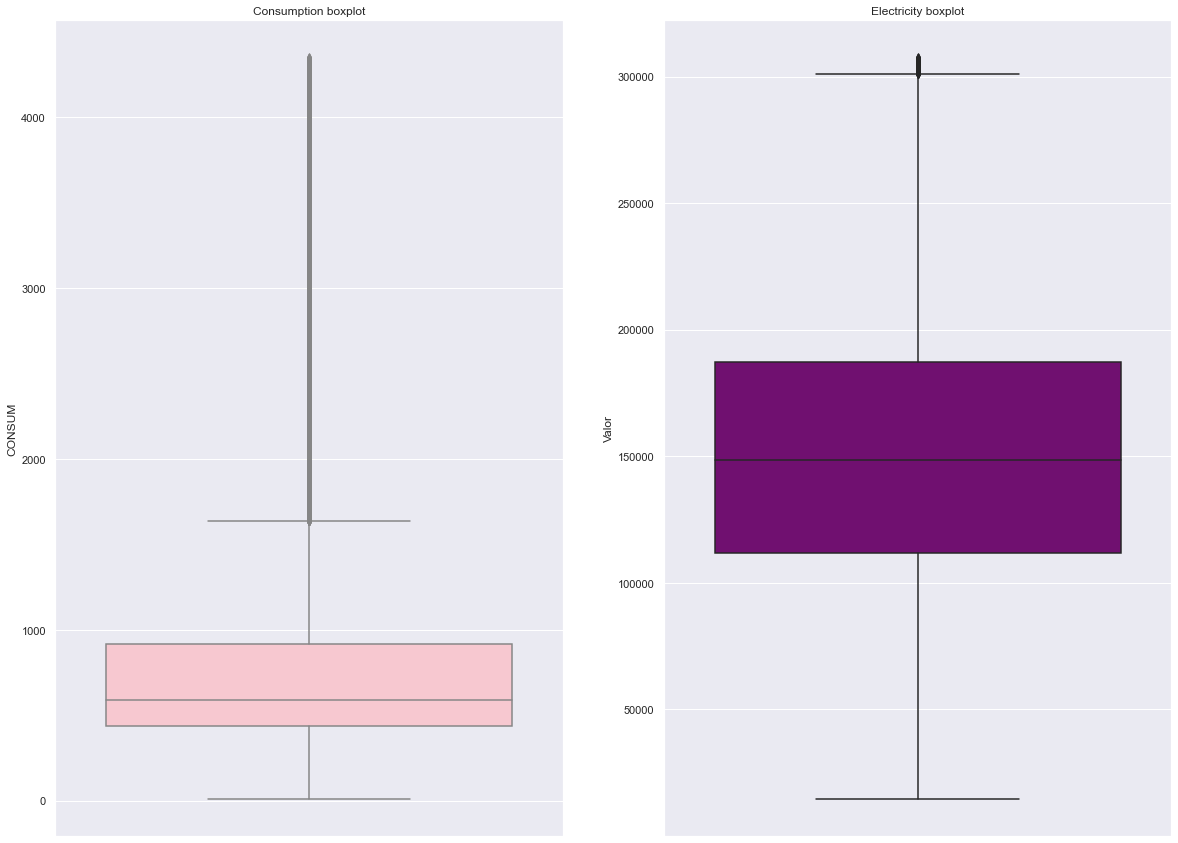

In [104]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,15))
sns.boxplot(y=data_postal_code_residencial['CONSUM'], ax=axes[0], color = 'pink').set(title="Consumption boxplot")
sns.boxplot(y=data_postal_code_residencial['Valor'], ax=axes[1], color = 'purple').set(title="Electricity boxplot")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

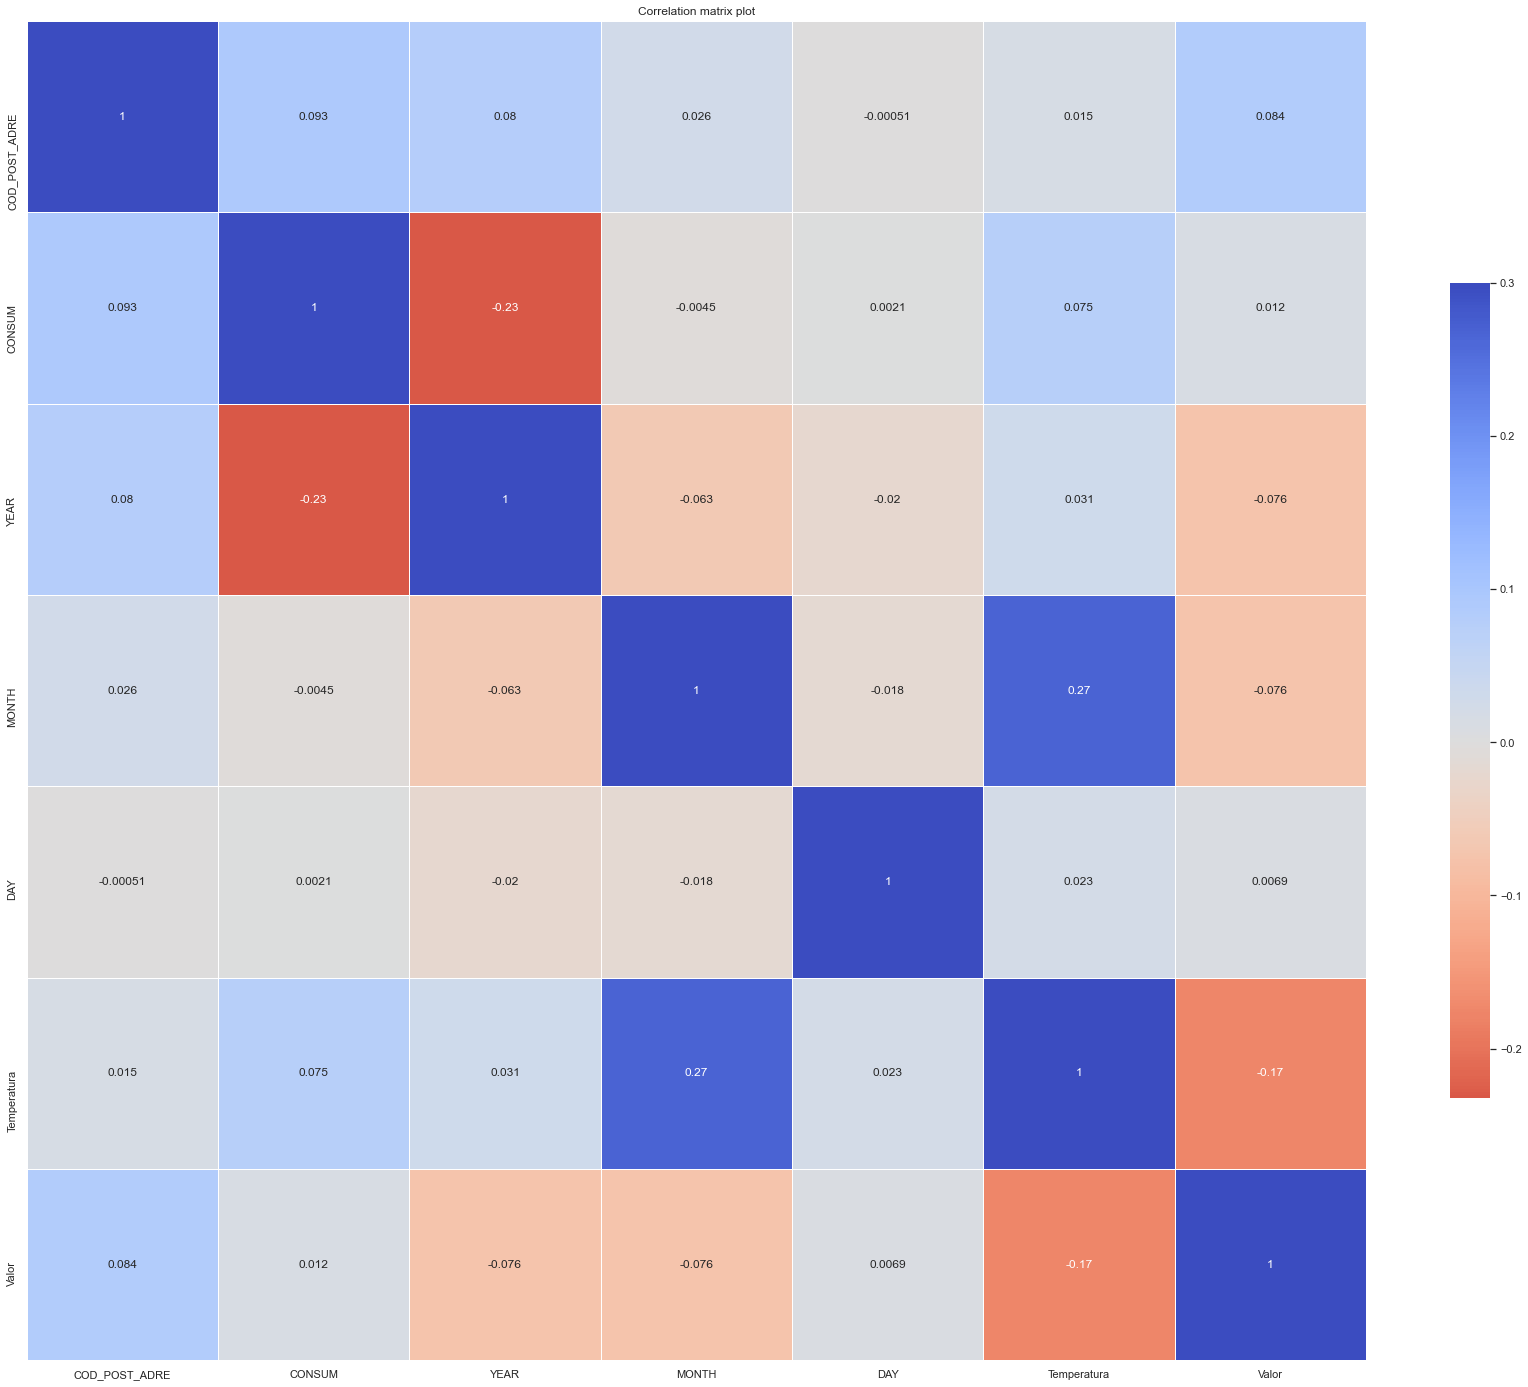

In [105]:
#Compute the correlation matrix
corr = data_postal_code_residencial.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

### HOW COVID AFFECT ON CONSUMPTION AND ELECTRICITY IN THE RESIDENCIAL ELECTRICITY SECTOR

[Text(0.5, 1.0, 'Electricity boxplot during covid')]

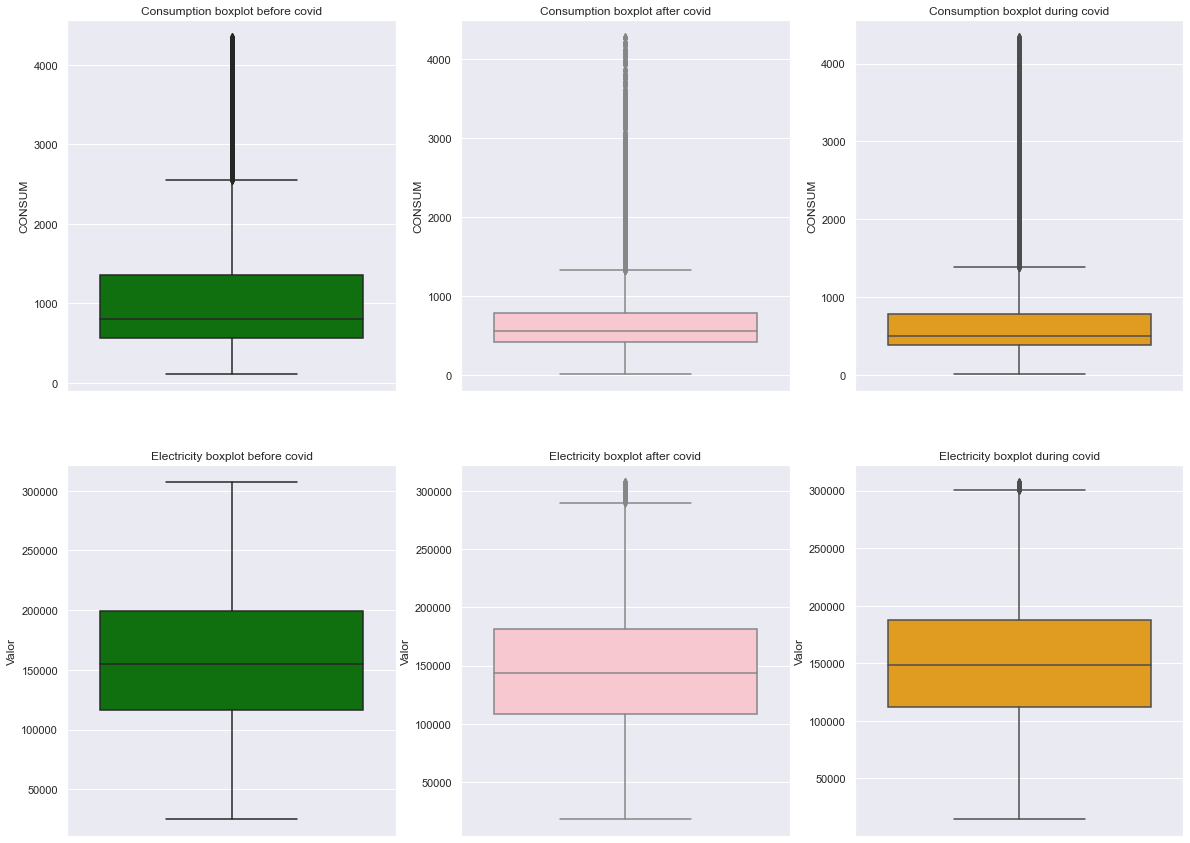

In [106]:
data_before = data_postal_code_residencial[data_postal_code_residencial['YEAR'] == 2019]
data_after =data_postal_code_residencial[data_postal_code_residencial['YEAR'] == 2021]
data_during =data_postal_code_residencial[data_postal_code_residencial['YEAR'] == 2020]

# Boxplots
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20,15))
sns.boxplot(y=data_before['CONSUM'], ax=axes[0][0], color = 'green').set(title="Consumption boxplot before covid")
sns.boxplot(y=data_after['CONSUM'], ax=axes[0][1], color = 'pink').set(title="Consumption boxplot after covid")
sns.boxplot(y=data_during['CONSUM'], ax=axes[0][2], color = 'orange').set(title="Consumption boxplot during covid")

sns.boxplot(y=data_before['Valor'], ax=axes[1][0], color = 'green').set(title="Electricity boxplot before covid")
sns.boxplot(y=data_after['Valor'], ax=axes[1][1], color = 'pink').set(title="Electricity boxplot after covid")
sns.boxplot(y=data_during['Valor'], ax=axes[1][2], color = 'orange').set(title="Electricity boxplot during covid")

Text(0.5, 1.0, 'Electricity before, after and during covid')

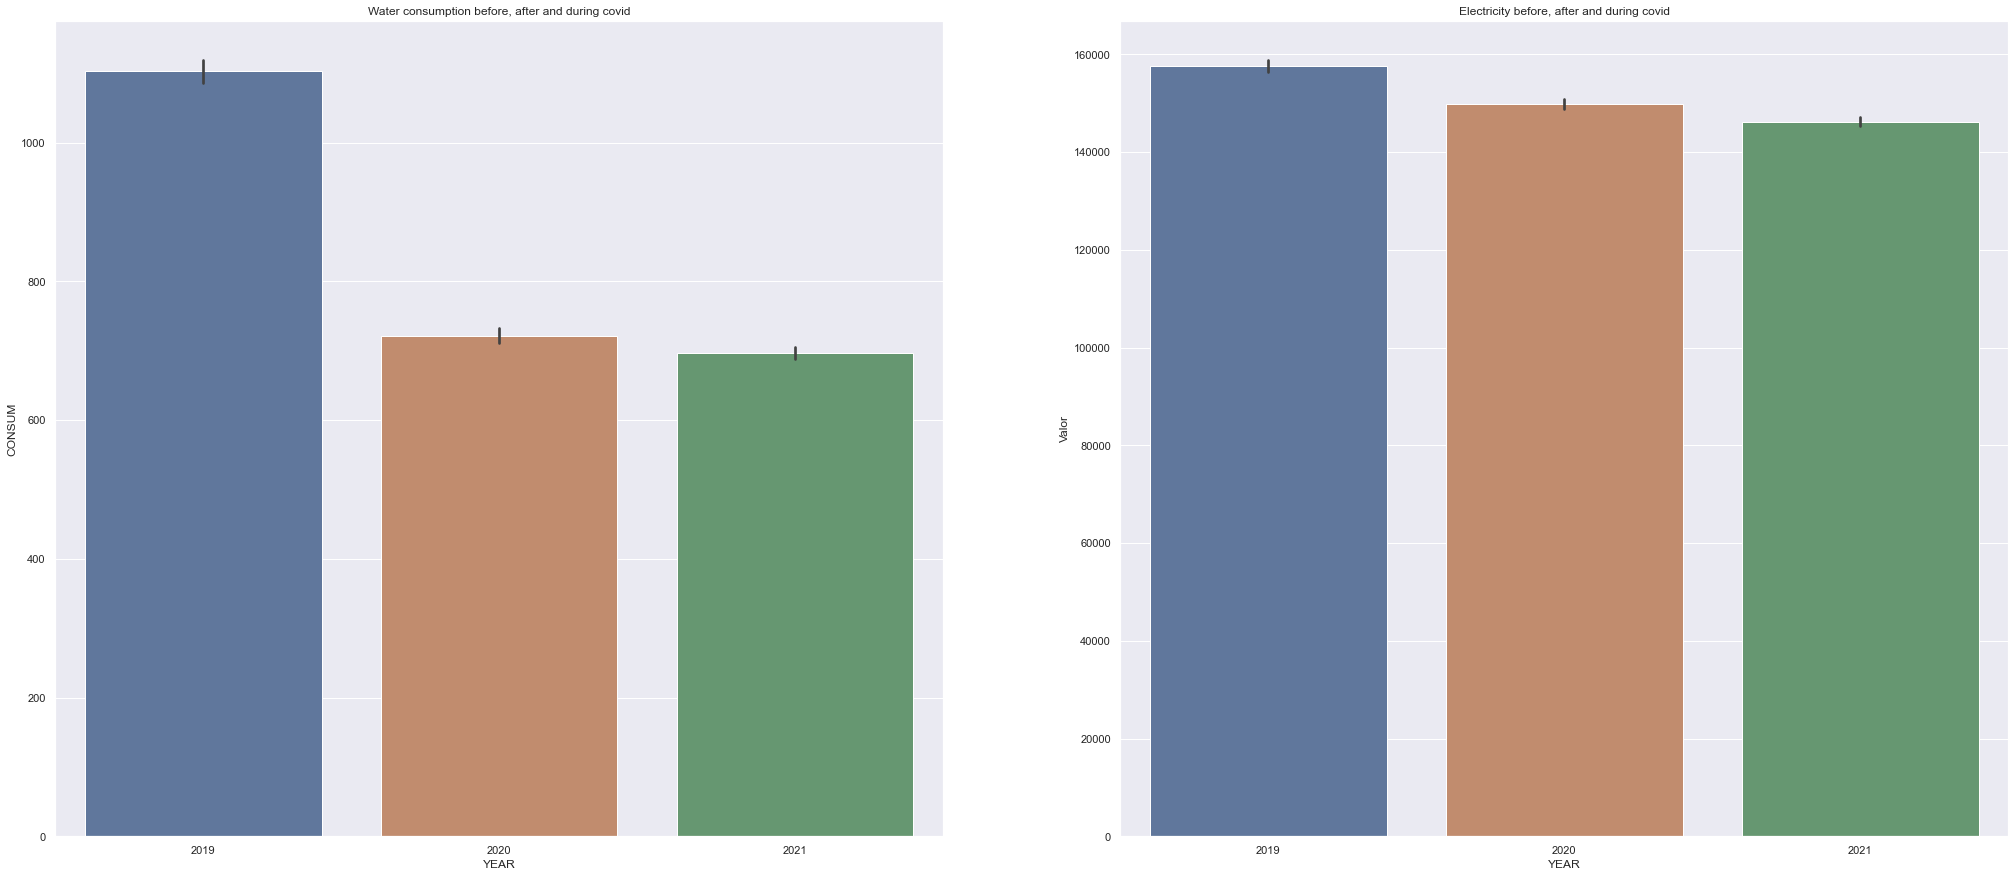

In [107]:
# Evolution water consumption and electricity
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(35,15))
sns.barplot(data= data_postal_code_residencial, x= "YEAR", y= "CONSUM", ax=axes[0], saturation=0.6).set_title('Water consumption before, after and during covid')
sns.barplot(data= data_postal_code_residencial, x= "YEAR", y= "Valor", ax=axes[1], saturation=0.6).set_title('Electricity before, after and during covid')

### HOW TEMPERATURE AFFECT ON CONSUMPTION AND ELECTRICITY IN THE RESIDENCIAL ELECTRICITY SECTOR

Text(0.5, 1.0, 'Electricity by temperature')

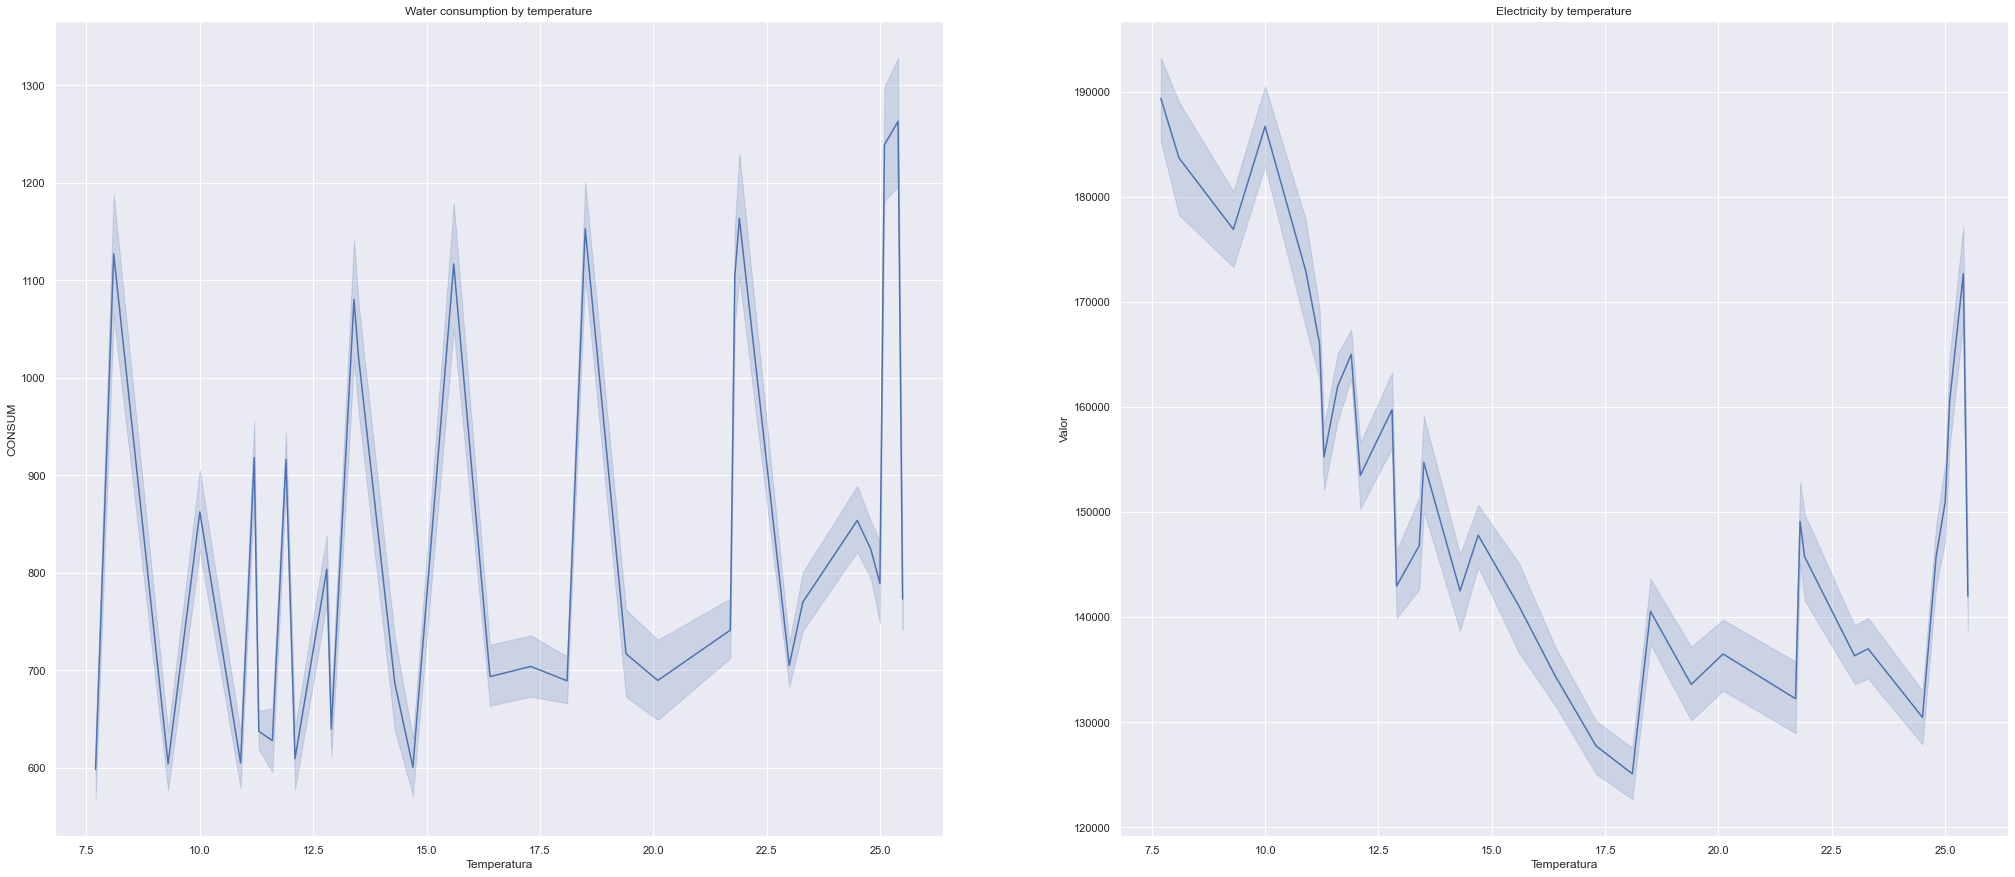

In [109]:
# temperature
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(35,15))
sns.lineplot(data= data_postal_code_residencial, x= "Temperatura", y= "CONSUM", ax=axes[0]).set_title('Water consumption by temperature')
sns.lineplot(data= data_postal_code_residencial, x= "Temperatura", y= "Valor", ax=axes[1]).set_title('Electricity by temperature')

Now we will focus on water consumption and electricity value by postal code in the electricity service sector

In [110]:
data_postal_code_serveis

DIA  COD_POST_ADRE  CONSUM  YEAR  MONTH  DAY Desc_Mes  \
0      2021-04-14           8036     597  2021      4   14    Abril   
1      2021-04-03           8004     408  2021      4    3    Abril   
2      2021-04-01           8027    1831  2021      4    1    Abril   
3      2021-04-05           8031    1046  2021      4    5    Abril   
4      2021-04-15           8014     440  2021      4   15    Abril   
...           ...            ...     ...   ...    ...  ...      ...   
45201  2019-03-13           8005    4257  2019      3   13     Març   
45202  2019-03-13           8018    1614  2019      3   13     Març   
45203  2019-03-24           8020     298  2019      3   24     Març   
45204  2019-03-13           8008     811  2019      3   13     Març   
45205  2019-03-24           8010     883  2019      3   24     Març   

       Temperatura Sector_Economic   Valor  
0             12.9         Serveis  211917  
1             12.9         Serveis  122288  
2             12.9         Serveis  171707  
3             12.9         Serveis   50108  
4             12.9         Serveis  287422  
...            ...             ...     ...  
45201         13.5         Serveis  394243  
45202         13.5         Serveis  370508  
45203         13.5         Serveis  229921  
45204         13.5         Serveis  138830  
45205         13.5         Serveis   83152  

[35377 rows x 10 columns]

In [111]:
# mean
print('Mean consumption: ', mean(data_postal_code_serveis['CONSUM']))
# variance
print('Variance consumption: ', variance(data_postal_code_serveis['CONSUM']))
# median
print('Median consumption: ', median(data_postal_code_serveis['CONSUM']))
# quartiles
print('Quantiles consumption: ', quantiles(data_postal_code_serveis['CONSUM']))

Mean consumption:  809.8516832970574
Variance consumption:  438093.8031089513
Median consumption:  581
Quantiles consumption:  [435.0, 581.0, 901.5]


In [112]:
# mean
print('Mean consumption: ', mean(data_postal_code_serveis['Valor']))
# variance
print('Variance consumption: ', variance(data_postal_code_serveis['Valor']))
# median
print('Median consumption: ', median(data_postal_code_serveis['Valor']))
# quartiles
print('Quantiles consumption: ', quantiles(data_postal_code_serveis['Valor']))

Mean consumption:  220098.27599853012
Variance consumption:  13321295143.605755
Median consumption:  205010
Quantiles consumption:  [125248.5, 205010.0, 294459.5]


In [113]:
# correlation
print('Correlation between consumption and electricity ', data_postal_code_serveis['CONSUM'].corr(data_postal_code_serveis['Valor']))

Correlation between consumption and electricity  0.14122909742124412


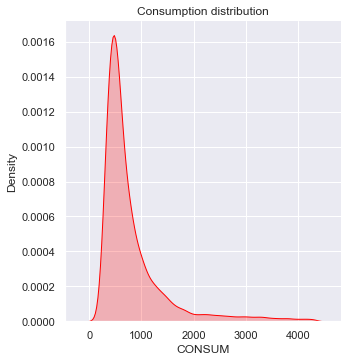

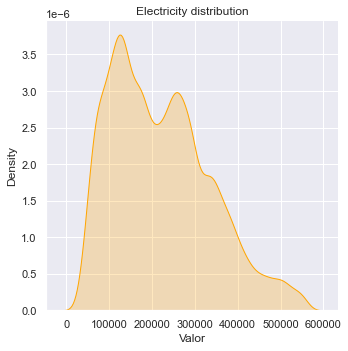

In [114]:
#Plot Consumption and Electricity distribution
sns.displot(data_postal_code_serveis['CONSUM'], kind="kde", color= 'red', fill=True).set(title='Consumption distribution')
sns.displot(data_postal_code_serveis['Valor'], kind="kde", color= 'orange', fill=True).set(title='Electricity distribution')

[Text(0.5, 1.0, 'Electricity boxplot')]

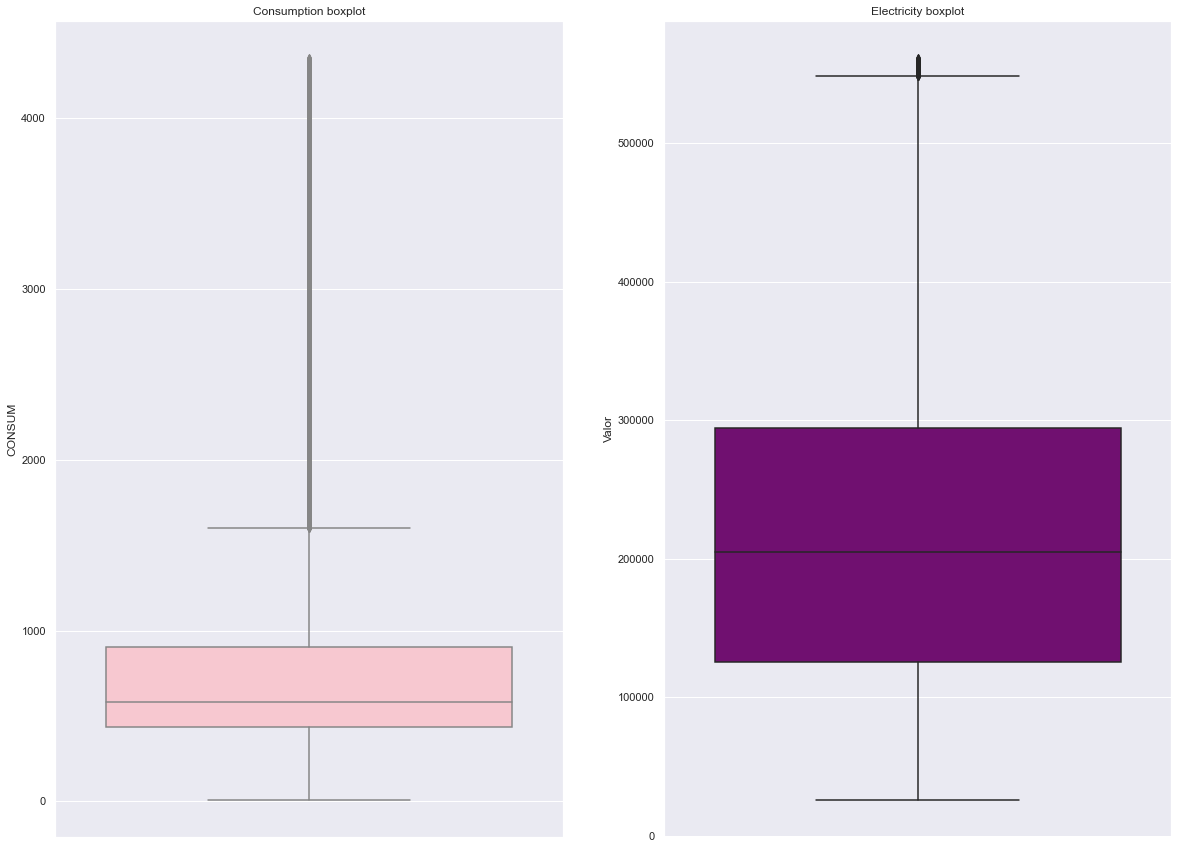

In [115]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,15))
sns.boxplot(y=data_postal_code_serveis['CONSUM'], ax=axes[0], color = 'pink').set(title="Consumption boxplot")
sns.boxplot(y=data_postal_code_serveis['Valor'], ax=axes[1], color = 'purple').set(title="Electricity boxplot")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

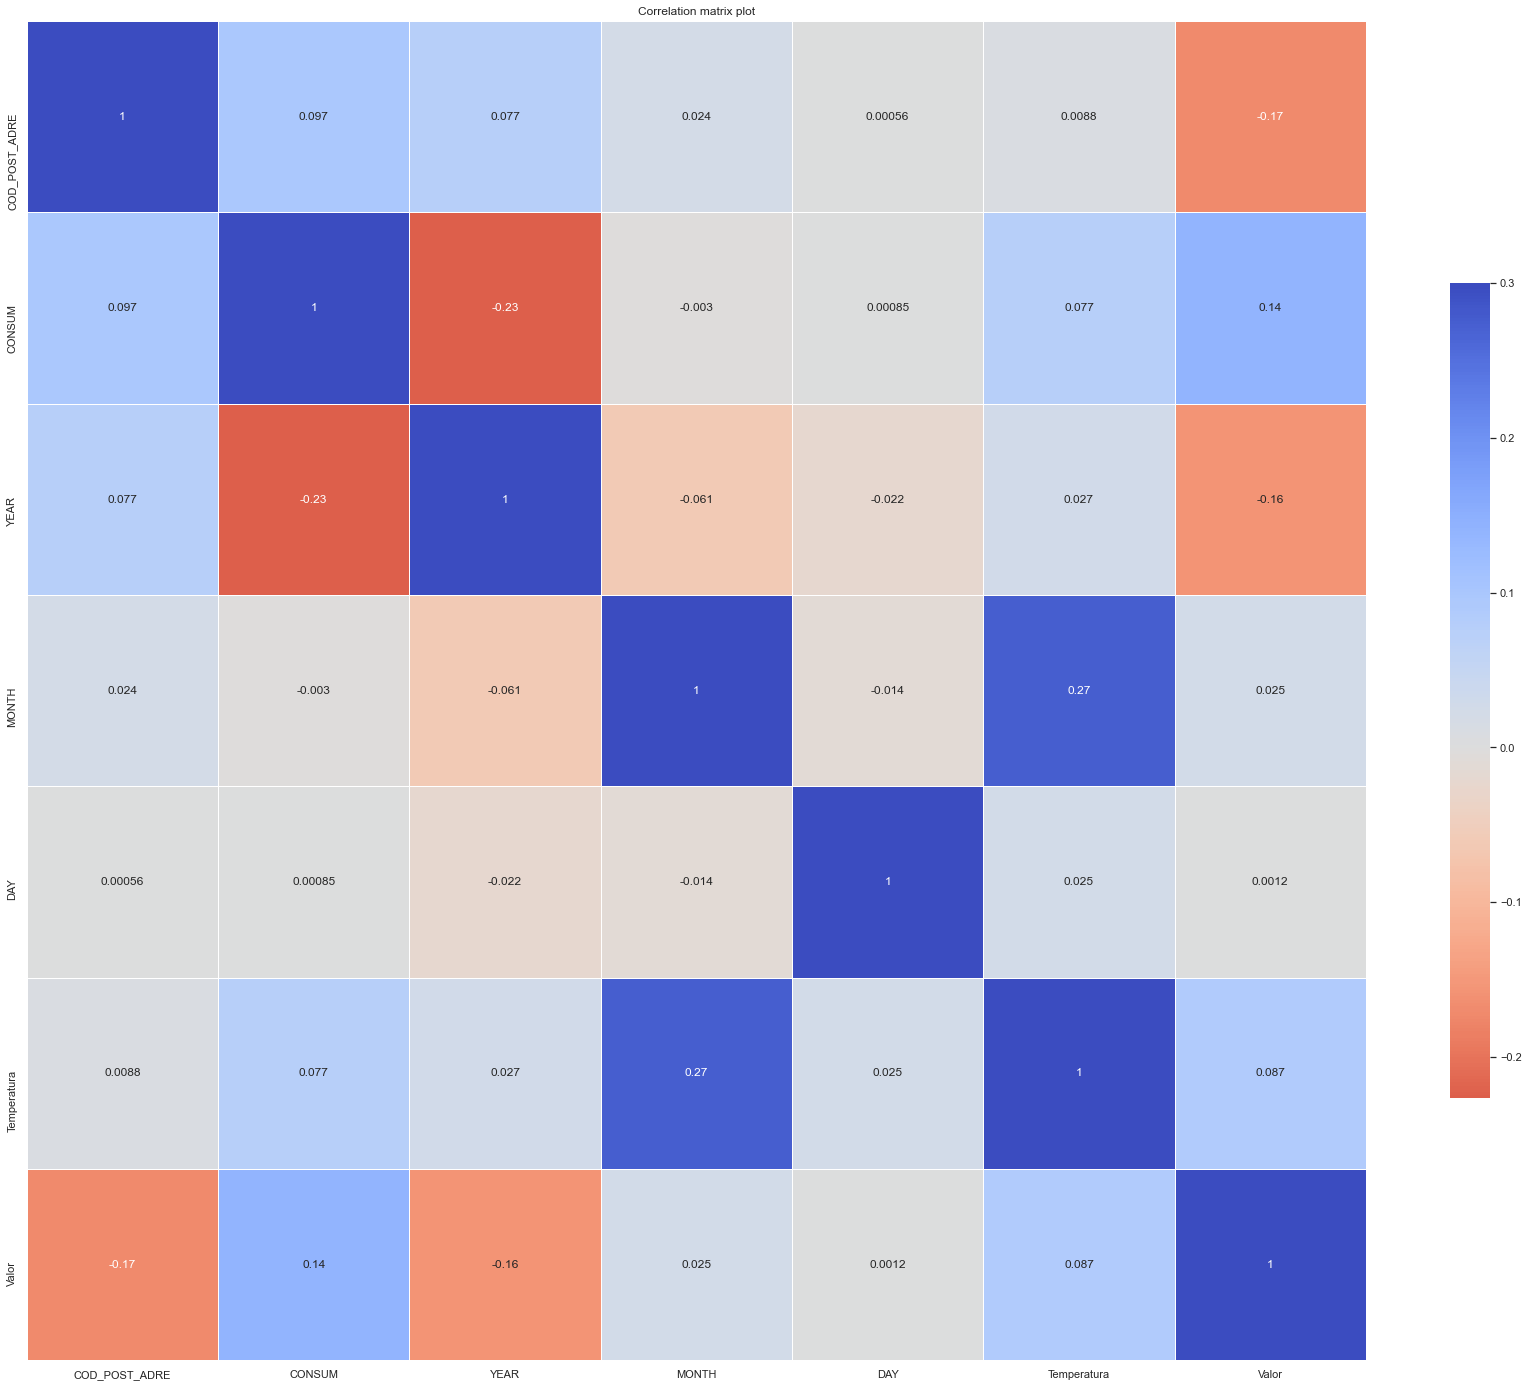

In [116]:
#Compute the correlation matrix
corr = data_postal_code_serveis.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

### HOW COVID AFFECT ON CONSUMPTION AND ELECTRICITY IN THE SERVICE ELECTRICITY SECTOR

[Text(0.5, 1.0, 'Electricity boxplot during covid')]

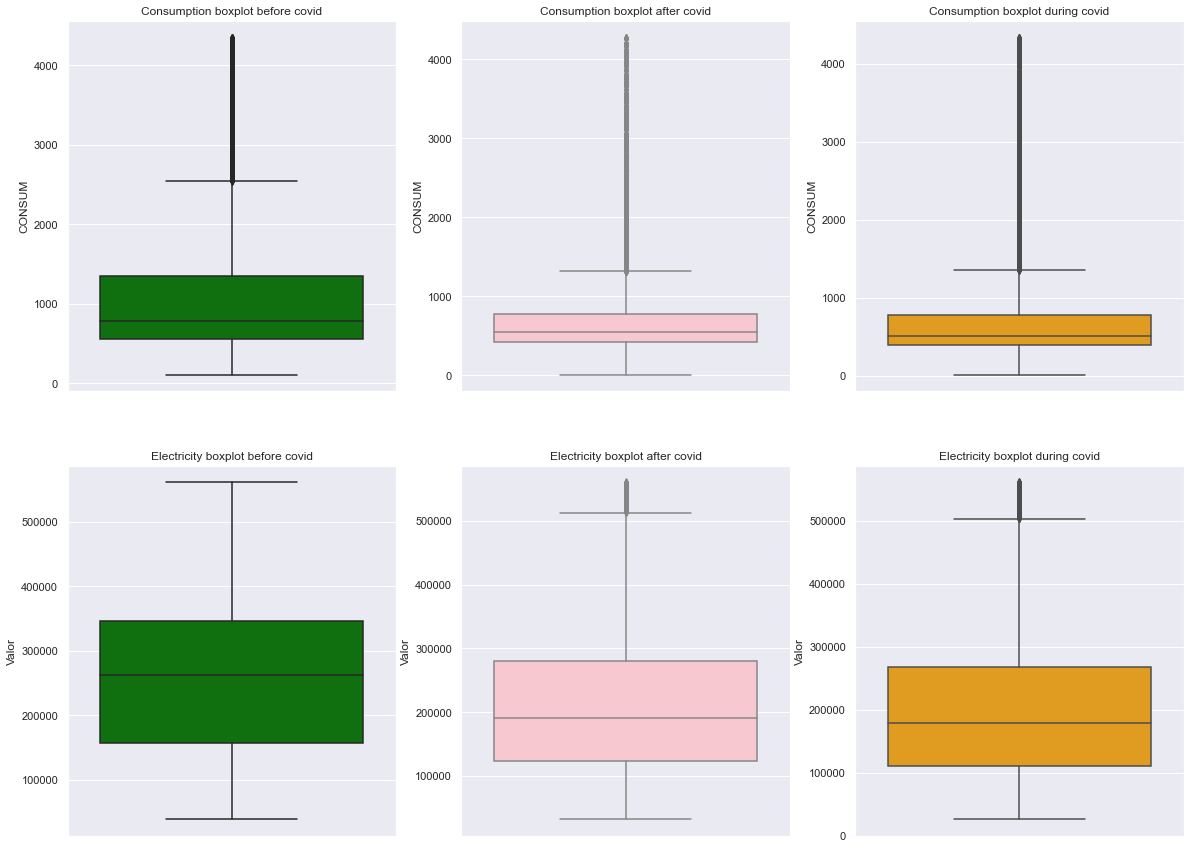

In [117]:
data_before = data_postal_code_serveis[data_postal_code_serveis['YEAR'] == 2019]
data_after =data_postal_code_serveis[data_postal_code_serveis['YEAR'] == 2021]
data_during =data_postal_code_serveis[data_postal_code_serveis['YEAR'] == 2020]

# Boxplots
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20,15))
sns.boxplot(y=data_before['CONSUM'], ax=axes[0][0], color = 'green').set(title="Consumption boxplot before covid")
sns.boxplot(y=data_after['CONSUM'], ax=axes[0][1], color = 'pink').set(title="Consumption boxplot after covid")
sns.boxplot(y=data_during['CONSUM'], ax=axes[0][2], color = 'orange').set(title="Consumption boxplot during covid")

sns.boxplot(y=data_before['Valor'], ax=axes[1][0], color = 'green').set(title="Electricity boxplot before covid")
sns.boxplot(y=data_after['Valor'], ax=axes[1][1], color = 'pink').set(title="Electricity boxplot after covid")
sns.boxplot(y=data_during['Valor'], ax=axes[1][2], color = 'orange').set(title="Electricity boxplot during covid")

Text(0.5, 1.0, 'Electricity before, after and during covid')

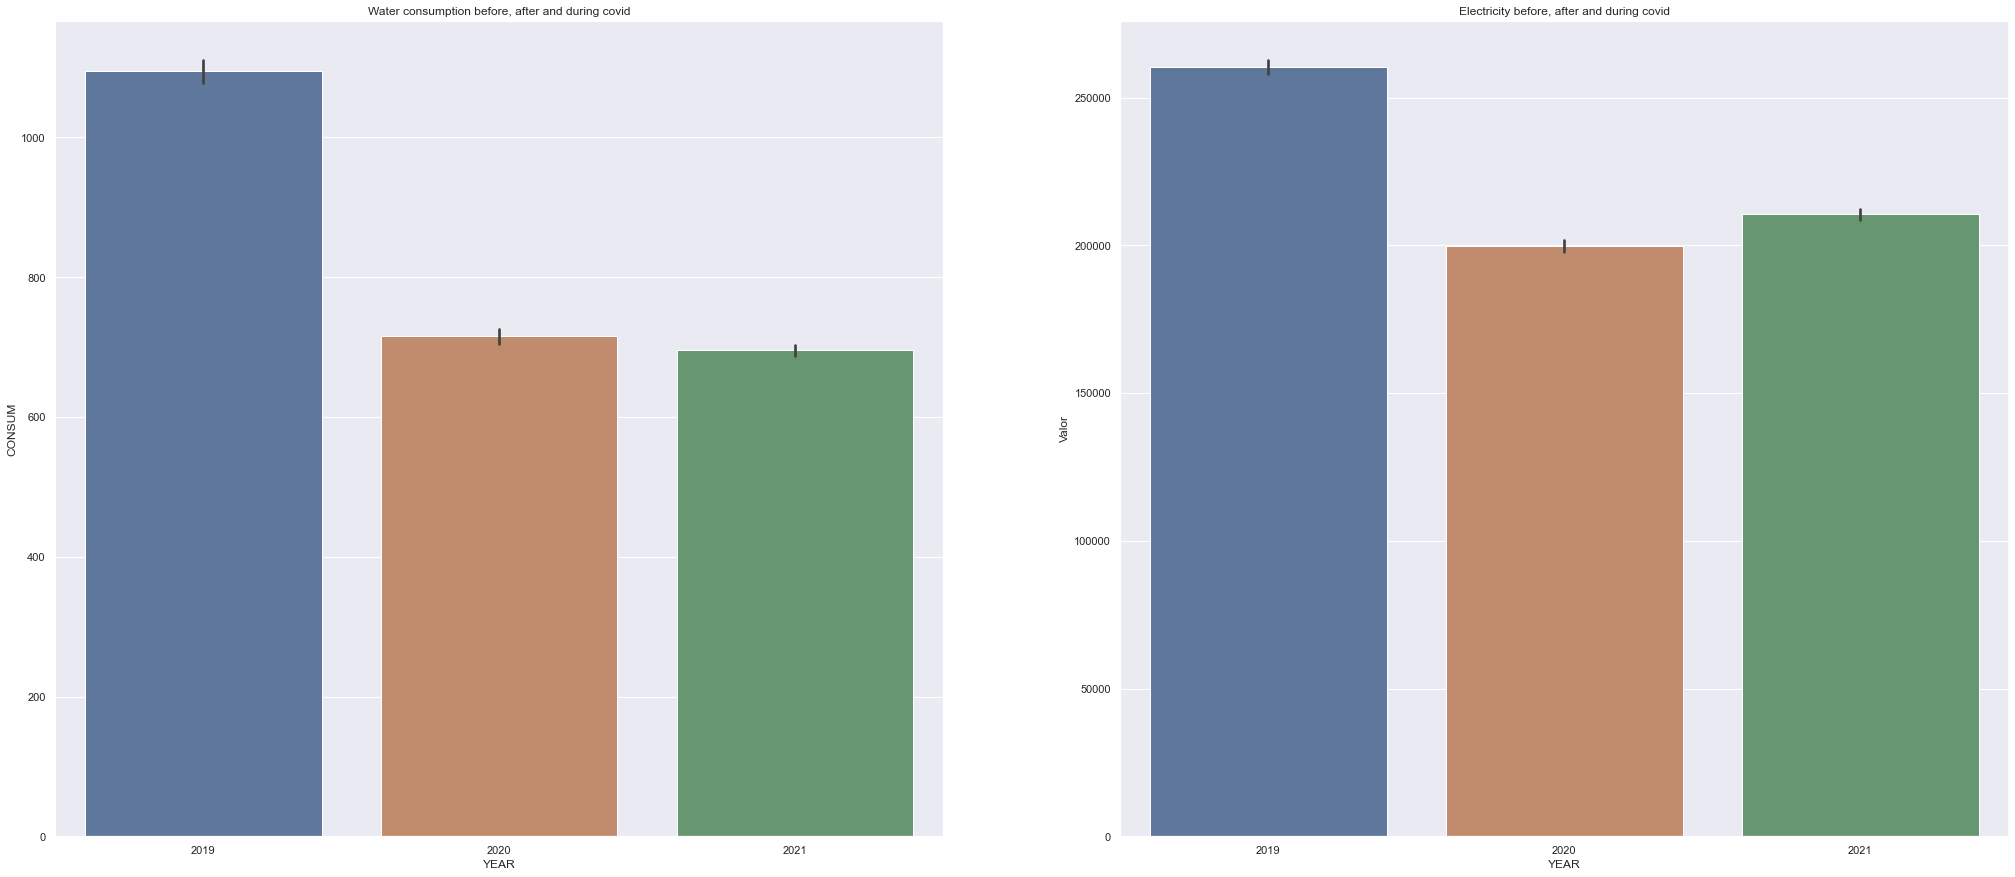

In [118]:
# Evolution water consumption and electricity
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(35,15))
sns.barplot(data= data_postal_code_serveis, x= "YEAR", y= "CONSUM", ax=axes[0], saturation=0.6).set_title('Water consumption before, after and during covid')
sns.barplot(data= data_postal_code_serveis, x= "YEAR", y= "Valor", ax=axes[1], saturation=0.6).set_title('Electricity before, after and during covid')

### HOW TEMPERATURE AFFECT ON CONSUMPTION AND ELECTRICITY IN THE SERVICE ELECTRICITY SECTOR

Text(0.5, 1.0, 'Electricity by temperature')

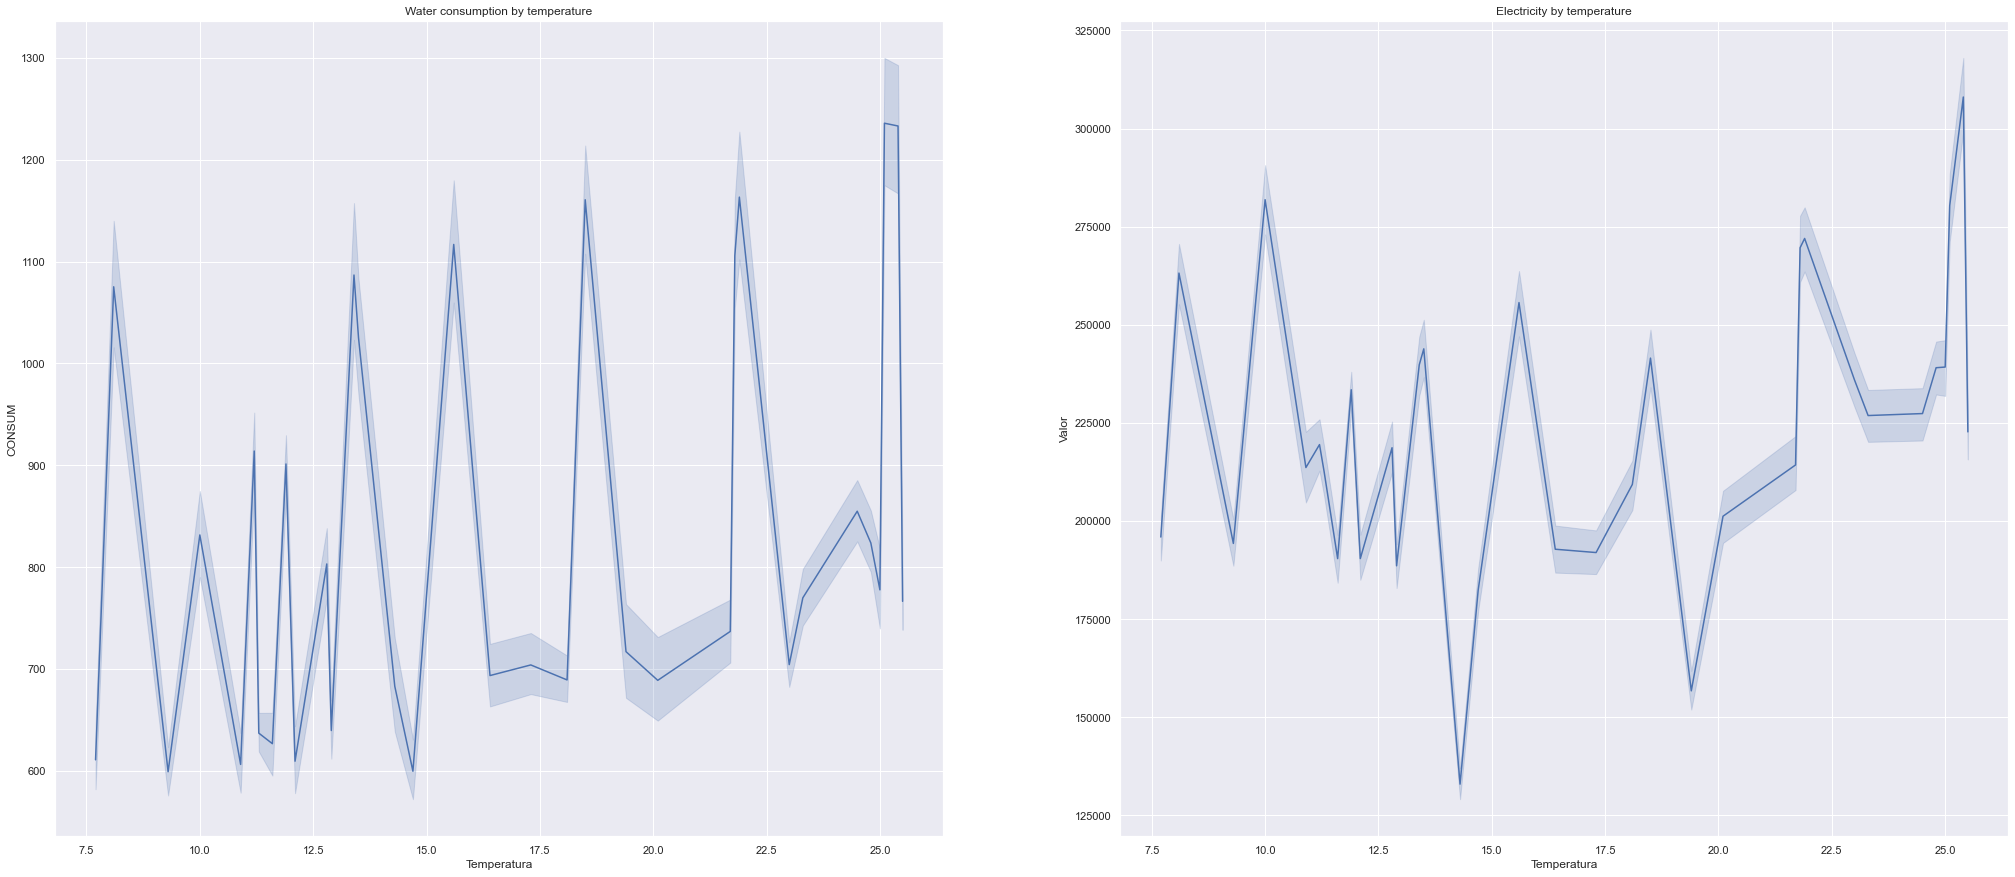

In [120]:
# temperature
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(35,15))
sns.lineplot(data= data_postal_code_serveis, x= "Temperatura", y= "CONSUM", ax=axes[0]).set_title('Water consumption by temperature')
sns.lineplot(data= data_postal_code_serveis, x= "Temperatura", y= "Valor", ax=axes[1]).set_title('Electricity by temperature')

## BLOCK 5: POPULATION AND CONSUMPTION DISTRICT ZONE DATASETS

In [121]:
# OPEN DATA
data_district_population = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block5/data_population_district.csv", sep=",")
data_rent = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block5/data_rent_disctrict.csv", sep=",")
data_gini = pd.read_csv("C:/Users/mirei/OneDrive/Escritorio/TFG/datasets/clean_datasets/block5/data_gini_district.csv", sep=",")

In [122]:
# remove outliers
data_district_population = remove_outlier(data_district_population, 'CONSUM')
data_rent = remove_outlier(data_rent, 'CONSUM')
data_gini = remove_outlier(data_gini, 'CONSUM')

First we will be focus on the data about population and water consumption by district zone

In [123]:
data_district_population

DIA    DISTRICTE  CONSUM  YEAR  MONTH  DAY  Nombre  \
0     2019-01-01  SANT ANDREU    1890  2019      1    1  150264   
1     2019-01-02  SANT ANDREU    1835  2019      1    2  150264   
2     2019-01-03  SANT ANDREU    1812  2019      1    3  150264   
3     2019-01-04  SANT ANDREU    1813  2019      1    4  150264   
4     2019-01-05  SANT ANDREU    1704  2019      1    5  150264   
...          ...          ...     ...   ...    ...  ...     ...   
8491  2021-12-10  SANT ANDREU     796  2021     12   10  205410   
8492  2021-12-11  SANT ANDREU     763  2021     12   11  205410   
8493  2021-12-12  SANT ANDREU     727  2021     12   12  205410   
8494  2021-12-13  SANT ANDREU     779  2021     12   13  205410   
8495  2021-12-14  SANT ANDREU     798  2021     12   14  205410   

      CONSUMPTION_PER_POPULATION  
0                       0.012578  
1                       0.012212  
2                       0.012059  
3                       0.012065  
4                       0.011340  
...                          ...  
8491                    0.003875  
8492                    0.003715  
8493                    0.003539  
8494                    0.003792  
8495                    0.003885  

[8304 rows x 8 columns]

### POPULATION AND CONSUMPTION FEATURES

In [124]:
# mean
print('Mean consumption: ', mean(data_district_population['CONSUM']))
# variance
print('Variance consumption: ', variance(data_district_population['CONSUM']))
# median
print('Median consumption: ', median(data_district_population['CONSUM']))
# quartiles
print('Quantiles consumption: ', quantiles(data_district_population['CONSUM']))

Mean consumption:  1243.5915221579962
Variance consumption:  212265.3429414862
Median consumption:  1121.0
Quantiles consumption:  [865.0, 1121.0, 1673.0]


In [218]:
# mean
print('Mean population: ', mean(data_district_population['Nombre']))
# variance
print('Variance population: ', variance(data_district_population['Nombre']))
# median
print('Median population: ', median(data_district_population['Nombre']))
# quartiles
print('Quantiles population: ', quantiles(data_district_population['Nombre']))

Mean population:  167572.9359344894
Variance population:  3781621711.084899
Median population:  161633.0
Quantiles population:  [111961.5, 161633.0, 203477.75]


In [126]:
# correlation
print('Correlation between consumption and population ', data_district_population['CONSUM'].corr(data_district_population['Nombre']))

Correlation between consumption and population  -0.01320740425042866


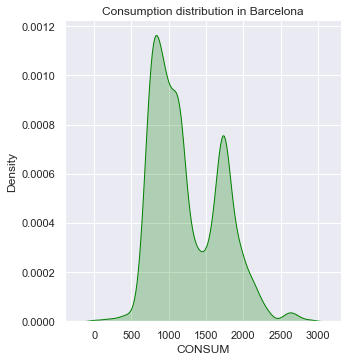

In [127]:
# Plot consumption distribution
sns.displot(data_district_population['CONSUM'],kind="kde", fill=True, color= 'green').set(title='Consumption distribution in Barcelona')

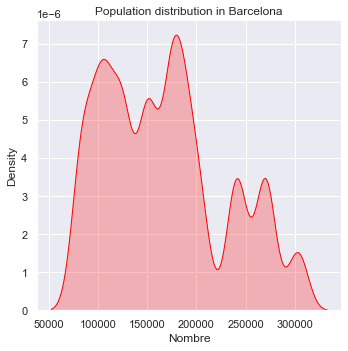

In [128]:
# Plot population distribution
sns.displot(data_district_population['Nombre'],kind="kde", fill=True, color= 'red').set(title='Population distribution in Barcelona')

[Text(0.5, 1.0, 'Population boxplot')]

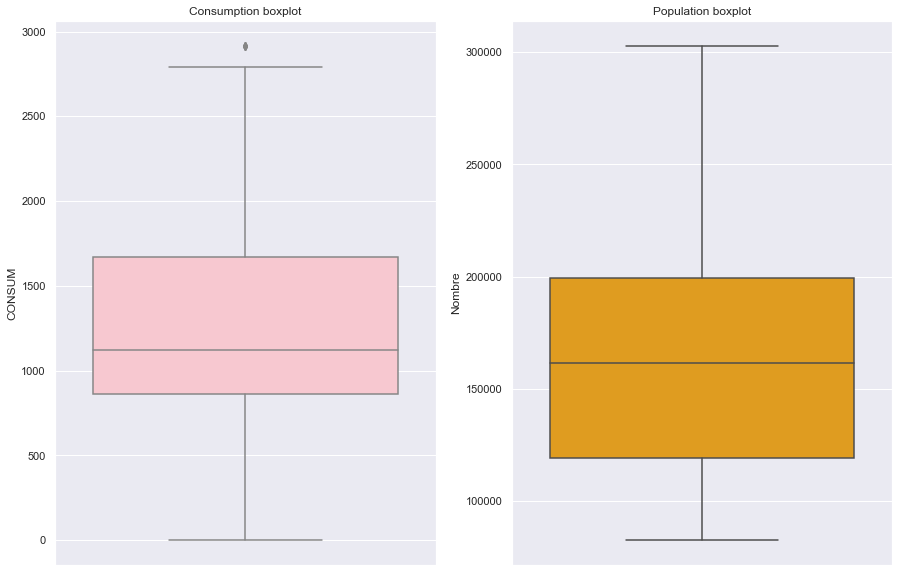

In [129]:
# Box plot
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,10))
sns.boxplot(y=data_district_population['CONSUM'], ax=axes[0], color = 'pink').set(title="Consumption boxplot")
sns.boxplot(y=data_district_population['Nombre'], ax=axes[1], color = 'orange').set(title="Population boxplot")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

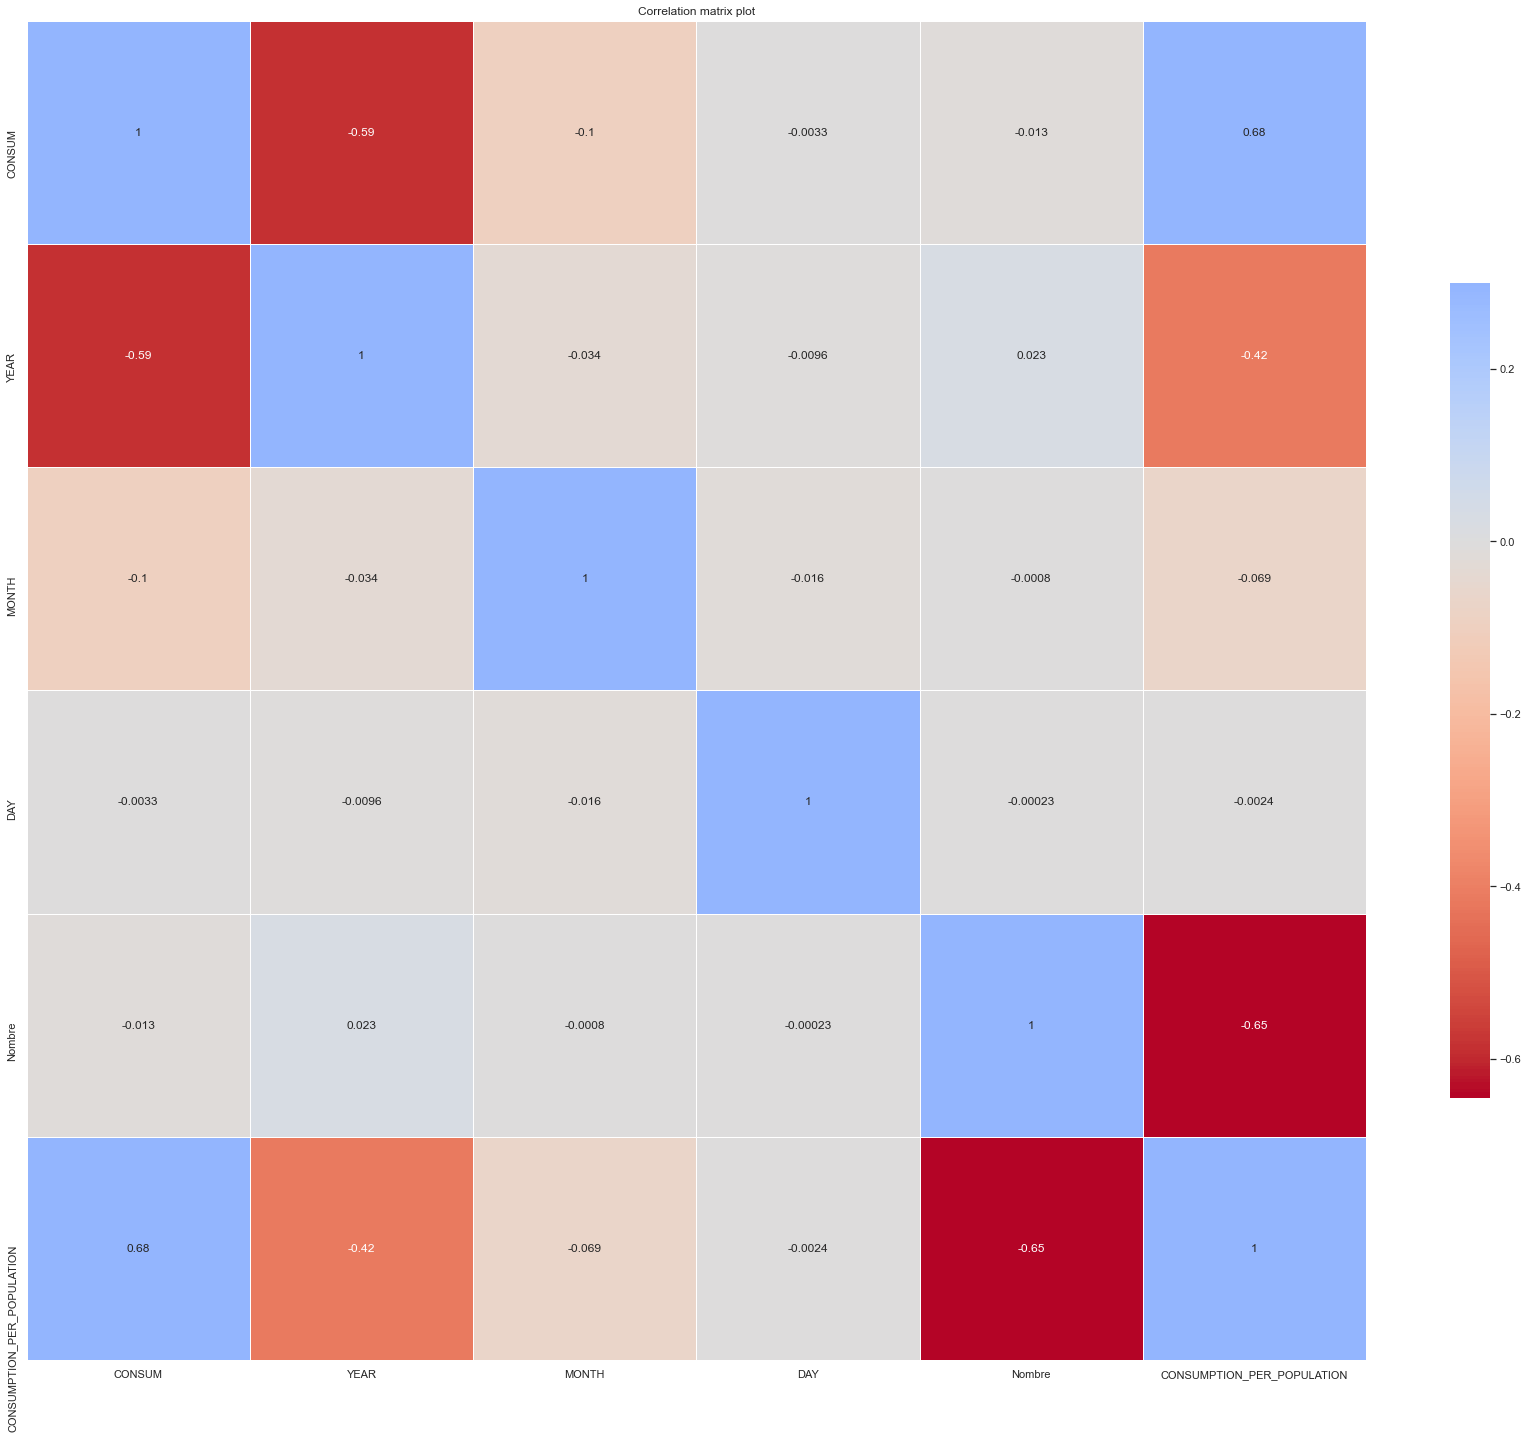

In [130]:
#Compute the correlation matrix
corr = data_district_population.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

### HOW COVID AFFECT TO WATER CONSUMPTION AND POPULATION BY DISTRICT

[Text(0.5, 1.0, 'Population boxplot during covid')]

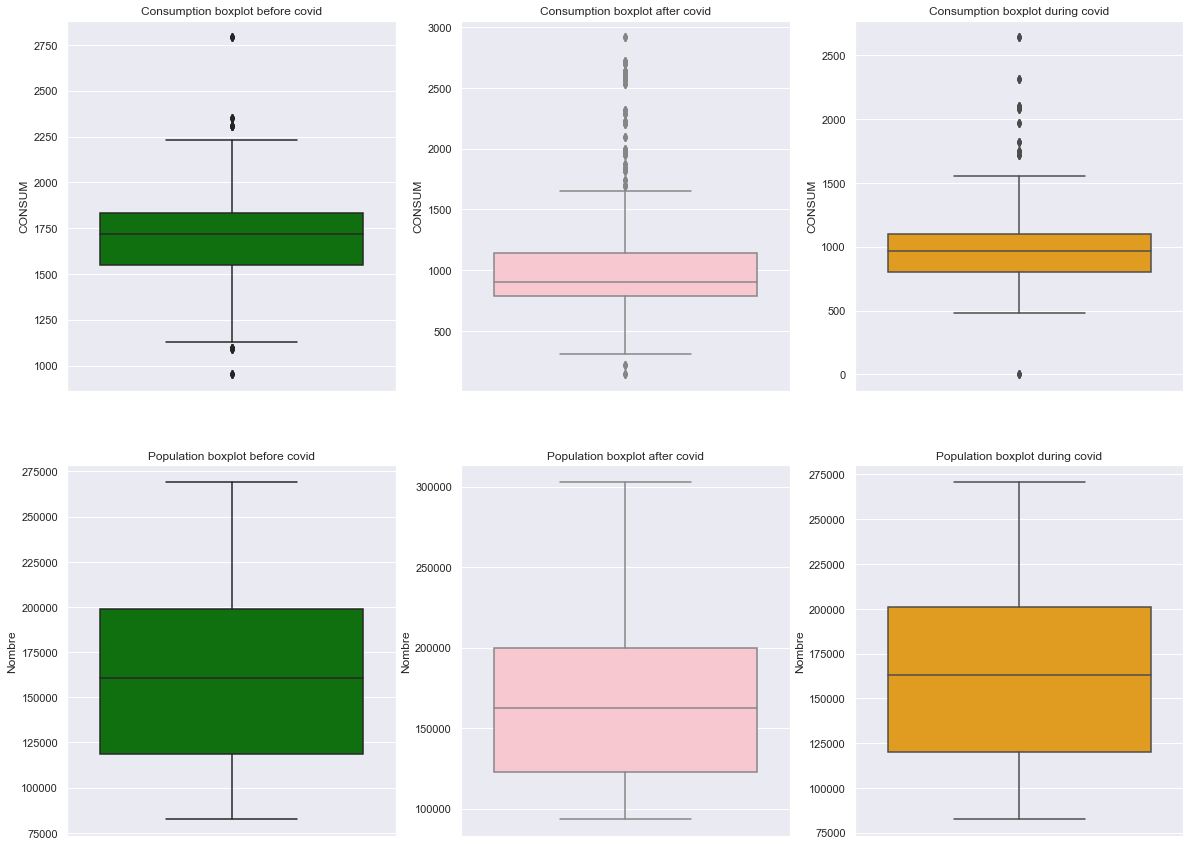

In [131]:
data_before = data_district_population[data_district_population['YEAR'] == 2019]
data_after =data_district_population[data_district_population['YEAR'] == 2021]
data_during =data_district_population[data_district_population['YEAR'] == 2020]

# Boxplots
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(20,15))
sns.boxplot(y=data_before['CONSUM'], ax=axes[0][0], color = 'green').set(title="Consumption boxplot before covid")
sns.boxplot(y=data_after['CONSUM'], ax=axes[0][1], color = 'pink').set(title="Consumption boxplot after covid")
sns.boxplot(y=data_during['CONSUM'], ax=axes[0][2], color = 'orange').set(title="Consumption boxplot during covid")

sns.boxplot(y=data_before['Nombre'], ax=axes[1][0], color = 'green').set(title="Population boxplot before covid")
sns.boxplot(y=data_after['Nombre'], ax=axes[1][1], color = 'pink').set(title="Population boxplot after covid")
sns.boxplot(y=data_during['Nombre'], ax=axes[1][2], color = 'orange').set(title="Population boxplot during covid")

Text(0.5, 1.0, 'Population before, after and during covid')

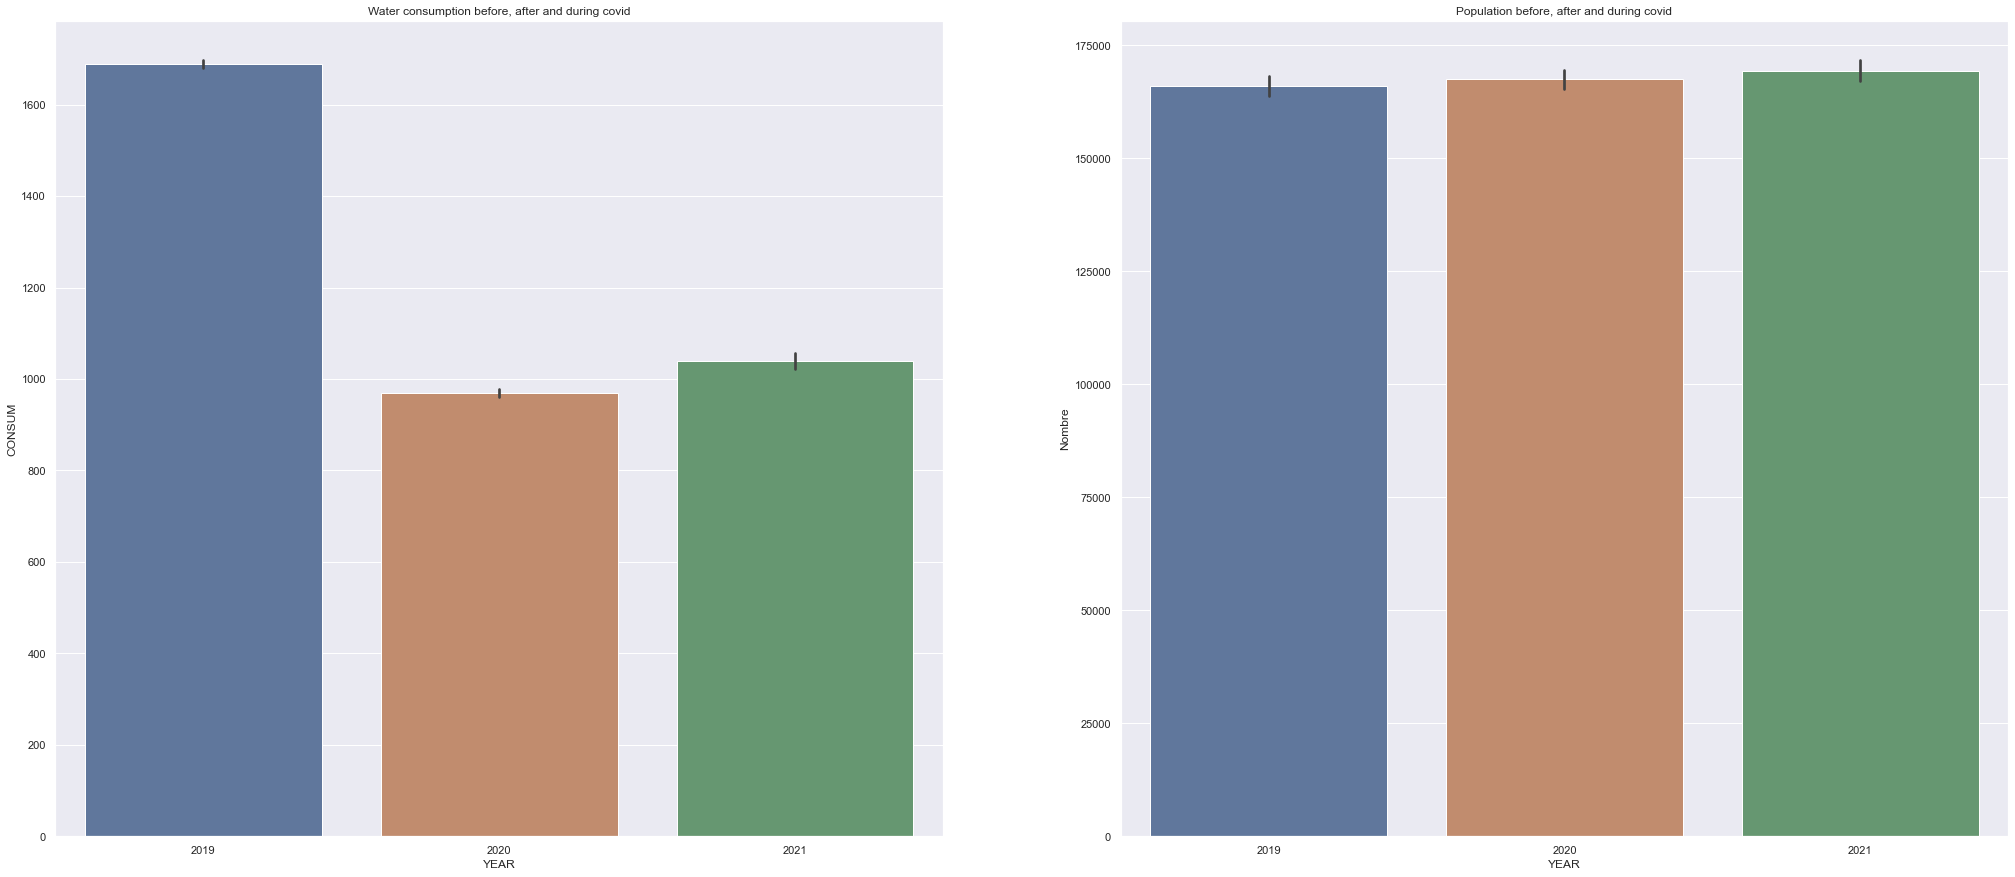

In [132]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(35,15))
sns.barplot(data= data_district_population, x= "YEAR", y= "CONSUM", ax=axes[0], saturation=0.6).set_title('Water consumption before, after and during covid')
sns.barplot(data= data_district_population, x= "YEAR", y= "Nombre", ax=axes[1], saturation=0.6).set_title('Population before, after and during covid')

Text(0.5, 1.0, 'Population before, after and during covid by district')

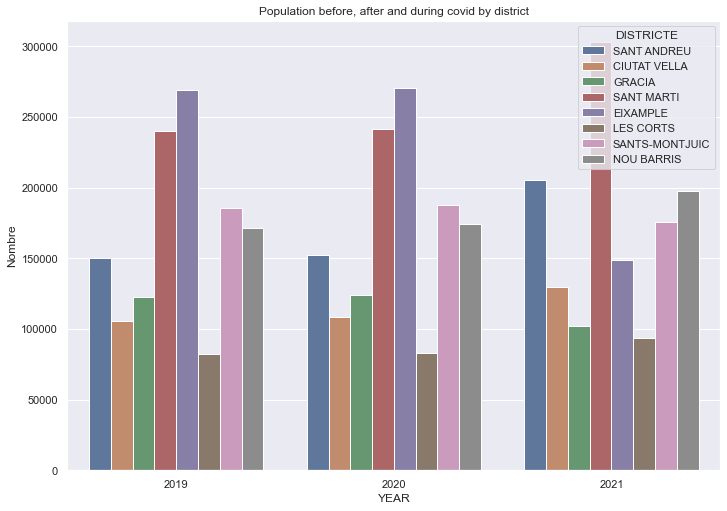

In [134]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data= data_district_population, x= "YEAR", y= "Nombre", hue = "DISTRICTE", saturation=0.6).set_title('Population before, after and during covid by district')

Second we will be focus on the data about rent and water consumption by district zone

In [135]:
data_rent

DIA    DISTRICTE  CONSUM  YEAR  MONTH  DAY  Any_x  \
0     2019-01-01  SANT ANDREU    1890  2019      1    1   2019   
1     2019-01-02  SANT ANDREU    1835  2019      1    2   2019   
2     2019-01-03  SANT ANDREU    1812  2019      1    3   2019   
3     2019-01-04  SANT ANDREU    1813  2019      1    4   2019   
4     2019-01-05  SANT ANDREU    1704  2019      1    5   2019   
...          ...          ...     ...   ...    ...  ...    ...   
5463  2020-12-26   SANT MARTI     701  2020     12   26   2020   
5464  2020-12-27   SANT MARTI     673  2020     12   27   2020   
5465  2020-12-28   SANT MARTI     732  2020     12   28   2020   
5466  2020-12-30   SANT MARTI     719  2020     12   30   2020   
5467  2020-12-31   SANT MARTI     832  2020     12   31   2020   

     Nom_Districte_x  Import_Euros Nom_Districte_y  Any_y  Nombre  \
0        SANT ANDREU      36717.19     SANT ANDREU   2019  150264   
1        SANT ANDREU      36717.19     SANT ANDREU   2019  150264   
2        SANT ANDREU      36717.19     SANT ANDREU   2019  150264   
3        SANT ANDREU      36717.19     SANT ANDREU   2019  150264   
4        SANT ANDREU      36717.19     SANT ANDREU   2019  150264   
...              ...           ...             ...    ...     ...   
5463      SANT MARTI      37713.01      SANT MARTI   2020  241691   
5464      SANT MARTI      37713.01      SANT MARTI   2020  241691   
5465      SANT MARTI      37713.01      SANT MARTI   2020  241691   
5466      SANT MARTI      37713.01      SANT MARTI   2020  241691   
5467      SANT MARTI      37713.01      SANT MARTI   2020  241691   

      RENT_PER_POPULATION  
0                0.244351  
1                0.244351  
2                0.244351  
3                0.244351  
4                0.244351  
...                   ...  
5463             0.156038  
5464             0.156038  
5465             0.156038  
5466             0.156038  
5467             0.156038  

[5404 rows x 13 columns]

### RENT AND CONSUMPTION FEATURES

In [136]:
# mean
print('Mean consumption: ', mean(data_rent['CONSUM']))
# variance
print('Variance consumption: ', variance(data_rent['CONSUM']))
# median
print('Median consumption: ', median(data_rent['CONSUM']))
# quartiles
print('Quantiles consumption: ', quantiles(data_rent['CONSUM']))

Mean consumption:  1357.5160991857883
Variance consumption:  195197.11190067942
Median consumption:  1288.0
Quantiles consumption:  [980.0, 1288.0, 1736.0]


In [220]:
# mean
print('Mean rent: ', mean(data_rent['Import_Euros']))
# variance
print('Variance rent: ', variance(data_rent['Import_Euros']))
# median
print('Median rent: ', median(data_rent['Import_Euros']))
# quartiles
print('Quantiles rent: ', quantiles(data_rent['Import_Euros']))

Mean rent:  38161.901391561805
Variance rent:  61340169.962770596
Median rent:  36761.86
Quantiles rent:  [30575.32, 36761.86, 41807.57]


In [138]:
# correlation
print('Correlation between consumption and rent ', data_rent['CONSUM'].corr(data_rent['Import_Euros']))

Correlation between consumption and rent  0.06262643112375028


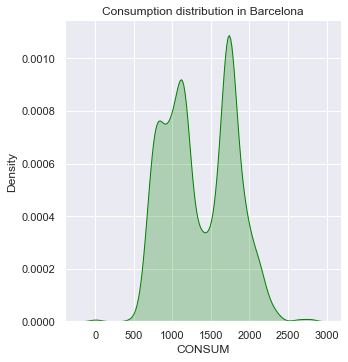

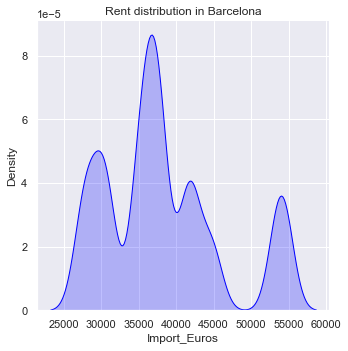

In [139]:
# Plot consumption and rent distribution
sns.displot(data_rent['CONSUM'],kind="kde", fill=True, color= 'green').set(title='Consumption distribution in Barcelona')
sns.displot(data_rent['Import_Euros'],kind="kde", fill=True, color= 'blue').set(title='Rent distribution in Barcelona')

[Text(0.5, 1.0, 'Rent boxplot')]

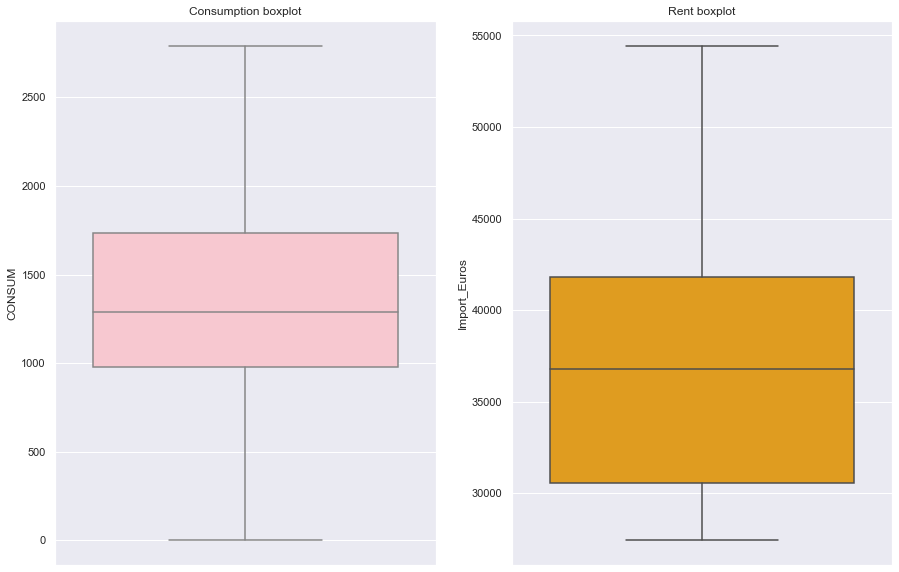

In [140]:
# Box plot
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,10))
sns.boxplot(y=data_rent['CONSUM'], ax=axes[0], color = 'pink').set(title="Consumption boxplot")
sns.boxplot(y=data_rent['Import_Euros'], ax=axes[1], color = 'orange').set(title="Rent boxplot")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

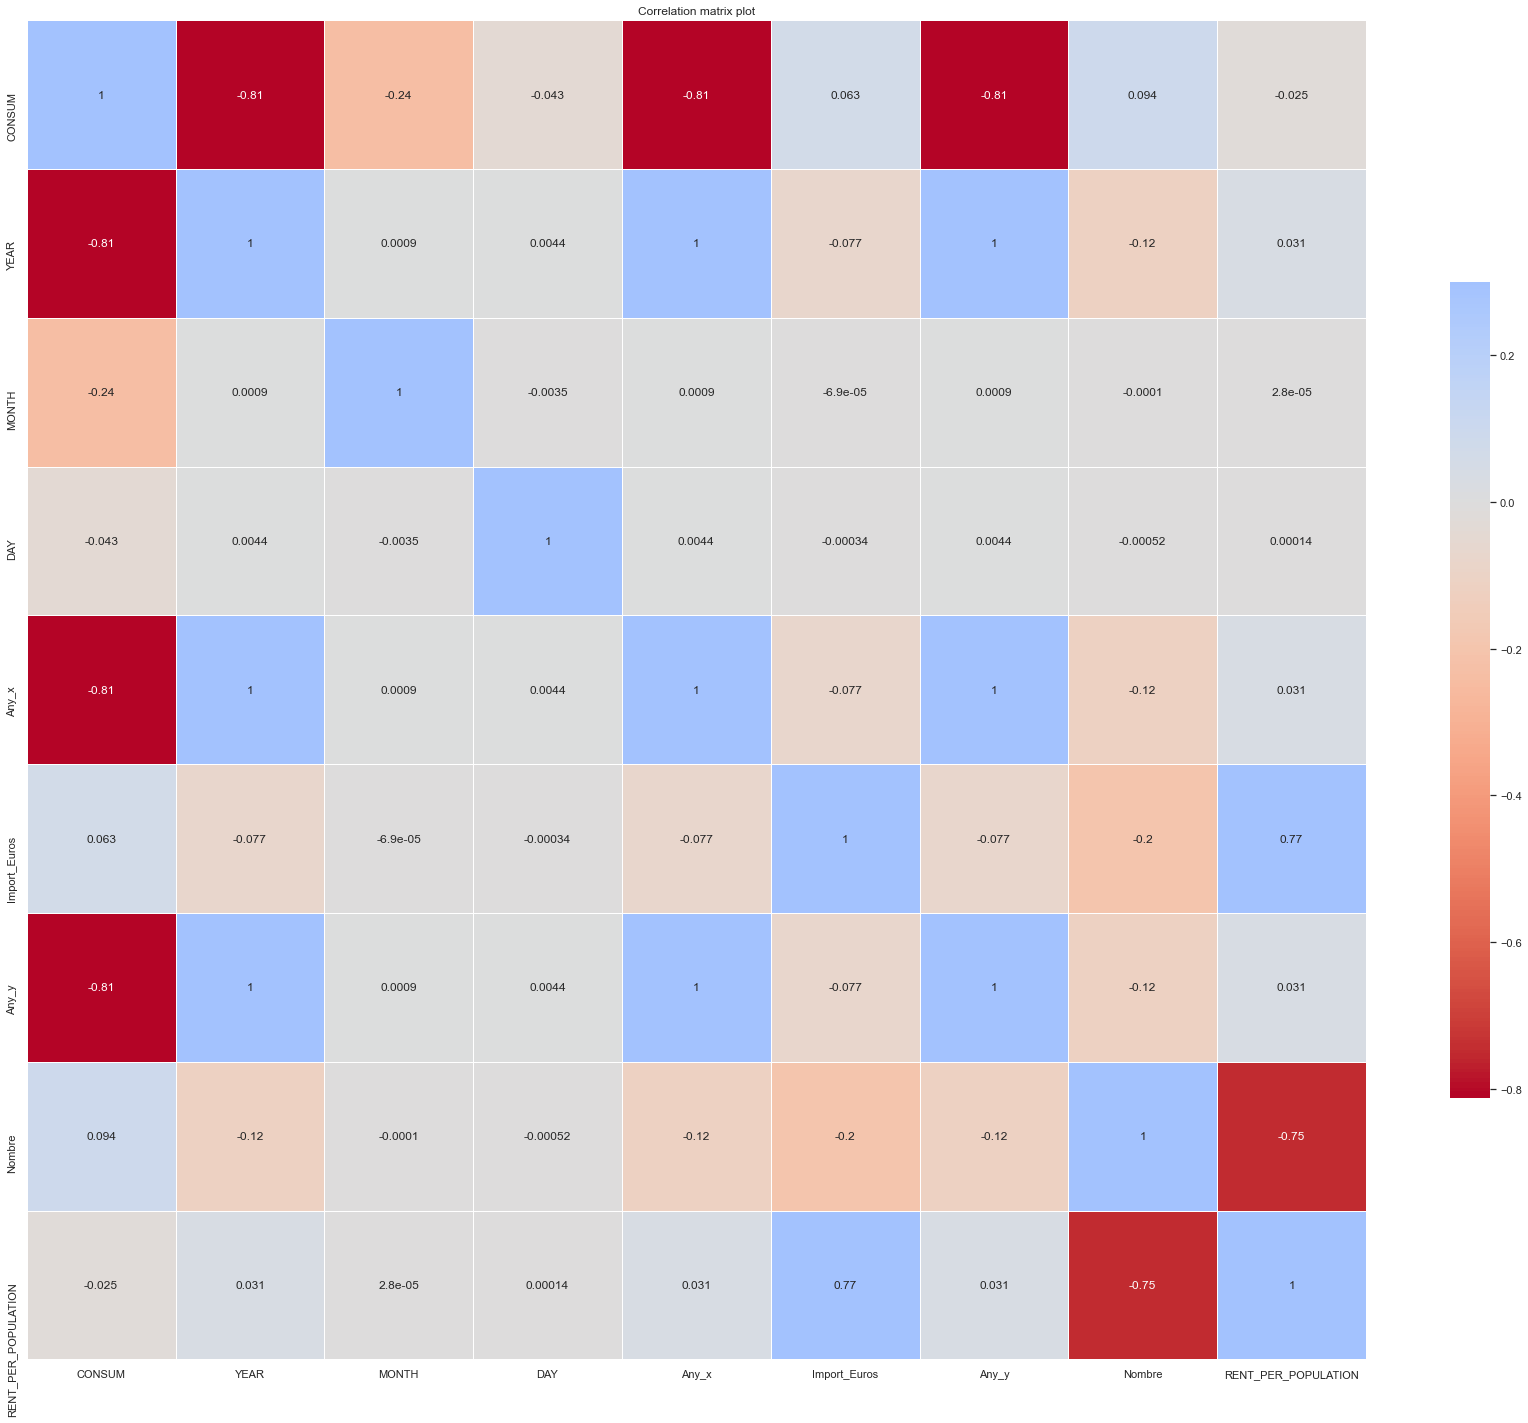

In [141]:
#Compute the correlation matrix
corr = data_rent.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

### EVOLUTION OF RENT AND CONSUMPTION DURING 2019 AND 2020

[Text(0.5, 1.0, 'Rent boxplot during covid')]

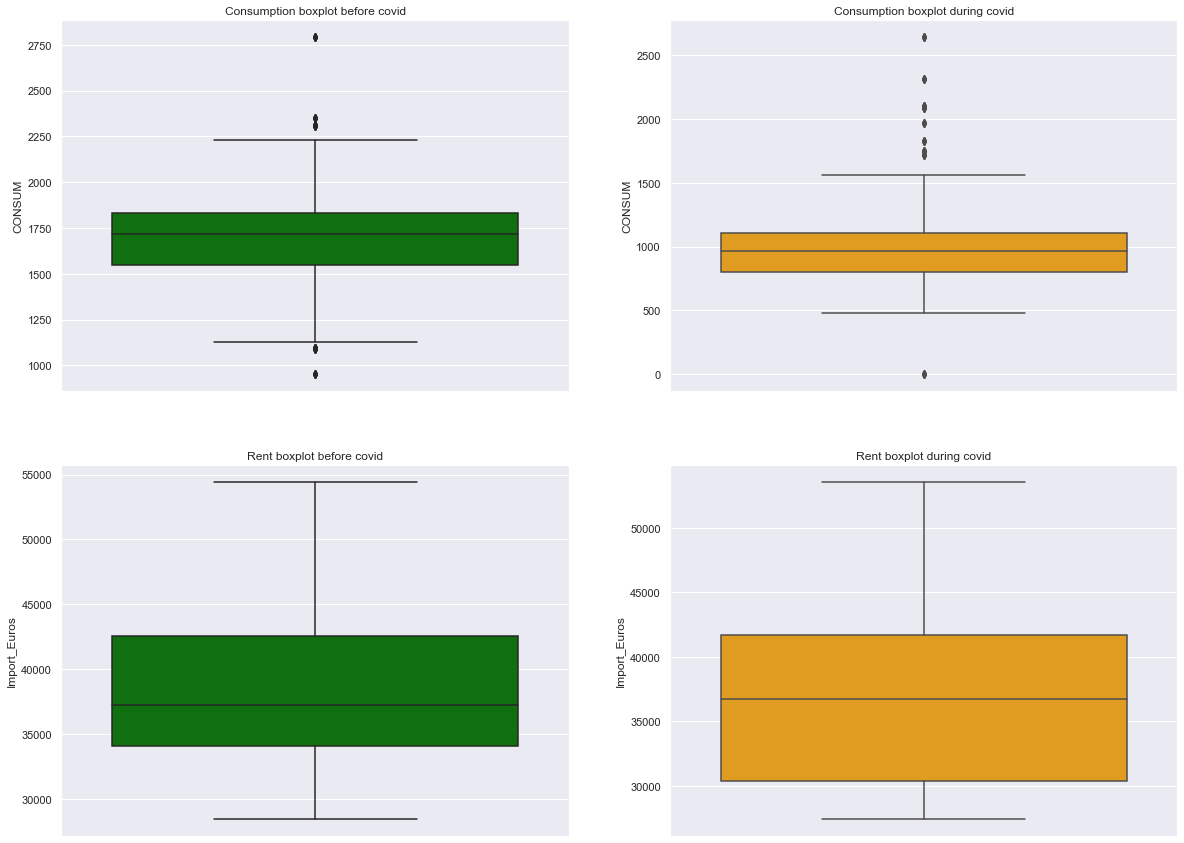

In [142]:
data_before = data_rent[data_rent['YEAR'] == 2019]
data_during =data_rent[data_rent['YEAR'] == 2020]

# Boxplots
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,15))
sns.boxplot(y=data_before['CONSUM'], ax=axes[0][0], color = 'green').set(title="Consumption boxplot before covid")
sns.boxplot(y=data_during['CONSUM'], ax=axes[0][1], color = 'orange').set(title="Consumption boxplot during covid")

sns.boxplot(y=data_before['Import_Euros'], ax=axes[1][0], color = 'green').set(title="Rent boxplot before covid")
sns.boxplot(y=data_during['Import_Euros'], ax=axes[1][1], color = 'orange').set(title="Rent boxplot during covid")

Text(0.5, 1.0, 'Population before and during covid')

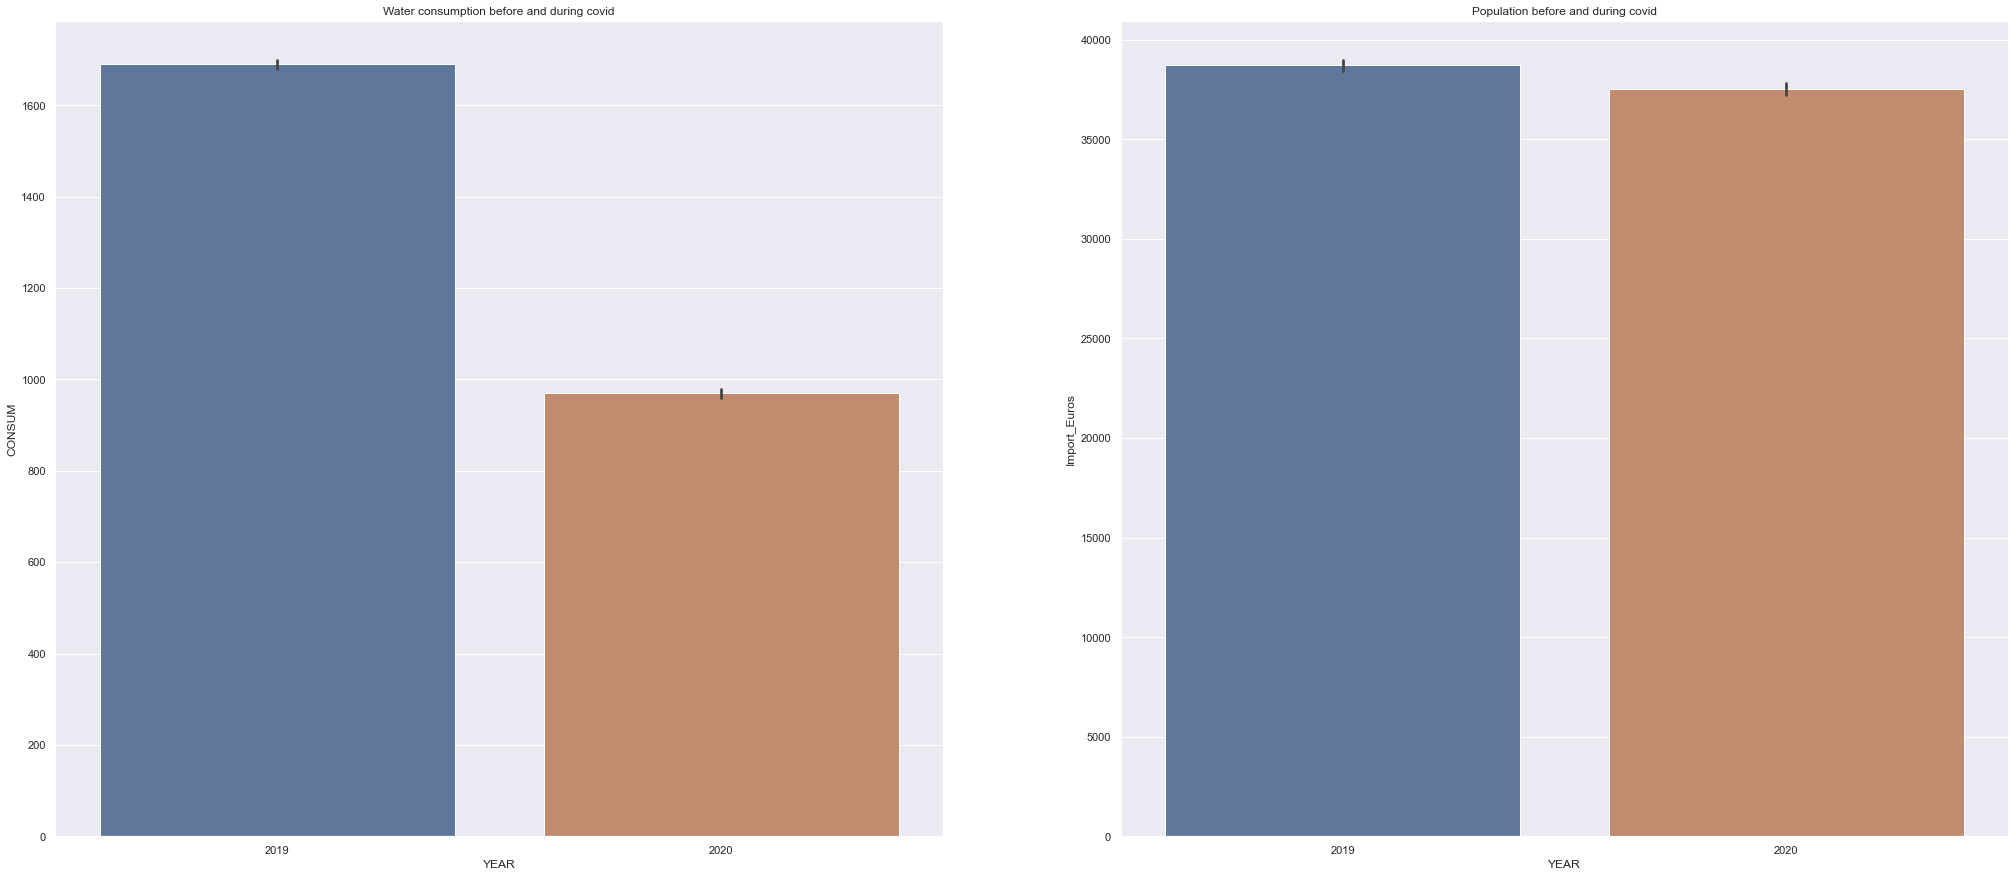

In [143]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(35,15))
sns.barplot(data= data_rent, x= "YEAR", y= "CONSUM", ax=axes[0], saturation=0.6).set_title('Water consumption before and during covid')
sns.barplot(data= data_rent, x= "YEAR", y= "Import_Euros", ax=axes[1], saturation=0.6).set_title('Population before and during covid')

Text(0.5, 1.0, 'Rent before and during covid by district')

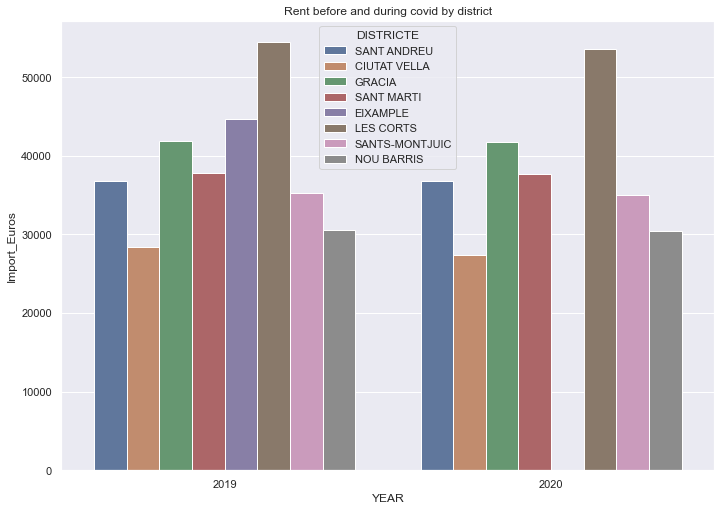

In [145]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data= data_rent, x= "YEAR", y= "Import_Euros", hue = "DISTRICTE", saturation=0.6).set_title('Rent before and during covid by district')

Finally we will be focus on the data about gini index and water consumption by district zone

In [146]:
data_gini

DIA    DISTRICTE  CONSUM  YEAR  MONTH  DAY   Any Nom_Districte  \
0     2019-01-01  SANT ANDREU    1890  2019      1    1  2019   SANT ANDREU   
1     2019-01-02  SANT ANDREU    1835  2019      1    2  2019   SANT ANDREU   
2     2019-01-03  SANT ANDREU    1812  2019      1    3  2019   SANT ANDREU   
3     2019-01-04  SANT ANDREU    1813  2019      1    4  2019   SANT ANDREU   
4     2019-01-05  SANT ANDREU    1704  2019      1    5  2019   SANT ANDREU   
...          ...          ...     ...   ...    ...  ...   ...           ...   
5463  2020-12-26   SANT MARTI     701  2020     12   26  2020    SANT MARTI   
5464  2020-12-27   SANT MARTI     673  2020     12   27  2020    SANT MARTI   
5465  2020-12-28   SANT MARTI     732  2020     12   28  2020    SANT MARTI   
5466  2020-12-30   SANT MARTI     719  2020     12   30  2020    SANT MARTI   
5467  2020-12-31   SANT MARTI     832  2020     12   31  2020    SANT MARTI   

      Index_Gini  
0          28.86  
1          28.86  
2          28.86  
3          28.86  
4          28.86  
...          ...  
5463       30.35  
5464       30.35  
5465       30.35  
5466       30.35  
5467       30.35  

[5404 rows x 9 columns]

### GINI INDEX AND CONSUMPTION FEATURES

In [147]:
# mean
print('Mean consumption: ', mean(data_gini['CONSUM']))
# variance
print('Variance consumption: ', variance(data_gini['CONSUM']))
# median
print('Median consumption: ', median(data_gini['CONSUM']))
# quartiles
print('Quantiles consumption: ', quantiles(data_gini['CONSUM']))

Mean consumption:  1357.5160991857883
Variance consumption:  195197.11190067942
Median consumption:  1288.0
Quantiles consumption:  [980.0, 1288.0, 1736.0]


In [221]:
# mean
print('Mean gini index: ', mean(data_gini['Index_Gini']))
# variance
print('Variance gini index: ', variance(data_gini['Index_Gini']))
# median
print('Median gini index: ', median(data_gini['Index_Gini']))
# quartiles
print('Quantiles gini index: ', quantiles(data_gini['Index_Gini']))

Mean gini index:  32.095455218356776
Variance gini index:  6.20039866373549
Median gini index:  31.95
Quantiles gini index:  [29.36, 31.95, 33.96]


In [149]:
# correlation
print('Correlation between consumption and gini index ', data_gini['CONSUM'].corr(data_gini['Index_Gini']))

Correlation between consumption and gini index  0.02319235340383071


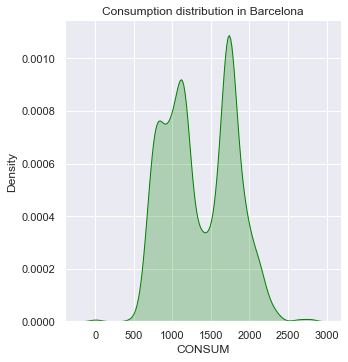

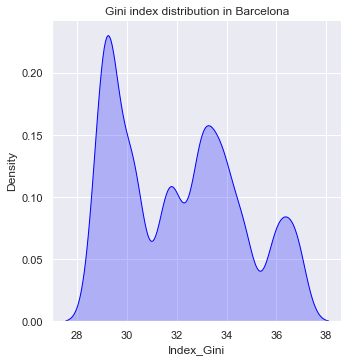

In [150]:
# Plot consumption and gini distribution
sns.displot(data_gini['CONSUM'],kind="kde", fill=True, color= 'green').set(title='Consumption distribution in Barcelona')
sns.displot(data_gini['Index_Gini'],kind="kde", fill=True, color= 'blue').set(title='Gini index distribution in Barcelona')

[Text(0.5, 1.0, 'Gini index boxplot')]

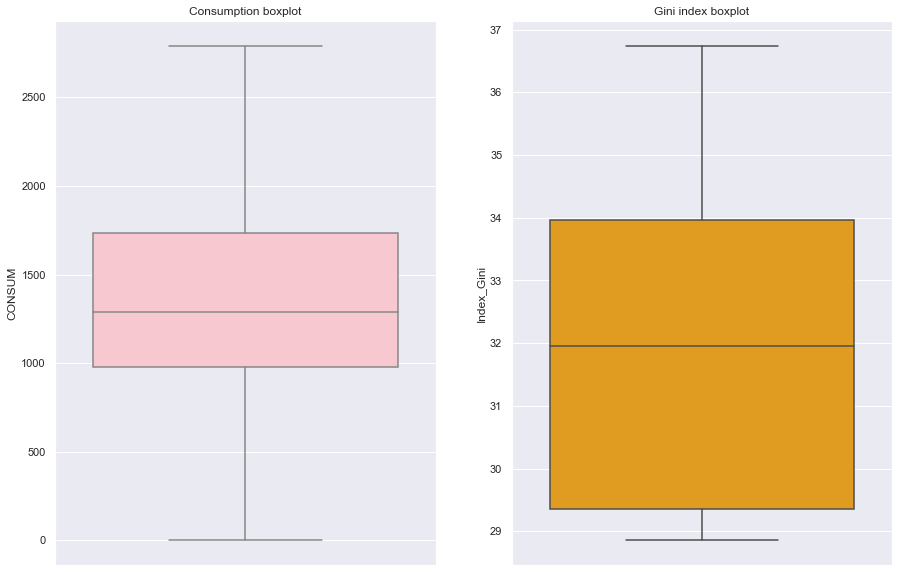

In [151]:
# Box plot
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,10))
sns.boxplot(y=data_gini['CONSUM'], ax=axes[0], color = 'pink').set(title="Consumption boxplot")
sns.boxplot(y=data_gini['Index_Gini'], ax=axes[1], color = 'orange').set(title="Gini index boxplot")

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


Text(0.5, 1.0, 'Correlation matrix plot')

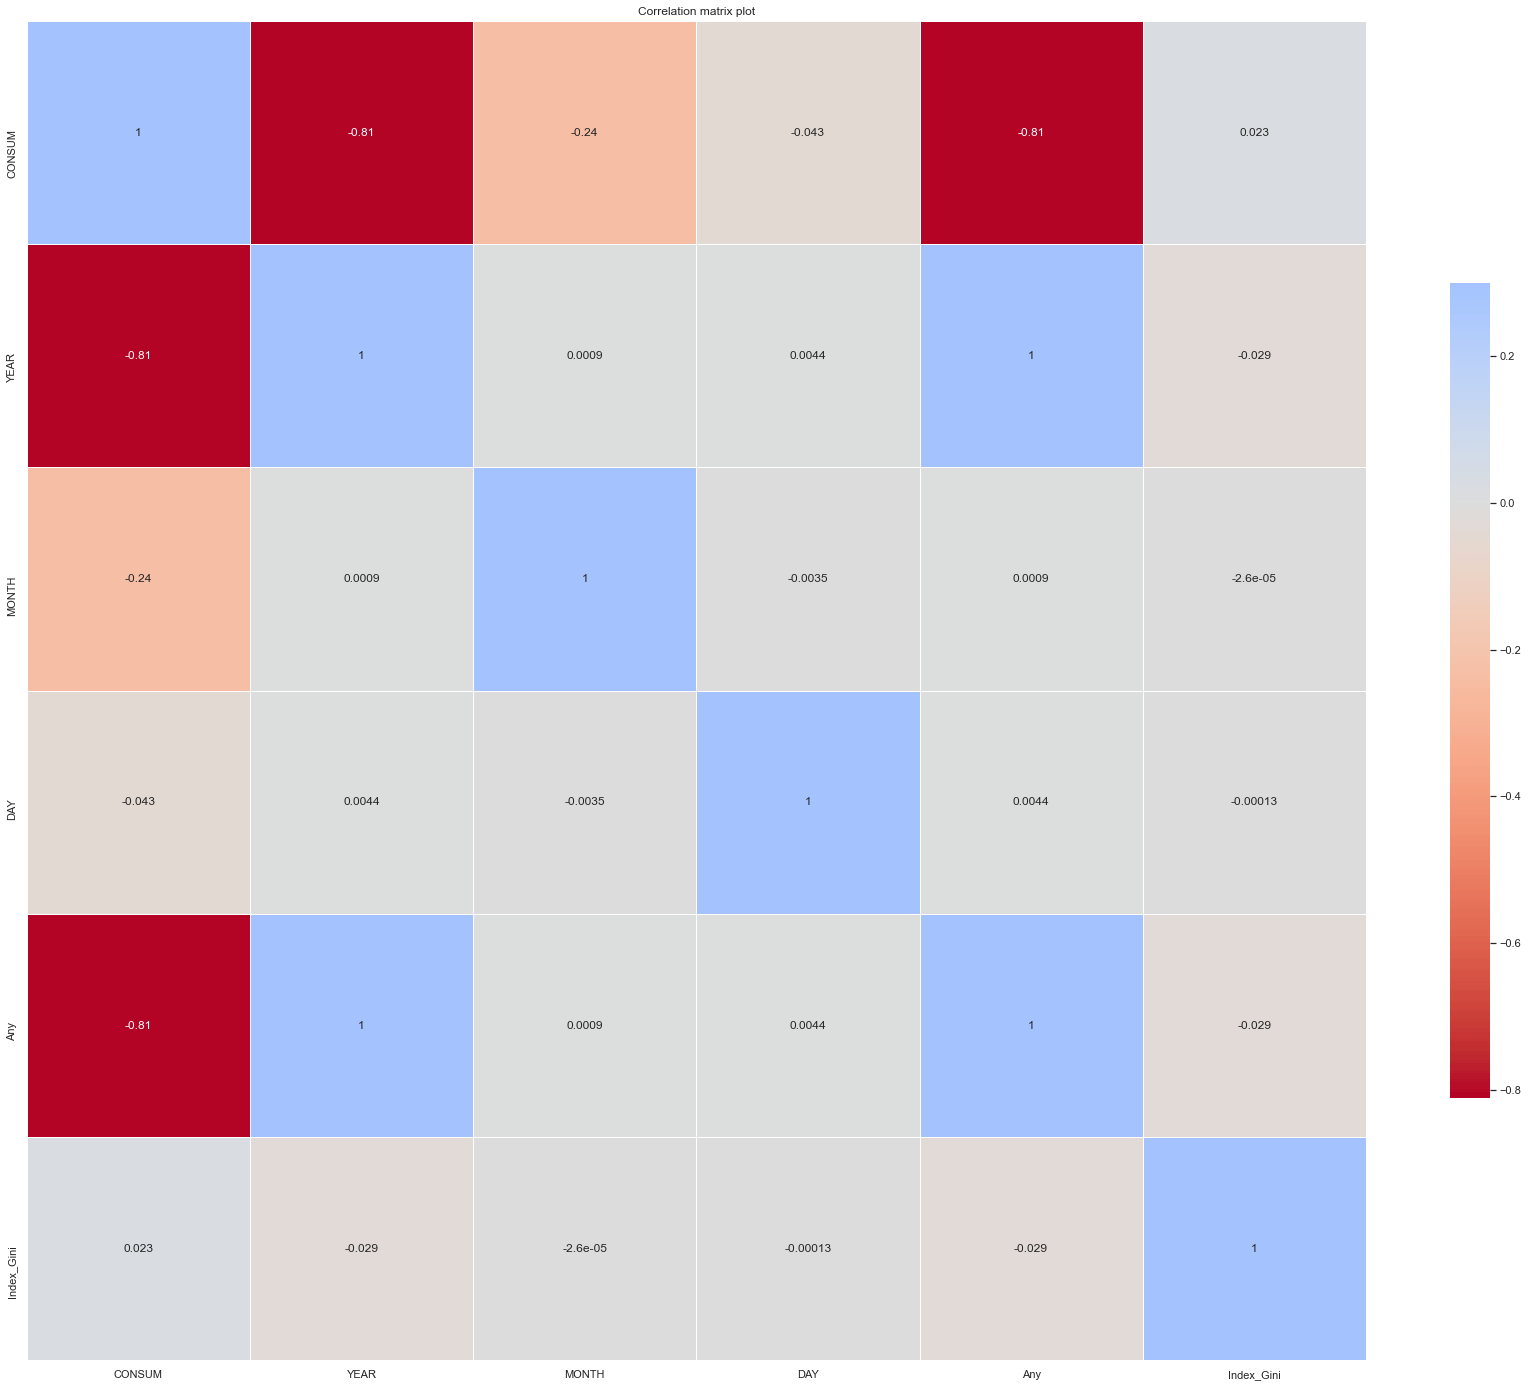

In [152]:
#Compute the correlation matrix
corr = data_gini.corr()

#Plot
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap='coolwarm_r', vmax=.3, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix plot")

### EVOLUTION OF GINI INDEX AND CONSUMPTION DURING 2019 AND 2020

[Text(0.5, 1.0, 'Gini boxplot during covid')]

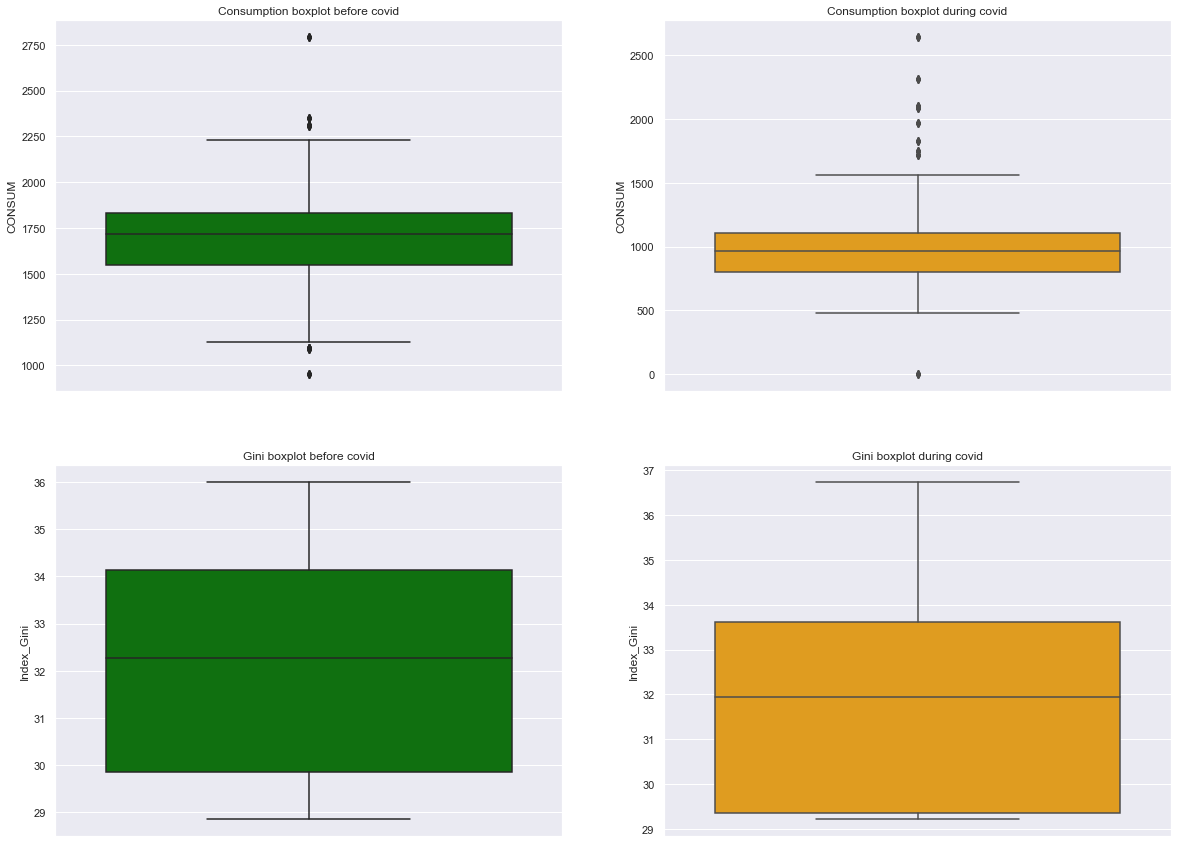

In [153]:
data_before = data_gini[data_gini['YEAR'] == 2019]
data_during = data_gini[data_gini['YEAR'] == 2020]

# Boxplots
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,15))
sns.boxplot(y=data_before['CONSUM'], ax=axes[0][0], color = 'green').set(title="Consumption boxplot before covid")
sns.boxplot(y=data_during['CONSUM'], ax=axes[0][1], color = 'orange').set(title="Consumption boxplot during covid")

sns.boxplot(y=data_before['Index_Gini'], ax=axes[1][0], color = 'green').set(title="Gini boxplot before covid")
sns.boxplot(y=data_during['Index_Gini'], ax=axes[1][1], color = 'orange').set(title="Gini boxplot during covid")

Text(0.5, 1.0, 'Gini before and during covid')

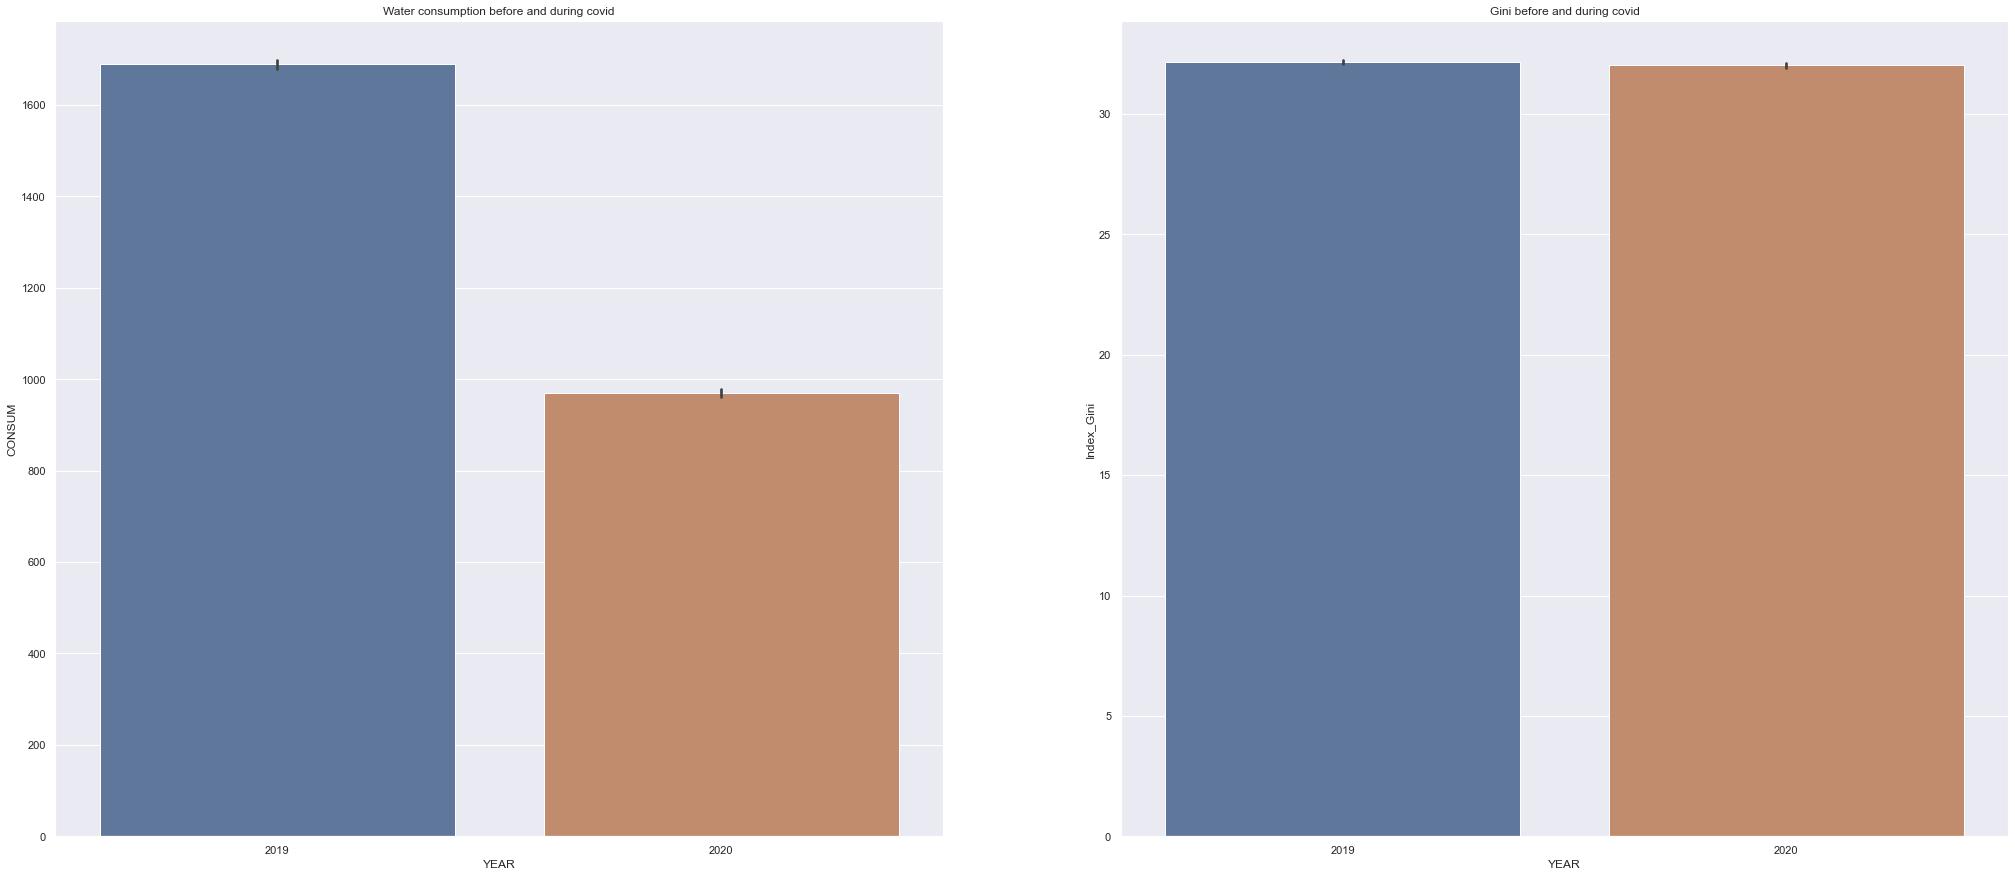

In [154]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(35,15))
sns.barplot(data= data_gini, x= "YEAR", y= "CONSUM", ax=axes[0], saturation=0.6).set_title('Water consumption before and during covid')
sns.barplot(data= data_gini, x= "YEAR", y= "Index_Gini", ax=axes[1], saturation=0.6).set_title('Gini before and during covid')

Text(0.5, 1.0, 'Gini index before and during covid by district')

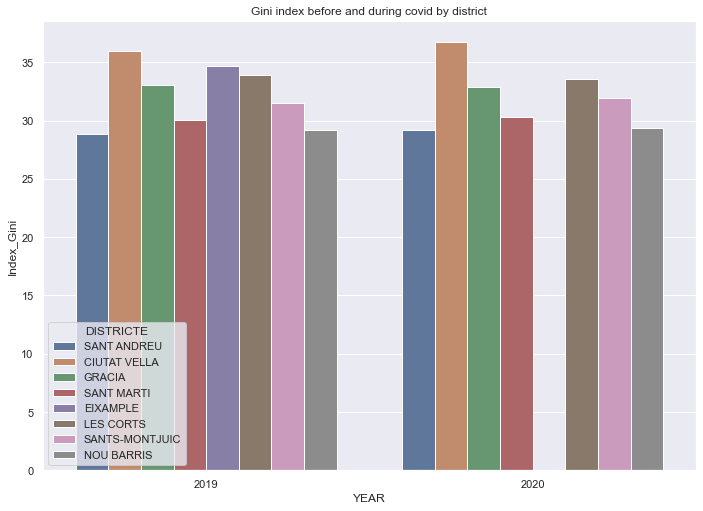

In [156]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data= data_gini, x= "YEAR", y= "Index_Gini", hue = "DISTRICTE", saturation=0.6).set_title('Gini index before and during covid by district')